# [PyBroMo](http://opensmfs.github.io/PyBroMo/) - 2. Generate smFRET data, including mixtures - C = 31 pM & D = 90 micron^2/s

<small><i>
This notebook is part of <a href="http://opensmfs.github.io/PyBroMo" target="_blank">PyBroMo</a> a 
python-based single-molecule Brownian motion diffusion simulator 
that simulates confocal smFRET
experiments.
</i></small>

## *Overview*

*In this notebook we show how to generated smFRET data files from the diffusion trajectories*.

## Loading the software

Import all the relevant libraries:

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import tables
import matplotlib.pyplot as plt
import seaborn as sns
import pybromo as pbm
print('Numpy version:', np.__version__)
print('PyTables version:', tables.__version__)
print('PyBroMo version:', pbm.__version__)

Numpy version: 1.15.0
PyTables version: 3.4.4
PyBroMo version: 0.8+10.g5d5f1d3.dirty


# Create smFRET data-files

## Create a file for a single FRET efficiency

In this section we show how to save a single smFRET data file. In the next section we will perform the same steps in a loop to generate a sequence of smFRET data files.

Here we load a diffusion simulation opening a file to save
timstamps in *write* mode. Use `'a'` (i.e. *append*) to keep 
previously simulated timestamps for the given diffusion.

In [2]:
code = '4be121'
S = pbm.ParticlesSimulation.from_datafile(code, mode='w')

In [3]:
# Number of populations with distinct diffusion coefficient
S.particles.num_populations

2

In [4]:
# Number of particles in each population
S.particles.particles_counts

[15, 1]

In [5]:
# Diffusion coefficient paired with the number particles in each population
S.particles.diffusion_coeff_counts

[(9e-11, 15), (4.5e-11, 1)]

### Note on particles population

Population defined in the diffusion simulations are not necessarily equal
to the populations used for timestamps simulation.

For example, you may decide to assign the same diffusion coefficient 
to all particles which requires only one population during the diffusion
simulation. When simulating timestamps, however, you can split your
particles assigning different "brightness" or FRET, creating many populations
from a single diffusion population.

You may also, simulate timestamps for fewer particles than present 
in the diffusion trajectory file.

To avoid errors, I suggest to follow one of these rule of thumbs:

1. Use the same particles per population both during diffusion and during timestamps simulations

2. Use only one population during diffusion and split populations during
   the timestamps simulation.
   
Other scenarios are possible, but you should carefully read the code 
to make sure pybromo is doing exactly what you intend to do.


## Simulate timestamps of smFRET

### Example1: single FRET population

Define the simulation parameters with the following syntax:

In [6]:
params = dict(
    em_rates = (200e3,),    # Peak emission rates (cps) for each population (D+A)
    E_values = (0.75,),     # FRET efficiency for each population
    num_particles = (15,),   # Number of particles in each population
    bg_rate_d = 1500,       # Poisson background rate (cps) Donor channel
    bg_rate_a = 800,        # Poisson background rate (cps) Acceptor channel
    )

Create the object that will run the simulation and print a summary:

In [7]:
mix_sim = pbm.TimestampSimulation(S, **params)
mix_sim.summarize()

NOTE: You requested a timestamp simulation for only 15 out of the 16 available particles.

        Timestamps simulation: Mixture
        ------------------------------

        Trajectories file:
            pybromo_4be121_P15_D9e-11_P1_D4.5e-11_30pM_step0.2us_t_max60.0s_ID0-0.hdf5
            time slice: 60 s
        
        Population1:
            # particles:        15 (first particle 0)
            D                   9e-11 m^2/s
            Peak emission rate: 200,000 cps
            FRET efficiency:      75.0%
        
        Background:
            Donor:                1,500 cps
            Acceptor:               800 cps
        


Run the simualtion:

In [8]:
rs = np.random.RandomState(1234)
mix_sim.run(rs=rs, 
            overwrite=True,      # overwite existing timstamp arrays
            skip_existing=True,  # skip simulation of existing timestamps arrays to save time
            save_pos=True,       # save particle position at emission time
           )

 - Mixture Simulation: Donor timestamps -    Fri Jun 21 01:16:39 2019
 1.0s 2.0s 3.0s 4.0s 5.0s 6.0s 7.0s 8.0s 9.0s 10.0s 11.0s 12.0s 13.0s 14.0s 15.0s 16.0s 17.0s 18.0s 19.0s 20.0s 21.0s 22.0s 23.0s 24.0s 25.0s 26.0s 27.0s 28.0s 29.0s 30.0s 31.0s 32.0s 33.0s 34.0s 35.0s 36.0s 37.0s 38.0s 39.0s 40.0s 41.0s 42.0s 43.0s 44.0s 45.0s 46.0s 47.0s 48.0s 49.0s 50.0s 51.0s 52.0s 53.0s 54.0s 55.0s 56.0s 57.0s 58.0s 59.0s 60.0s
 - Mixture Simulation: Acceptor timestamps - Fri Jun 21 01:20:56 2019
 1.0s 2.0s 3.0s 4.0s 5.0s 6.0s 7.0s 8.0s 9.0s 10.0s 11.0s 12.0s 13.0s 14.0s 15.0s 16.0s 17.0s 18.0s 19.0s 20.0s 21.0s 22.0s 23.0s 24.0s 25.0s 26.0s 27.0s 28.0s 29.0s 30.0s 31.0s 32.0s 33.0s 34.0s 35.0s 36.0s 37.0s 38.0s 39.0s 40.0s 41.0s 42.0s 43.0s 44.0s 45.0s 46.0s 47.0s 48.0s 49.0s 50.0s 51.0s 52.0s 53.0s 54.0s 55.0s 56.0s 57.0s 58.0s 59.0s 60.0s
 - Mixture Simulation: Completed. Fri Jun 21 01:25:03 2019


Save simulation to a smFRET [Photon-HDF5](http://photon-hdf5.org) file:

In [9]:
mix_sim.save_photon_hdf5(identity=dict(author='Eitan Lerner', 
                                       author_affiliation='The Hebrew University'))

 - Merging D and A timestamps
Saving particle positions in /photon_data/user/positions
Saving: smFRET_4be121_P_15_s0_D_9.0e-11_E_75_EmTot_200k_BgD1500_BgA800_t_max_60s.hdf5
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 


# Burst analysis

The generated Photon-HDF5 files can be analyzed by any smFRET burst
analysis program. Here we show an example using the opensource
[FRETBursts](https://github.com/OpenSMFS/FRETBursts/) program:

In [10]:
import fretbursts as fb

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [11]:
filepath = list(Path('./').glob(f'smFRET_{code}*'))
filepath

[WindowsPath('smFRET_4be121_P_15_s0_D_9.0e-11_E_75_EmTot_200k_BgD1500_BgA800_t_max_60s.hdf5')]

In [12]:
d = fb.loader.photon_hdf5(str(filepath[0]))

In [13]:
d

smFRET_4be121_P_15_s0_D_9.0e-11_E_75_EmTot_200k_BgD1500_BgA800_t_max_60s G1.000

### BG estimation

In [14]:
d.calc_bg(fun=fb.bg.exp_fit, tail_min_us='auto', F_bg=1.7)

 - Calculating BG rates ... [DONE]


In [15]:
d.bg_dd, d.bg_ad # The estimated BG rates

The Data.bg_dd attribute is deprecated. Please use Data.bg(Ph_sel(Dex='Dem', Aex=None)) instead.
The Data.bg_ad attribute is deprecated. Please use Data.bg(Ph_sel(Dex='Aem', Aex=None)) instead.


([array([1522.2063058])], [array([830.32734918])])

### Burst search

In [16]:
### Different m values ###
d.burst_search(m=5, F=6) # Burst search
d_m5F6 = d.select_bursts(fb.select_bursts.size, th1=5)
d_m5F6.fuse_bursts(ms=0) # Fusion of consecutive bursts that are separated by 0 time
d.burst_search(m=10, F=6)
d_m10F6 = d.select_bursts(fb.select_bursts.size, th1=10)
d_m10F6.fuse_bursts(ms=0)
d.burst_search(m=15, F=6)
d_m15F6 = d.select_bursts(fb.select_bursts.size, th1=15)
d_m15F6.fuse_bursts(ms=0)
d.burst_search(m=20, F=6)
d_m20F6 = d.select_bursts(fb.select_bursts.size, th1=20)
d_m20F6.fuse_bursts(ms=0)

### Different F values ###
d.burst_search(m=10, F=3)
d_m10F3 = d.select_bursts(fb.select_bursts.size, th1=10)
d_m10F3.fuse_bursts(ms=0)
d.burst_search(m=10, F=9)
d_m10F9 = d.select_bursts(fb.select_bursts.size, th1=10)
d_m10F9.fuse_bursts(ms=0)
d.burst_search(m=10, F=12)
d_m10F12 = d.select_bursts(fb.select_bursts.size, th1=10)
d_m10F12.fuse_bursts(ms=0)

d.burst_search(m=10, F=11)
d_m10F11 = d.select_bursts(fb.select_bursts.size, th1=10)
d_m10F11.fuse_bursts(ms=0)
d.burst_search(m=10, F=16)
d_m10F16 = d.select_bursts(fb.select_bursts.size, th1=10)
d_m10F16.fuse_bursts(ms=0)
d.burst_search(m=10, F=21)
d_m10F21 = d.select_bursts(fb.select_bursts.size, th1=10)
d_m10F21.fuse_bursts(ms=0)

 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 124 bursts (8.2%, 4 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 79 bursts (10.0%, 4 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]
 - - - - - CHAN

smFRET_4be121_P_15_s0_D_9.0e-11_E_75_EmTot_200k_BgD1500_BgA800_t_max_60s BS_all L10 m10 MR48 G1.000 BGexp-60s Fuse0.0ms bg Lk0.000

In [17]:
### Different burst size threshold values ###
ds_m10F6_sz20 = d_m10F6.select_bursts(fb.select_bursts.size, th1=20)
ds_m10F6_sz20.fuse_bursts(ms=0)
ds_m10F6_sz40 = d_m10F6.select_bursts(fb.select_bursts.size, th1=40)
ds_m10F6_sz40.fuse_bursts(ms=0)
ds_m10F6_sz80 = d_m10F6.select_bursts(fb.select_bursts.size, th1=80)
ds_m10F6_sz80.fuse_bursts(ms=0)

 - - - - - CHANNEL  1 - - - - 
 --> END Fused 37 bursts (7.7%, 3 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 13 bursts (5.5%, 2 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 2 bursts (2.4%, 2 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]


smFRET_4be121_P_15_s0_D_9.0e-11_E_75_EmTot_200k_BgD1500_BgA800_t_max_60s BS_all L10 m10 MR13 G1.000 BGexp-60s Fuse0.0ms bg Lk0.000

In [18]:
### Different burst width threshold values ###
ds_m10F6_w0_5 = d_m10F6.select_bursts(fb.select_bursts.width, th1=0.5)
ds_m10F6_w0_5.fuse_bursts(ms=0)
ds_m10F6_w1_0 = d_m10F6.select_bursts(fb.select_bursts.width, th1=1)
ds_m10F6_w1_0.fuse_bursts(ms=0)

 - - - - - CHANNEL  1 - - - - 
 --> END Fused 78 bursts (10.1%, 4 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]
 - - - - - CHANNEL  1 - - - - 
 --> END Fused 48 bursts (9.6%, 3 iter)

 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A and FRET]


smFRET_4be121_P_15_s0_D_9.0e-11_E_75_EmTot_200k_BgD1500_BgA800_t_max_60s BS_all L10 m10 MR13 G1.000 BGexp-60s Fuse0.0ms bg Lk0.000

# Molecule positons at photon emisson detection moments

Read the positions array:

In [19]:
import tables

with tables.open_file(d.fname, 'r') as h5file:
    positions = h5file.root.photon_data.user.positions.read()

We also get the timestamps and particles arrays:

In [20]:
timestamps_m5F6 = d_m5F6.ph_times_m[0]
particles_m5F6 = d_m5F6.particles[0]

timestamps_m10F6 = d_m10F6.ph_times_m[0]
particles_m10F6 = d_m10F6.particles[0]

timestamps_m15F6 = d_m15F6.ph_times_m[0]
particles_m15F6 = d_m15F6.particles[0]

timestamps_m20F6 = d_m20F6.ph_times_m[0]
particles_m20F6 = d_m20F6.particles[0]


timestamps_m10F3 = d_m10F3.ph_times_m[0]
particles_m10F3 = d_m10F3.particles[0]

timestamps_m10F9 = d_m10F9.ph_times_m[0]
particles_m10F9 = d_m10F9.particles[0]

timestamps_m10F12 = d_m10F12.ph_times_m[0]
particles_m10F12 = d_m10F12.particles[0]


timestamps_m10F11 = d_m10F11.ph_times_m[0]
particles_m10F11 = d_m10F11.particles[0]

timestamps_m10F16 = d_m10F16.ph_times_m[0]
particles_m10F16 = d_m10F16.particles[0]

timestamps_m10F21 = d_m10F21.ph_times_m[0]
particles_m10F21 = d_m10F21.particles[0]


timestamps_m10F6_sz20 = ds_m10F6_sz20.ph_times_m[0]
particles_m10F6_sz20 = ds_m10F6_sz20.particles[0]

timestamps_m10F6_sz40 = ds_m10F6_sz40.ph_times_m[0]
particles_m10F6_sz40 = ds_m10F6_sz40.particles[0]

timestamps_m10F6_sz80 = ds_m10F6_sz80.ph_times_m[0]
particles_m10F6_sz80 = ds_m10F6_sz80.particles[0]


timestamps_m10F6_w0_5 = ds_m10F6_w0_5.ph_times_m[0]
particles_m10F6_w0_5 = ds_m10F6_w0_5.particles[0]

timestamps_m10F6_w1_0 = ds_m10F6_w1_0.ph_times_m[0]
particles_m10F6_w1_0 = ds_m10F6_w1_0.particles[0]

These are all the particles ID in the file, the last ID is not a real particle
but is associated with timestamps from background:


In [21]:
np.unique(particles_m5F6), np.unique(particles_m10F6), np.unique(particles_m15F6), np.unique(particles_m20F6)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8))

In [22]:
np.unique(particles_m10F3), np.unique(particles_m10F6), np.unique(particles_m10F9), np.unique(particles_m10F12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8))

Positions must have the same number of rows as number of timestamps or particles.
Let's test it:

In [23]:
assert positions.shape[0] == timestamps_m5F6.size == particles_m5F6.size
assert positions.shape[0] == timestamps_m10F6.size == particles_m10F6.size
assert positions.shape[0] == timestamps_m15F6.size == particles_m15F6.size
assert positions.shape[0] == timestamps_m20F6.size == particles_m20F6.size

assert positions.shape[0] == timestamps_m10F3.size == particles_m10F3.size
assert positions.shape[0] == timestamps_m10F9.size == particles_m10F9.size
assert positions.shape[0] == timestamps_m10F12.size == particles_m10F12.size

assert positions.shape[0] == timestamps_m10F11.size == particles_m10F11.size
assert positions.shape[0] == timestamps_m10F16.size == particles_m10F16.size
assert positions.shape[0] == timestamps_m10F21.size == particles_m10F21.size

assert positions.shape[0] == timestamps_m10F6_sz20.size == particles_m10F6_sz20.size
assert positions.shape[0] == timestamps_m10F6_sz40.size == particles_m10F6_sz40.size
assert positions.shape[0] == timestamps_m10F6_sz80.size == particles_m10F6_sz80.size

assert positions.shape[0] == timestamps_m10F6_w0_5.size == particles_m10F6_w0_5.size
assert positions.shape[0] == timestamps_m10F6_w1_0.size == particles_m10F6_w1_0.size

Print first 5 positions:

In [24]:
positions[:5]

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)

> **NOTE**: positions are NaN when the timestamp is from background.

Check that we have NaNs if and only if the timestamp is from background:

In [25]:
bg_timestamp_m5F6 = particles_m5F6 == np.unique(particles_m5F6)[-1]
assert np.all(bg_timestamp_m5F6 == np.isnan(positions[:, 0]))

bg_timestamp_m10F6 = particles_m10F6 == np.unique(particles_m10F6)[-1]
assert np.all(bg_timestamp_m10F6 == np.isnan(positions[:, 0]))

bg_timestamp_m15F6 = particles_m15F6 == np.unique(particles_m15F6)[-1]
assert np.all(bg_timestamp_m15F6 == np.isnan(positions[:, 0]))

bg_timestamp_m20F6 = particles_m20F6 == np.unique(particles_m20F6)[-1]
assert np.all(bg_timestamp_m20F6 == np.isnan(positions[:, 0]))


bg_timestamp_m10F3 = particles_m10F3 == np.unique(particles_m10F3)[-1]
assert np.all(bg_timestamp_m10F3 == np.isnan(positions[:, 0]))

bg_timestamp_m10F9 = particles_m10F9 == np.unique(particles_m10F9)[-1]
assert np.all(bg_timestamp_m10F9 == np.isnan(positions[:, 0]))

bg_timestamp_m10F12 = particles_m10F12 == np.unique(particles_m10F12)[-1]
assert np.all(bg_timestamp_m10F12 == np.isnan(positions[:, 0]))


bg_timestamp_m10F11 = particles_m10F11 == np.unique(particles_m10F11)[-1]
assert np.all(bg_timestamp_m10F11 == np.isnan(positions[:, 0]))

bg_timestamp_m10F16 = particles_m10F16 == np.unique(particles_m10F16)[-1]
assert np.all(bg_timestamp_m10F16 == np.isnan(positions[:, 0]))

bg_timestamp_m10F21 = particles_m10F21 == np.unique(particles_m10F21)[-1]
assert np.all(bg_timestamp_m10F21 == np.isnan(positions[:, 0]))


bg_timestamp_m10F6_sz20 = particles_m10F6_sz20 == np.unique(particles_m10F6_sz20)[-1]
assert np.all(bg_timestamp_m10F6_sz20 == np.isnan(positions[:, 0]))

bg_timestamp_m10F6_sz40 = particles_m10F6_sz40 == np.unique(particles_m10F6_sz40)[-1]
assert np.all(bg_timestamp_m10F6_sz40 == np.isnan(positions[:, 0]))

bg_timestamp_m10F6_sz80 = particles_m10F6_sz80 == np.unique(particles_m10F6_sz80)[-1]
assert np.all(bg_timestamp_m10F6_sz80 == np.isnan(positions[:, 0]))



bg_timestamp_m10F6_w0_5 = particles_m10F6_w0_5 == np.unique(particles_m10F6_w0_5)[-1]
assert np.all(bg_timestamp_m10F6_w0_5 == np.isnan(positions[:, 0]))

bg_timestamp_m10F6_w1_0 = particles_m10F6_w1_0 == np.unique(particles_m10F6_w1_0)[-1]
assert np.all(bg_timestamp_m10F6_w1_0 == np.isnan(positions[:, 0]))

Now we take the burst data including index of burst start and stop 
(`i_start` and `i_stop` columns):

In [26]:
bursts_m5F6 = fb.bext.burst_data(d_m5F6, include_ph_index=True)
bursts_m10F6 = fb.bext.burst_data(d_m10F6, include_ph_index=True)
bursts_m15F6 = fb.bext.burst_data(d_m15F6, include_ph_index=True)
bursts_m20F6 = fb.bext.burst_data(d_m20F6, include_ph_index=True)

bursts_m10F3 = fb.bext.burst_data(d_m10F3, include_ph_index=True)
bursts_m10F9 = fb.bext.burst_data(d_m10F9, include_ph_index=True)
bursts_m10F12 = fb.bext.burst_data(d_m10F12, include_ph_index=True)

bursts_m10F11 = fb.bext.burst_data(d_m10F11, include_ph_index=True)
bursts_m10F16 = fb.bext.burst_data(d_m10F16, include_ph_index=True)
bursts_m10F21 = fb.bext.burst_data(d_m10F21, include_ph_index=True)

bursts_m10F6_sz20 = fb.bext.burst_data(ds_m10F6_sz20, include_ph_index=True)
bursts_m10F6_sz40 = fb.bext.burst_data(ds_m10F6_sz40, include_ph_index=True)
bursts_m10F6_sz80 = fb.bext.burst_data(ds_m10F6_sz80, include_ph_index=True)

bursts_m10F6_w0_5 = fb.bext.burst_data(ds_m10F6_w0_5, include_ph_index=True)
bursts_m10F6_w1_0 = fb.bext.burst_data(ds_m10F6_w1_0, include_ph_index=True)

Now, we add the x, y, z values of the molecule positions at each emitted photon

In [27]:
burstph_m5F6 = fb.bext.burst_photons(d_m5F6)
burstph_m5F6['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m5F6.particles[0], d_m5F6.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m5F6.mburst[0]))
burstph_m5F6['x_um'] = burstpos[:, 0] * 1e6
burstph_m5F6['y_um'] = burstpos[:, 1] * 1e6
burstph_m5F6['z_um'] = burstpos[:, 2] * 1e6
burstph_m5F6['r_um'] = np.linalg.norm(burstpos[:, :2], axis=1) * 1e6

burstph_m10F6 = fb.bext.burst_photons(d_m10F6)
burstph_m10F6['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m10F6.particles[0], d_m10F6.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m10F6.mburst[0]))
burstph_m10F6['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F6['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F6['z_um'] = burstpos[:, 2] * 1e6

burstph_m15F6 = fb.bext.burst_photons(d_m15F6)
burstph_m15F6['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m15F6.particles[0], d_m15F6.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m15F6.mburst[0]))
burstph_m15F6['x_um'] = burstpos[:, 0] * 1e6
burstph_m15F6['y_um'] = burstpos[:, 1] * 1e6
burstph_m15F6['z_um'] = burstpos[:, 2] * 1e6

burstph_m20F6 = fb.bext.burst_photons(d_m20F6)
burstph_m20F6['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m20F6.particles[0], d_m20F6.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m20F6.mburst[0]))
burstph_m20F6['x_um'] = burstpos[:, 0] * 1e6
burstph_m20F6['y_um'] = burstpos[:, 1] * 1e6
burstph_m20F6['z_um'] = burstpos[:, 2] * 1e6


burstph_m10F3 = fb.bext.burst_photons(d_m10F3)
burstph_m10F3['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m10F3.particles[0], d_m10F3.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m10F3.mburst[0]))
burstph_m10F3['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F3['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F3['z_um'] = burstpos[:, 2] * 1e6

burstph_m10F9 = fb.bext.burst_photons(d_m10F9)
burstph_m10F9['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m10F9.particles[0], d_m10F9.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m10F9.mburst[0]))
burstph_m10F9['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F9['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F9['z_um'] = burstpos[:, 2] * 1e6

burstph_m10F12 = fb.bext.burst_photons(d_m10F12)
burstph_m10F12['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m10F12.particles[0], d_m10F12.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m10F12.mburst[0]))
burstph_m10F12['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F12['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F12['z_um'] = burstpos[:, 2] * 1e6


burstph_m10F11 = fb.bext.burst_photons(d_m10F11)
burstph_m10F11['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m10F11.particles[0], d_m10F11.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m10F11.mburst[0]))
burstph_m10F11['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F11['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F11['z_um'] = burstpos[:, 2] * 1e6

burstph_m10F16 = fb.bext.burst_photons(d_m10F16)
burstph_m10F16['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m10F16.particles[0], d_m10F16.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m10F16.mburst[0]))
burstph_m10F16['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F16['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F16['z_um'] = burstpos[:, 2] * 1e6

burstph_m10F21 = fb.bext.burst_photons(d_m10F21)
burstph_m10F21['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(d_m10F21.particles[0], d_m10F21.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, d_m10F21.mburst[0]))
burstph_m10F21['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F21['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F21['z_um'] = burstpos[:, 2] * 1e6


burstph_m10F6_sz20 = fb.bext.burst_photons(ds_m10F6_sz20)
burstph_m10F6_sz20['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(ds_m10F6_sz20.particles[0], ds_m10F6_sz20.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, ds_m10F6_sz20.mburst[0]))
burstph_m10F6_sz20['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F6_sz20['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F6_sz20['z_um'] = burstpos[:, 2] * 1e6

burstph_m10F6_sz40 = fb.bext.burst_photons(ds_m10F6_sz40)
burstph_m10F6_sz40['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(ds_m10F6_sz40.particles[0], ds_m10F6_sz40.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, ds_m10F6_sz40.mburst[0]))
burstph_m10F6_sz40['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F6_sz40['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F6_sz40['z_um'] = burstpos[:, 2] * 1e6

burstph_m10F6_sz80 = fb.bext.burst_photons(ds_m10F6_sz80)
burstph_m10F6_sz80['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(ds_m10F6_sz80.particles[0], ds_m10F6_sz80.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, ds_m10F6_sz80.mburst[0]))
burstph_m10F6_sz80['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F6_sz80['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F6_sz80['z_um'] = burstpos[:, 2] * 1e6


burstph_m10F6_w0_5 = fb.bext.burst_photons(ds_m10F6_w0_5)
burstph_m10F6_w0_5['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(ds_m10F6_w0_5.particles[0], ds_m10F6_w0_5.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, ds_m10F6_w0_5.mburst[0]))
burstph_m10F6_w0_5['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F6_w0_5['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F6_w0_5['z_um'] = burstpos[:, 2] * 1e6

burstph_m10F6_w1_0 = fb.bext.burst_photons(ds_m10F6_w1_0)
burstph_m10F6_w1_0['particle'] = np.hstack(
    fb.burstlib.iter_bursts_ph(ds_m10F6_w1_0.particles[0], ds_m10F6_w1_0.mburst[0]))
burstpos = np.vstack(
    fb.burstlib.iter_bursts_ph(positions, ds_m10F6_w1_0.mburst[0]))
burstph_m10F6_w1_0['x_um'] = burstpos[:, 0] * 1e6
burstph_m10F6_w1_0['y_um'] = burstpos[:, 1] * 1e6
burstph_m10F6_w1_0['z_um'] = burstpos[:, 2] * 1e6

The particle in a burst is the one that produced most of the photons in a burst - it is possible that the photons of a burst will not arise solely from one molecule.
We declare such a burst to be an impure burst ('burst_NonSingleMolecule' array with 1, when the burst was impure) and assess the level of impurity as the ratio of the photons arising from other molecules and all photons ('burst_NonSingleMoleculeContaminationFraction' array that holds the level of impurity in a burst).

We can add the particle data by assigning to each burst (row) the particle with most photons:

In [28]:
def arrange_photon_types(par, counts, BGmol):
    corr_par=sorted(par)
    corr_counts = [x for _,x in sorted(zip(par,counts))]
    
    if np.size(corr_par) == 1:
        corr_counts3 = corr_counts
        corr_par3 = corr_par
    else:
    
        if corr_par[np.size(corr_par) - 1] == BGmol:
            corr_par2 = corr_par[0:np.size(corr_par) - 1]
            corr_counts2 = corr_counts[0:np.size(corr_counts) - 1]
        else:
            corr_par2 = corr_par
            corr_counts2 = corr_counts

        corr_counts3=sorted(corr_counts2, reverse=True)
        corr_par3 = [x for _,x in sorted(zip(corr_counts2,corr_par2),reverse=True)]
    
    return corr_par3, corr_counts3

In [29]:
BGmolecule = 15 # The index of the molecule that is used to fill in BG timestamps, rather then photons emitted from actual molecules

i_start = bursts_m5F6.i_start.values
i_stop = bursts_m5F6.i_stop.values + 1

burst_particle = [] # The index of the particle that produced most of the photons in a burst
burst_NonSingleMolecule = [] # 1 for impure bursts & 0 for pure single-molecule bursts
burst_NonSingleMoleculeContaminationFraction = [] # The level of burst impurity
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m5F6[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m5F6['particle'] = burst_particle
bursts_m5F6['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m5F6['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m10F6.i_start.values
i_stop = bursts_m10F6.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F6[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F6['particle'] = burst_particle
bursts_m10F6['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F6['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m15F6.i_start.values
i_stop = bursts_m15F6.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m15F6[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m15F6['particle'] = burst_particle
bursts_m15F6['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m15F6['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m20F6.i_start.values
i_stop = bursts_m20F6.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m20F6[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m20F6['particle'] = burst_particle
bursts_m20F6['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m20F6['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction


i_start = bursts_m10F3.i_start.values
i_stop = bursts_m10F3.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F3[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F3['particle'] = burst_particle
bursts_m10F3['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F3['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m10F11.i_start.values
i_stop = bursts_m10F11.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F11[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F11['particle'] = burst_particle
bursts_m10F11['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F11['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m10F16.i_start.values
i_stop = bursts_m10F16.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F16[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F16['particle'] = burst_particle
bursts_m10F16['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F16['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m10F21.i_start.values
i_stop = bursts_m10F21.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F21[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F21['particle'] = burst_particle
bursts_m10F21['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F21['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction



i_start = bursts_m10F6_sz20.i_start.values
i_stop = bursts_m10F6_sz20.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F6_sz20[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F6_sz20['particle'] = burst_particle
bursts_m10F6_sz20['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F6_sz20['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m10F6_sz40.i_start.values
i_stop = bursts_m10F6_sz40.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F6_sz40[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F6_sz40['particle'] = burst_particle
bursts_m10F6_sz40['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F6_sz40['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m10F6_sz80.i_start.values
i_stop = bursts_m10F6_sz80.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F6_sz80[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F6_sz80['particle'] = burst_particle
bursts_m10F6_sz80['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F6_sz80['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m10F6_w0_5.i_start.values
i_stop = bursts_m10F6_w0_5.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F6_w0_5[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F6_w0_5['particle'] = burst_particle
bursts_m10F6_w0_5['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F6_w0_5['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction

i_start = bursts_m10F6_w1_0.i_start.values
i_stop = bursts_m10F6_w1_0.i_stop.values + 1

burst_particle = []
burst_NonSingleMolecule = []
burst_NonSingleMoleculeContaminationFraction = []
for start, stop in zip(i_start, i_stop):
    par, counts = np.unique(particles_m10F6_w1_0[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1:
        temp_NonSingleMolecule = 0
        temp_NonSingleMoleculeContaminationFraction = 0
    else:
        temp_NonSingleMolecule = 1
        temp_NonSingleMoleculeContaminationFraction = 1 - counts[0]/np.sum(counts)
    burst_particle.append(par[0])
    burst_NonSingleMolecule.append(temp_NonSingleMolecule)
    burst_NonSingleMoleculeContaminationFraction.append(temp_NonSingleMoleculeContaminationFraction)
bursts_m10F6_w1_0['particle'] = burst_particle
bursts_m10F6_w1_0['NonSingleMolecule'] = burst_NonSingleMolecule
bursts_m10F6_w1_0['NonSingleMoleculeContaminationFraction'] = burst_NonSingleMoleculeContaminationFraction


In [30]:
# The columns of the 'bursts' list
bursts_m5F6

size_raw    t_start     t_stop  i_start  i_stop  width_ms         E  \
0            7   0.091658   0.091928      201     207    0.2692  0.907295   
1            6   0.092292   0.092531      208     213    0.2388  0.699075   
2          118   0.282601   0.284328      642     759    1.7272  0.715887   
3            6   0.288766   0.289157      774     779    0.3910  0.723470   
4           23   0.289396   0.290140      780     802    0.7440  0.723880   
...        ...        ...        ...      ...     ...       ...       ...   
1505        23  59.743610  59.744099   169445  169467    0.4882  0.622138   
1506        13  59.890856  59.891208   169806  169818    0.3514  0.797500   
1507        61  59.892819  59.893704   169821  169881    0.8852  0.836169   
1508        16  59.910351  59.910735   169920  169935    0.3836  0.839969   
1509        11  59.972087  59.972593   170078  170088    0.5056  0.466863   

             nd         na          nt  spot  particle  NonSingleMolecule  \
0      0.590222   5.776476    6.366698     0         1                  0   
1      1.636497   3.801718    5.438215     0         1                  0   
2     32.370845  81.565859  113.936704     0        12                  0   
3      1.404817   3.675342    5.080159     0        12                  0   
4      5.867479  15.382236   21.249715     0        12                  0   
...         ...        ...         ...   ...       ...                ...   
1505   8.256859  13.594634   21.851493     0         3                  0   
1506   2.465097   9.708223   12.173320     0         9                  0   
1507   9.652543  49.264994   58.917537     0         9                  0   
1508   2.416082  12.681486   15.097568     0        10                  0   
1509   5.230372   4.580186    9.810559     0        10                  0   

      NonSingleMoleculeContaminationFraction  
0                                        0.0  
1                                        0.0  
2                                        0.0  
3                                        0.0  
4                                        0.0  
...                                      ...  
1505                                     0.0  
1506                                     0.0  
1507                                     0.0  
1508                                     0.0  
1509                                     0.0  

[1510 rows x 14 columns]

### Assessment of the occurrence of impure bursts & mean level of impurity 

#### Occurrence of non-single-molecule bursts

In [31]:
# different m values
import scipy.stats as st

tmp = []
tmperr = []

temp_dataset = bursts_m5F6['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F6['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m15F6['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m20F6['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

tmp, tmperr

([0.031788079470198675,
  0.06691919191919192,
  0.08600337268128162,
  0.10874200426439233],
 [0.008858686040953329,
  0.01744053718469863,
  0.022631121853931402,
  0.028278094939278922])

In [32]:
# different F values

tmp = []
tmperr = []

temp_dataset = bursts_m10F3['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F6['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F11['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F16['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F21['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

tmp, tmperr

([0.07908847184986595,
  0.06691919191919192,
  0.04481132075471698,
  0.035629453681710214,
  0.029447852760736196],
 [0.01941071942867554,
  0.01744053718469863,
  0.013952944844728227,
  0.012545908433964414,
  0.011631035299989701])

In [33]:
# different burst size threshold values
tmp = []
tmperr = []

temp_dataset = bursts_m10F6['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F6_sz20['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F6_sz40['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F6_sz80['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

tmp, tmperr

([0.06691919191919192,
  0.09583333333333334,
  0.1134453781512605,
  0.17073170731707318],
 [0.01744053718469863,
  0.02642783688941841,
  0.040582939347616684,
  0.0831853267901999])

In [34]:
# different burst width threshold values
tmp = []
tmperr = []

temp_dataset = bursts_m10F6['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F6_w0_5['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

temp_dataset = bursts_m10F6_w1_0['NonSingleMolecule']
temp_av = np.mean(temp_dataset)
tmp.append(temp_av)
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
tmperr.append(temp_av - test[0])

tmp, tmperr

([0.06691919191919192, 0.0685640362225097, 0.09437751004016064],
 [0.01744053718469863, 0.017854411731552153, 0.02576538603685112])

#### Mean non-single-molecule contamination level

In [35]:
from scipy.stats import sem

In [36]:
# different m values
tmp = []
tmperr = []
tmp.append(np.average(bursts_m5F6['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m5F6['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F6['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m15F6['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m15F6['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m20F6['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m20F6['NonSingleMoleculeContaminationFraction']))
tmp, tmperr

([0.004511317194903026,
  0.009283568621499526,
  0.012903409183626263,
  0.01688238601800046],
 [0.0007876947900155632,
  0.0017380696199926701,
  0.002421374767167703,
  0.003117316308610482])

In [37]:
# different F values
tmp = []
tmperr = []
tmp.append(np.average(bursts_m10F3['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F3['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F6['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F11['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F11['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F16['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F16['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F21['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F21['NonSingleMoleculeContaminationFraction']))
tmp, tmperr

([0.013903645752057802,
  0.009283568621499526,
  0.006452874899902715,
  0.004502669752920259,
  0.004188386216436403],
 [0.002257690699153256,
  0.0017380696199926701,
  0.0013324187834136043,
  0.001040030852602791,
  0.0011090470842429936])

In [38]:
# different burst size threshold values
tmp = []
tmperr = []
tmp.append(np.average(bursts_m10F6['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F6_sz20['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6_sz20['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F6_sz40['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6_sz40['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F6_sz80['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6_sz80['NonSingleMoleculeContaminationFraction']))
tmp, tmperr

([0.009283568621499526,
  0.013225679814331984,
  0.016128495123486773,
  0.01734905468143742],
 [0.0017380696199926701,
  0.0026813930278958014,
  0.004411655932593921,
  0.006624289662945717])

In [39]:
# different burst width threshold values
tmp = []
tmperr = []
tmp.append(np.average(bursts_m10F6['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F6_w0_5['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6_w0_5['NonSingleMoleculeContaminationFraction']))
tmp.append(np.average(bursts_m10F6_w1_0['NonSingleMoleculeContaminationFraction']))
tmperr.append(sem(bursts_m10F6_w1_0['NonSingleMoleculeContaminationFraction']))
tmp, tmperr

([0.009283568621499526, 0.009511754654886967, 0.013901769503695052],
 [0.0017380696199926701, 0.0017800287265954738, 0.00271775687961115])

### Histograms of burst impurity levels

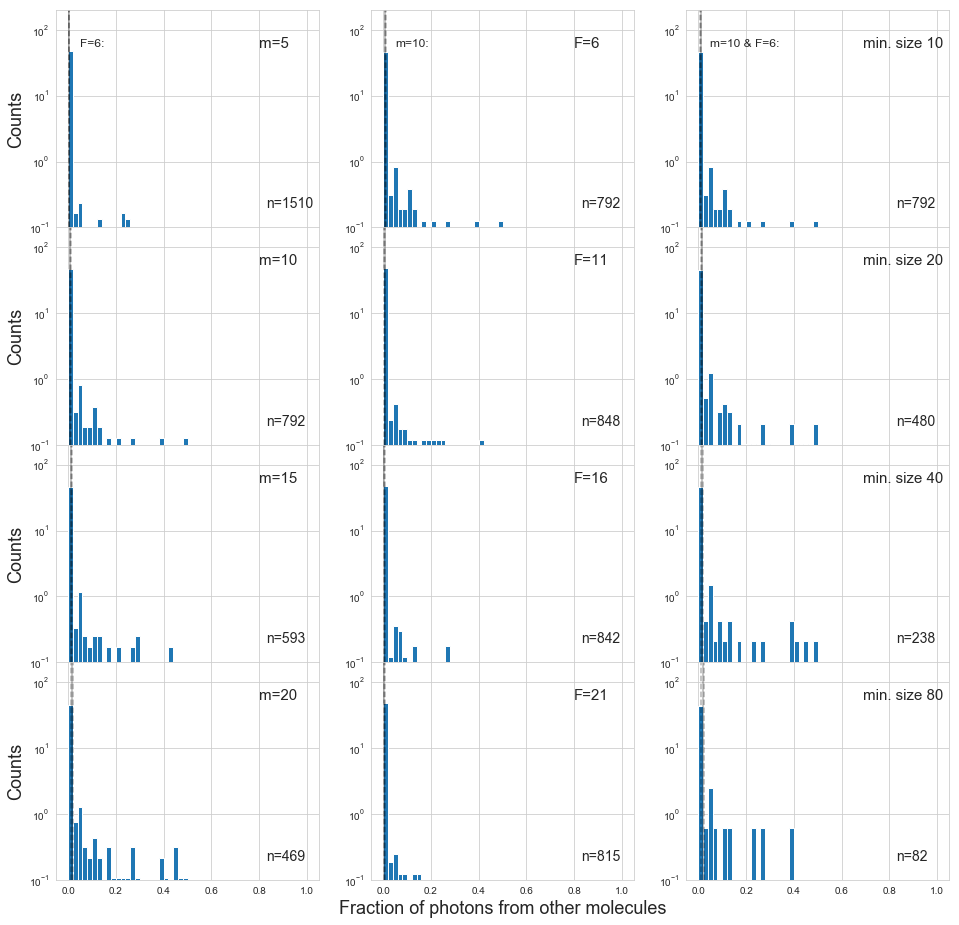

In [47]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)

fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=False, figsize=(16, 16), tight_layout=False)

plt.subplots_adjust(wspace=0.2, hspace=0)


ax[0,0].hist(bursts_m5F6['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[0,0].set_ylabel('Counts', fontsize=18)
ax[0,0].set_ylim(0.1,200)
ax[0,0].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m5F6['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m5F6['NonSingleMoleculeContaminationFraction'])
ax[0,0].axvline(av_value, color='k', alpha=0.3)
ax[0,0].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[0,0].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[1,0].hist(bursts_m10F6['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[1,0].set_ylabel('Counts', fontsize=18)
ax[1,0].set_ylim(0.1,200)
ax[1,0].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F6['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F6['NonSingleMoleculeContaminationFraction'])
ax[1,0].axvline(av_value, color='k', alpha=0.3)
ax[1,0].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[1,0].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[2,0].hist(bursts_m15F6['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[2,0].set_ylabel('Counts', fontsize=18)
ax[2,0].set_ylim(0.1,200)
ax[2,0].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m15F6['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m15F6['NonSingleMoleculeContaminationFraction'])
ax[2,0].axvline(av_value, color='k', alpha=0.3)
ax[2,0].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[2,0].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[3,0].hist(bursts_m20F6['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[3,0].set_ylabel('Counts', fontsize=18)
ax[3,0].set_ylim(0.1,200)
ax[3,0].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m20F6['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m20F6['NonSingleMoleculeContaminationFraction'])
ax[3,0].axvline(av_value, color='k', alpha=0.3)
ax[3,0].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[3,0].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[0,1].hist(bursts_m10F6['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[0,1].set_ylim(0.1,200)
ax[0,1].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F6['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F6['NonSingleMoleculeContaminationFraction'])
ax[0,1].axvline(av_value, color='k', alpha=0.3)
ax[0,1].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[0,1].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[1,1].hist(bursts_m10F11['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[1,1].set_ylim(0.1,200)
ax[1,1].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F11['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F11['NonSingleMoleculeContaminationFraction'])
ax[1,1].axvline(av_value, color='k', alpha=0.3)
ax[1,1].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[1,1].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[2,1].hist(bursts_m10F16['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[2,1].set_ylim(0.1,200)
ax[2,1].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F16['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F16['NonSingleMoleculeContaminationFraction'])
ax[2,1].axvline(av_value, color='k', alpha=0.3)
ax[2,1].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[2,1].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[3,1].hist(bursts_m10F21['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[3,1].set_ylim(0.1,200)
ax[3,1].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F21['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F21['NonSingleMoleculeContaminationFraction'])
ax[3,1].axvline(av_value, color='k', alpha=0.3)
ax[3,1].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[3,1].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[0,2].hist(bursts_m10F6['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[0,2].set_ylim(0.1,200)
ax[0,2].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F6['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F6['NonSingleMoleculeContaminationFraction'])
ax[0,2].axvline(av_value, color='k', alpha=0.3)
ax[0,2].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[0,2].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[1,2].hist(bursts_m10F6_sz20['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[1,2].set_ylim(0.1,200)
ax[1,2].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F6_sz20['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F6_sz20['NonSingleMoleculeContaminationFraction'])
ax[1,2].axvline(av_value, color='k', alpha=0.3)
ax[1,2].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[1,2].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[2,2].hist(bursts_m10F6_sz40['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[2,2].set_ylim(0.1,200)
ax[2,2].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F6_sz40['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F6_sz40['NonSingleMoleculeContaminationFraction'])
ax[2,2].axvline(av_value, color='k', alpha=0.3)
ax[2,2].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[2,2].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[3,2].hist(bursts_m10F6_sz80['NonSingleMoleculeContaminationFraction'],bins=50, range=(0,1), log=True, density=True);
ax[3,2].set_ylim(0.1,200)
ax[3,2].set_xlim(-0.05,1.05)
av_value = np.average(bursts_m10F6_sz80['NonSingleMoleculeContaminationFraction'])
sem_value = sem(bursts_m10F6_sz80['NonSingleMoleculeContaminationFraction'])
ax[3,2].axvline(av_value, color='k', alpha=0.3)
ax[3,2].axvline(av_value - sem_value, color='k', alpha=0.3, linestyle='dashed')
ax[3,2].axvline(av_value + sem_value, color='k', alpha=0.3, linestyle='dashed')

ax[3,1].set_xlabel('Fraction of photons from other molecules', fontsize=18)

ax[0,0].text(0.05,56,'F=6:', fontsize=12)
ax[0,1].text(0.05,56,'m=10:', fontsize=12)
ax[0,2].text(0.05,56,'m=10 & F=6:', fontsize=12)


ax[0,0].text(0.8,55,'m=5', fontsize=15)
ax[1,0].text(0.8,55,'m=10', fontsize=15)
ax[2,0].text(0.8,55,'m=15', fontsize=15)
ax[3,0].text(0.8,55,'m=20', fontsize=15)

ax[0,1].text(0.8,55,'F=6', fontsize=15)
ax[1,1].text(0.8,55,'F=11', fontsize=15)
ax[2,1].text(0.8,55,'F=16', fontsize=15)
ax[3,1].text(0.8,55,'F=21', fontsize=15)

ax[0,2].text(0.69,55,'min. size 10', fontsize=15)
ax[1,2].text(0.69,55,'min. size 20', fontsize=15)
ax[2,2].text(0.69,55,'min. size 40', fontsize=15)
ax[3,2].text(0.69,55,'min. size 80', fontsize=15)


ax[0,0].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m5F6['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[1,0].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F6['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[2,0].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m15F6['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[3,0].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m20F6['NonSingleMoleculeContaminationFraction'])), fontsize=14)

ax[0,1].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F6['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[1,1].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F11['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[2,1].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F16['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[3,1].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F21['NonSingleMoleculeContaminationFraction'])), fontsize=14)

ax[0,2].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F6['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[1,2].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F6_sz20['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[2,2].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F6_sz40['NonSingleMoleculeContaminationFraction'])), fontsize=14)
ax[3,2].text(0.83,2e-1,'n=' + np.str(np.size(bursts_m10F6_sz80['NonSingleMoleculeContaminationFraction'])), fontsize=14)

#plt.savefig('frequency_and_level_of_non_single_molecule_contamination_C31_D90_psgGauss.png', dpi=600, bbox_inches='tight')

Photon emission positions in **all** bursts, including photon emission positions of impure bursts:

In [48]:
BGmolecule = 15 # The index of the molecule that is used to fill in BG timestamps, rather then photons emitted from actual molecules

temp_bursts = bursts_m5F6
temp_particles = particles_m5F6
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m5F6 = np.vstack(pos_bursts_list)
pos_bursts_m5F6_single = np.vstack(pos_bursts_list_single)
pos_bursts_m5F6_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m5F6_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m5F6_notsingle_focus = []

temp_bursts = bursts_m10F6
temp_particles = particles_m10F6
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F6 = np.vstack(pos_bursts_list)
pos_bursts_m10F6_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F6_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F6_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F6_notsingle_focus = []

temp_bursts = bursts_m15F6
temp_particles = particles_m15F6
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m15F6 = np.vstack(pos_bursts_list)
pos_bursts_m15F6_single = np.vstack(pos_bursts_list_single)
pos_bursts_m15F6_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m15F6_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m15F6_notsingle_focus = []

temp_bursts = bursts_m20F6
temp_particles = particles_m20F6
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m20F6 = np.vstack(pos_bursts_list)
pos_bursts_m20F6_single = np.vstack(pos_bursts_list_single)
pos_bursts_m20F6_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m20F6_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m20F6_notsingle_focus = []



temp_bursts = bursts_m10F3
temp_particles = particles_m10F3
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F3 = np.vstack(pos_bursts_list)
pos_bursts_m10F3_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F3_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F3_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F3_notsingle_focus = []

temp_bursts = bursts_m10F11
temp_particles = particles_m10F11
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F11 = np.vstack(pos_bursts_list)
pos_bursts_m10F11_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F11_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F11_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F11_notsingle_focus = []

temp_bursts = bursts_m10F16
temp_particles = particles_m10F16
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F16 = np.vstack(pos_bursts_list)
pos_bursts_m10F16_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F16_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F16_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F16_notsingle_focus = []

temp_bursts = bursts_m10F21
temp_particles = particles_m10F21
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F21 = np.vstack(pos_bursts_list)
pos_bursts_m10F21_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F21_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F21_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F21_notsingle_focus = []



temp_bursts = bursts_m10F6_sz20
temp_particles = particles_m10F6_sz20
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F6_sz20 = np.vstack(pos_bursts_list)
pos_bursts_m10F6_sz20_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F6_sz20_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F6_sz20_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F6_sz20_notsingle_focus = []

temp_bursts = bursts_m10F6_sz40
temp_particles = particles_m10F6_sz40
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F6_sz40 = np.vstack(pos_bursts_list)
pos_bursts_m10F6_sz40_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F6_sz40_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F6_sz40_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F6_sz40_notsingle_focus = []

temp_bursts = bursts_m10F6_sz80
temp_particles = particles_m10F6_sz80
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F6_sz80 = np.vstack(pos_bursts_list)
pos_bursts_m10F6_sz80_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F6_sz80_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F6_sz80_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F6_sz80_notsingle_focus = []



temp_bursts = bursts_m10F6_w0_5
temp_particles = particles_m10F6_w0_5
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F6_w0_5 = np.vstack(pos_bursts_list)
pos_bursts_m10F6_w0_5_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F6_w0_5_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F6_w0_5_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F6_w0_5_notsingle_focus = []

temp_bursts = bursts_m10F6_w1_0
temp_particles = particles_m10F6_w1_0
pos_bursts_list = [] # The index of the particle that produced most of the photons in a burst
pos_bursts_list_single = [] # 1 for impure bursts & 0 for pure single-molecule bursts
pos_bursts_list_notsingle = [] # The level of burst impurity
pos_bursts_list_notsingle_focus = [] # The level of burst impurity
for start, stop in zip(temp_bursts.i_start, temp_bursts.i_stop):
    pos_bursts_list.append(positions[start:stop])
    par, counts = np.unique(temp_particles[start:stop], return_counts=True)
    par, counts = arrange_photon_types(par, counts, BGmolecule)
    if np.size(counts) == 1: # If the burst included photons only from a single molecule, or that plus BG photons
        pos_bursts_list_single.append(positions[start:stop]) # photon emission positions in cases of pure single-molecule bursts
    else:
        pos_bursts_list_notsingle.append(positions[start:stop]) # photon emission positions in cases of impure bursts
        for y in range(1, np.size(par), 1):
            for x in range(start, stop, 1):
                if temp_particles[x] == par[y]:
                    pos_bursts_list_notsingle_focus.append(positions[x])
        
pos_bursts_m10F6_w1_0 = np.vstack(pos_bursts_list)
pos_bursts_m10F6_w1_0_single = np.vstack(pos_bursts_list_single)
pos_bursts_m10F6_w1_0_notsingle = np.vstack(pos_bursts_list_notsingle)
if (len(pos_bursts_list_notsingle_focus) > 0): 
    pos_bursts_m10F6_w1_0_notsingle_focus = np.vstack(pos_bursts_list_notsingle_focus)
else:
    pos_bursts_m10F6_w1_0_notsingle_focus = []


### Testing positions in z
assessment of the distribution of molecule positions in the z-coordinate for all bursts as well as for impure and pure bursts, for different m values, different F value, different burst size threshold values & different burst width threshold values

#### different m values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


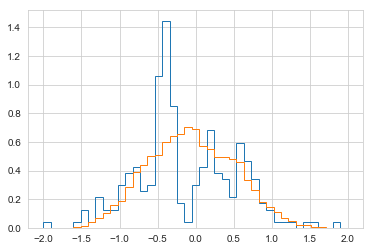

In [49]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m5F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m5F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


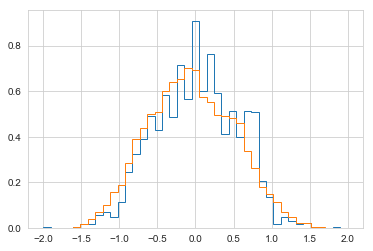

In [50]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
plt.hist(pos_bursts_m5F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m5F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


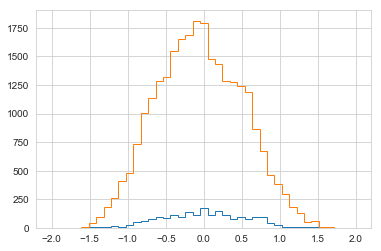

In [51]:
# the magnitude of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
plt.hist(pos_bursts_m5F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m5F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


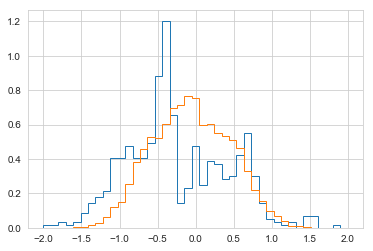

In [52]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m20F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


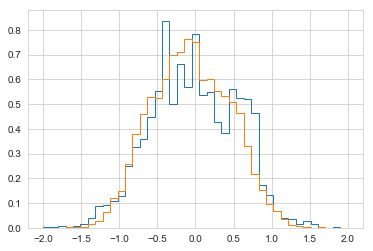

In [53]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
plt.hist(pos_bursts_m20F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


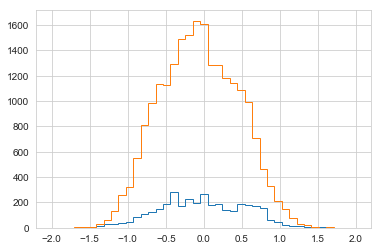

In [54]:
# the magnitude of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
plt.hist(pos_bursts_m20F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m20F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


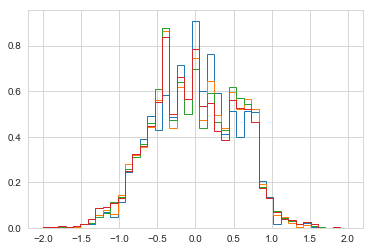

In [55]:
# Comparing the shapes of molecule position distributions of impure bursts - different m values
plt.hist(pos_bursts_m5F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m15F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [56]:
# Mean molecule position - impure bursts
test1 = pos_bursts_m5F6_notsingle[~np.isnan(pos_bursts_m5F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test3 = pos_bursts_m15F6_notsingle[~np.isnan(pos_bursts_m15F6_notsingle).any(axis=1)]
test4 = pos_bursts_m20F6_notsingle[~np.isnan(pos_bursts_m20F6_notsingle).any(axis=1)]
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.010716736, 0.00420772, -0.0032101937, -0.019527435],
 [0.023771133623359676,
  0.020010356992714248,
  0.019425318755384734,
  0.018812032098376855])

In [57]:
# standard deviation of molecule position - impure bursts
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5367505, 0.55288106, 0.5610552, 0.56495374],
 [0.00857074668345724,
  0.0072162681624850615,
  0.007005531678103687,
  0.00678454883344908])

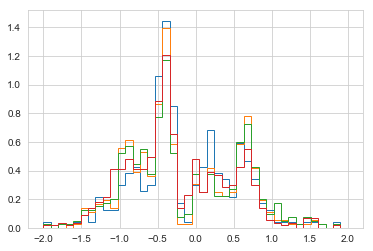

In [58]:
# Comparing the shapes of molecule position distributions of photons from impure bursts - different m values
if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m5F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m15F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m20F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [59]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m5F6_notsingle_focus[~np.isnan(pos_bursts_m5F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m15F6_notsingle_focus[~np.isnan(pos_bursts_m15F6_notsingle_focus).any(axis=1)]
    temp_dataset = test3[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0:
    test4 = pos_bursts_m20F6_notsingle_focus[~np.isnan(pos_bursts_m20F6_notsingle_focus).any(axis=1)]
    temp_dataset = test4[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test4 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([-0.13890046, -0.18107022, -0.15387921, -0.2333007],
 [0.08431073301004233,
  0.07250498082285795,
  0.07114672362860469,
  0.0550863012197334])

In [60]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0:
    temp_dataset = test3[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0:
    temp_dataset = test4[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.66444165, 0.7073152, 0.73464537, 0.67487913],
 [0.03026448762511401,
  0.026071984417137657,
  0.025592584037722743,
  0.019832237784261183])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


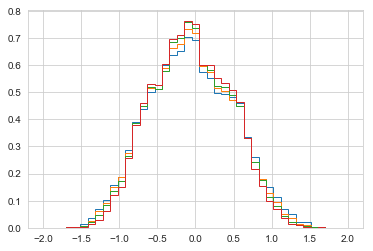

In [61]:
# Comparing the shapes of molecule position distributions of pure bursts - different m values
plt.hist(pos_bursts_m5F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m15F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [62]:
# Mean molecule position - pure bursts
test1 = pos_bursts_m5F6_single[~np.isnan(pos_bursts_m5F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test3 = pos_bursts_m15F6_single[~np.isnan(pos_bursts_m15F6_single).any(axis=1)]
test4 = pos_bursts_m20F6_single[~np.isnan(pos_bursts_m20F6_single).any(axis=1)]
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.05569083, -0.06281041, -0.06303512, -0.06029118],
 [0.006776805082299997,
  0.006733946574281585,
  0.006758013911334904,
  0.0067392496136305935])

In [63]:
# Standard deviation of molecule position - pure bursts
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5625574, 0.5405231, 0.5279718, 0.5093859],
 [0.00244479281869778,
  0.0024293234903839177,
  0.0024379992568346743,
  0.00243122156037168])

In [64]:
# Mean molecule position - all bursts
test1 = pos_bursts_m5F6[~np.isnan(pos_bursts_m5F6).any(axis=1)]
test2 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test3 = pos_bursts_m15F6[~np.isnan(pos_bursts_m15F6).any(axis=1)]
test4 = pos_bursts_m20F6[~np.isnan(pos_bursts_m20F6).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.05110906, -0.0557044, -0.055835854, -0.054729417],
 [0.006521498969270005,
  0.006387113230894366,
  0.006391676572725116,
  0.006362444859108432])

In [65]:
# Standard deviation of molecule position - all bursts
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5610675, 0.5422395, 0.53241783, 0.5175084],
 [0.002352696350917557,
  0.0023042123885657936,
  0.0023058548215841666,
  0.0022953041967897106])

#### different F values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


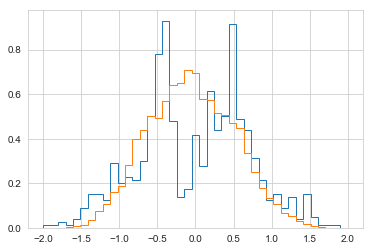

In [66]:
if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F3_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F3_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


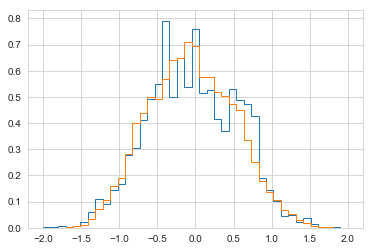

In [67]:
plt.hist(pos_bursts_m10F3_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F3_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


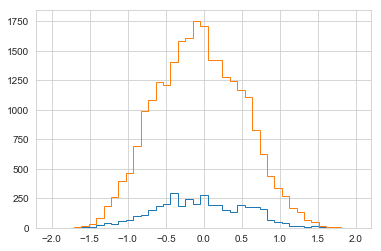

In [68]:
plt.hist(pos_bursts_m10F3_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F3_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


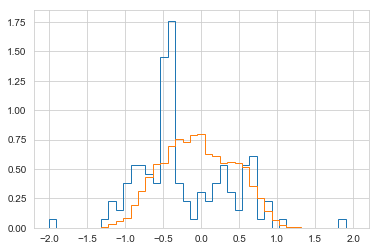

In [69]:
if np.shape(pos_bursts_m10F21_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F21_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


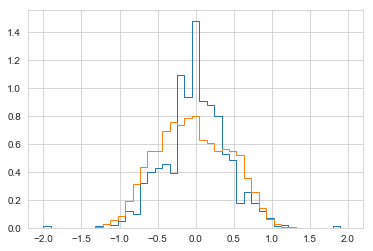

In [70]:
plt.hist(pos_bursts_m10F21_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


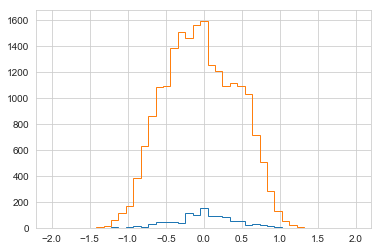

In [71]:
plt.hist(pos_bursts_m10F21_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F21_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


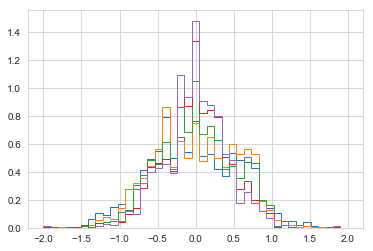

In [72]:
plt.hist(pos_bursts_m10F3_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F11_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F16_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [73]:
test1 = pos_bursts_m10F3_notsingle[~np.isnan(pos_bursts_m10F3_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test3 = pos_bursts_m10F11_notsingle[~np.isnan(pos_bursts_m10F11_notsingle).any(axis=1)]
test4 = pos_bursts_m10F16_notsingle[~np.isnan(pos_bursts_m10F16_notsingle).any(axis=1)]
test5 = pos_bursts_m10F21_notsingle[~np.isnan(pos_bursts_m10F21_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.03698241, 0.00420772, 0.013047906, 0.00449824, 0.0014435205],
 [0.018750940635287178,
  0.020010356992714248,
  0.024476457117630007,
  0.023833904784503448,
  0.024376161725872512])

In [74]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5883173, 0.55288106, 0.49758616, 0.4262348, 0.40292585],
 [0.006762714281668373,
  0.0072162681624850615,
  0.008823781251340894,
  0.008590231983419455,
  0.008784200942494389])

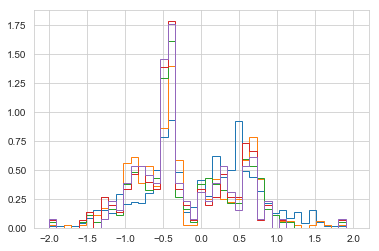

In [75]:
# Comparing the shapes of molecule position distributions of photons from impure bursts - different m values
if np.shape(pos_bursts_m10F3_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F3_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F11_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F11_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F16_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F16_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F21_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F21_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);


In [76]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F3_notsingle_focus[~np.isnan(pos_bursts_m10F3_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F11_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m10F11_notsingle_focus[~np.isnan(pos_bursts_m10F11_notsingle_focus).any(axis=1)]
    temp_dataset = test3[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F16_notsingle_focus)[0] > 0:
    test4 = pos_bursts_m10F16_notsingle_focus[~np.isnan(pos_bursts_m10F16_notsingle_focus).any(axis=1)]
    temp_dataset = test4[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test4 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F21_notsingle_focus)[0] > 0:
    test5 = pos_bursts_m10F21_notsingle_focus[~np.isnan(pos_bursts_m10F21_notsingle_focus).any(axis=1)]
    temp_dataset = test5[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test5 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([-0.018273965, -0.18107022, -0.21353787, -0.24490565, -0.23060782],
 [0.04869473920844361,
  0.07250498082285795,
  0.09316342638500907,
  0.10059347469776525,
  0.10231946106295381])

In [77]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F11_notsingle_focus)[0] > 0:
    temp_dataset = test3[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F16_notsingle_focus)[0] > 0:
    temp_dataset = test4[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F21_notsingle_focus)[0] > 0:
    temp_dataset = test5[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.7086542, 0.7073152, 0.651027, 0.6319108, 0.5965767],
 [0.017541805989440846,
  0.026071984417137657,
  0.03339698165166462,
  0.03600645957274584,
  0.036578463807187774])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


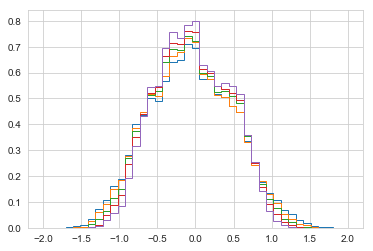

In [78]:
plt.hist(pos_bursts_m10F3_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F11_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F16_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [79]:
test1 = pos_bursts_m10F3_single[~np.isnan(pos_bursts_m10F3_single).any(axis=1)]
test2 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test3 = pos_bursts_m10F11_single[~np.isnan(pos_bursts_m10F11_single).any(axis=1)]
test4 = pos_bursts_m10F16_single[~np.isnan(pos_bursts_m10F16_single).any(axis=1)]
test5 = pos_bursts_m10F21_single[~np.isnan(pos_bursts_m10F21_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.056477338, -0.06281041, -0.052051254, -0.04615933, -0.03811962],
 [0.006939933233729725,
  0.006733946574281585,
  0.00654294325103693,
  0.0064816865294962805,
  0.006428492888067613])

In [80]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.56339073, 0.5405231, 0.5153599, 0.49278924, 0.46860838],
 [0.002503637374009981,
  0.0024293234903839177,
  0.002360413170130982,
  0.002338305607894092,
  0.002319104721870255])

In [81]:
test1 = pos_bursts_m10F3[~np.isnan(pos_bursts_m10F3).any(axis=1)]
test2 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test3 = pos_bursts_m10F11[~np.isnan(pos_bursts_m10F11).any(axis=1)]
test4 = pos_bursts_m10F16[~np.isnan(pos_bursts_m10F16).any(axis=1)]
test5 = pos_bursts_m10F21[~np.isnan(pos_bursts_m10F21).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.053942103, -0.0557044, -0.04797792, -0.04349679, -0.03617915],
 [0.00651130069199201,
  0.006387113230894366,
  0.006324429313053381,
  0.006268795337360293,
  0.006229678380223619])

In [82]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5667323, 0.5422395, 0.51450735, 0.489647, 0.46568134],
 [0.0023490194724506506,
  0.0023042123885657936,
  0.0022815898013591185,
  0.002261510255641227,
  0.002247387954468719])

#### different size threshold values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


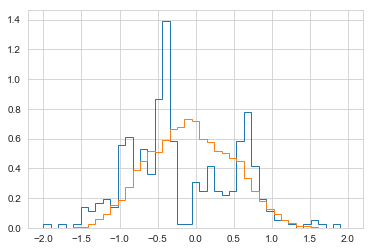

In [83]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


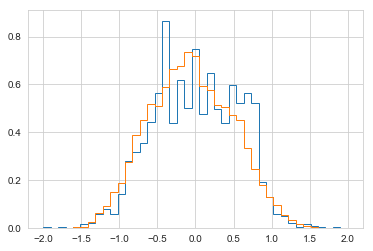

In [84]:
plt.hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


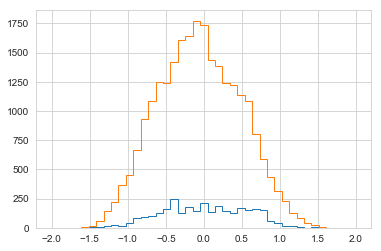

In [85]:
plt.hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


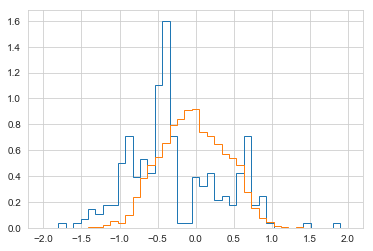

In [86]:
if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz40_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


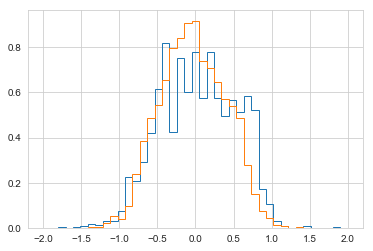

In [87]:
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


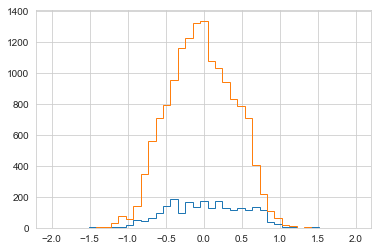

In [88]:
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_sz40_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


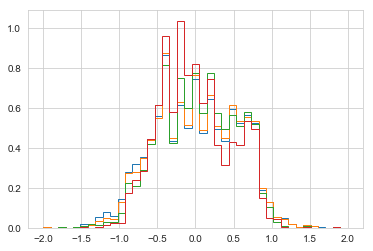

In [89]:
plt.hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz20_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz80_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [90]:
test1 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_sz20_notsingle[~np.isnan(pos_bursts_m10F6_sz20_notsingle).any(axis=1)]
test3 = pos_bursts_m10F6_sz40_notsingle[~np.isnan(pos_bursts_m10F6_sz40_notsingle).any(axis=1)]
test4 = pos_bursts_m10F6_sz80_notsingle[~np.isnan(pos_bursts_m10F6_sz80_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.00420772, 0.02017858, 0.03045144, -0.008691786],
 [0.020010356992714248,
  0.01976639173868815,
  0.020230117820749308,
  0.022367111979921753])

In [91]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.55288106, 0.5376946, 0.49679127, 0.46420062],
 [0.0072162681624850615,
  0.0071281941536521475,
  0.007294719322052756,
  0.00806360898837067])

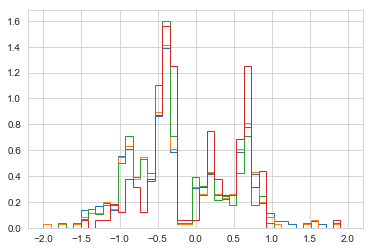

In [92]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz20_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz40_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz80_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [93]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_sz20_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz20_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m10F6_sz40_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz40_notsingle_focus).any(axis=1)]
    temp_dataset = test3[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0:
    test4 = pos_bursts_m10F6_sz80_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz80_notsingle_focus).any(axis=1)]
    temp_dataset = test4[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test4 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([-0.18107022, -0.18665667, -0.2675002, -0.033462532],
 [0.07250498082285795,
  0.07119887495413835,
  0.07125942575634214,
  0.09172278420981378])

In [94]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0:
    temp_dataset = test3[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0:
    temp_dataset = test4[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.7073152, 0.6821126, 0.613338, 0.5930434],
 [0.026071984417137657,
  0.025599228762494566,
  0.02560023323132702,
  0.032845635374516034])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


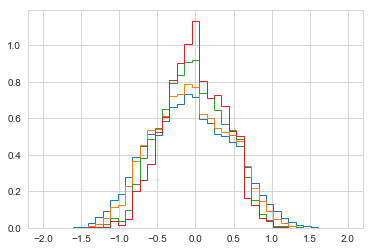

In [95]:
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz20_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz80_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [96]:
test1 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_sz20_single[~np.isnan(pos_bursts_m10F6_sz20_single).any(axis=1)]
test3 = pos_bursts_m10F6_sz40_single[~np.isnan(pos_bursts_m10F6_sz40_single).any(axis=1)]
test4 = pos_bursts_m10F6_sz80_single[~np.isnan(pos_bursts_m10F6_sz80_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.06281041, -0.059155628, -0.033734836, -0.011838881],
 [0.006733946574281585,
  0.006668510749722509,
  0.006815431521438313,
  0.008821729500904246])

In [97]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5405231, 0.4928096, 0.4251672, 0.3868364],
 [0.0024293234903839177,
  0.002405695825620827,
  0.002458640968390333,
  0.003182141684181389])

In [98]:
test1 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test2 = pos_bursts_m10F6_sz20[~np.isnan(pos_bursts_m10F6_sz20).any(axis=1)]
test3 = pos_bursts_m10F6_sz40[~np.isnan(pos_bursts_m10F6_sz40).any(axis=1)]
test4 = pos_bursts_m10F6_sz80[~np.isnan(pos_bursts_m10F6_sz80).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position

tmp, tmperr

([-0.0557044, -0.049680408, -0.025113741, -0.011262192],
 [0.006387113230894366, 0.006336763812213923, 0.0065030335954357615])

In [99]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5422395, 0.49904668, 0.43602237, 0.40213025],
 [0.0023042123885657936,
  0.0022860323930304336,
  0.002345970030464502,
  0.00298950611933657])

#### different width threshold values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


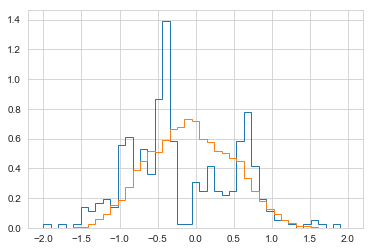

In [100]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


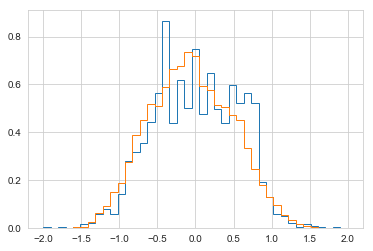

In [101]:
plt.hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


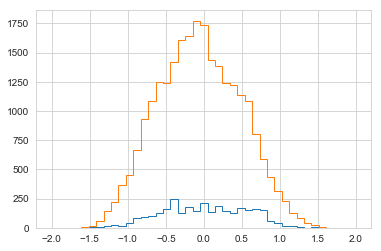

In [102]:
plt.hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


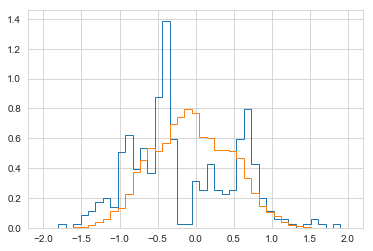

In [103]:
if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w1_0_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


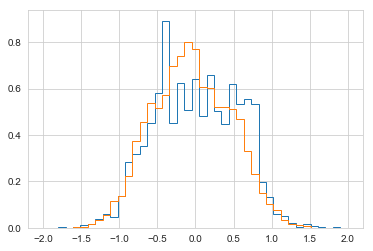

In [104]:
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


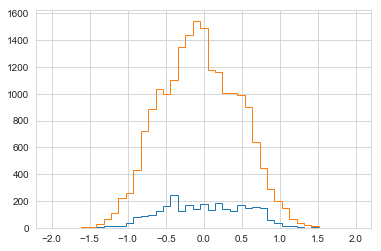

In [105]:
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_w1_0_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


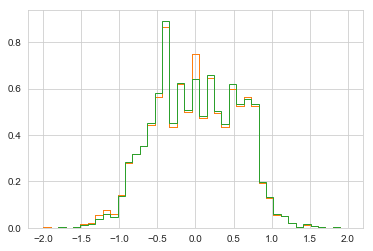

In [106]:
plt.hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w0_5_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [107]:
test1 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5_notsingle[~np.isnan(pos_bursts_m10F6_w0_5_notsingle).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0_notsingle[~np.isnan(pos_bursts_m10F6_w1_0_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.00420772, 0.00420772, 0.013686373],
 [0.020010356992714248, 0.020010356992714248, 0.020147438228660473])

In [108]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.55288106, 0.55288106, 0.5471917],
 [0.0072162681624850615, 0.0072162681624850615, 0.007265598147943062])

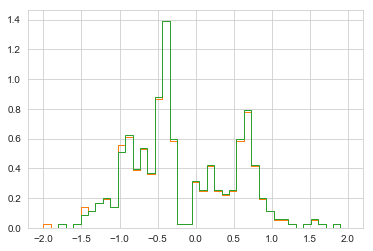

In [109]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w0_5_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w1_0_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);

In [110]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_w0_5_notsingle_focus[~np.isnan(pos_bursts_m10F6_w0_5_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m10F6_w1_0_notsingle_focus[~np.isnan(pos_bursts_m10F6_w1_0_notsingle_focus).any(axis=1)]
    temp_dataset = test3[:,2]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)


tmp, tmperr

([-0.18107022, -0.18107022, -0.16390039],
 [0.07250498082285795, 0.07250498082285795, 0.07208142981423485])

In [111]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0:
    temp_dataset = test3[:,2]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)


    
tmp, tmperr

([0.7073152, 0.7073152, 0.6973891],
 [0.026071984417137657, 0.026071984417137657, 0.025918262744069442])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


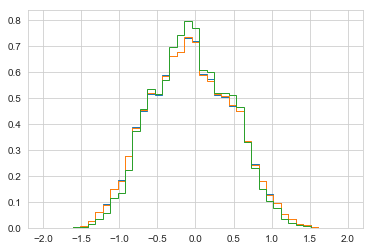

In [112]:
plt.hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w0_5_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True);


In [113]:
test1 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5_single[~np.isnan(pos_bursts_m10F6_w0_5_single).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0_single[~np.isnan(pos_bursts_m10F6_w1_0_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.06281041, -0.06282702, -0.05298585],
 [0.006733946574281585, 0.006769038308213321, 0.007082428650791957])

In [114]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5405231, 0.5404454, 0.5088513],
 [0.0024293234903839177, 0.0024419818073557285, 0.002555010121593328])

In [115]:
test1 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5[~np.isnan(pos_bursts_m10F6_w0_5).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0[~np.isnan(pos_bursts_m10F6_w1_0).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,2]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.0557044, -0.055651102, -0.04464227],
 [0.006387113230894366, 0.006417039735758148, 0.006695055518057401])

In [116]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.5422395, 0.5421865, 0.51427937],
 [0.0023042123885657936, 0.002315007834182467, 0.0024152824204776505])

### Testing positions in x
assessment of the distribution of molecule positions in the x-coordinate for all bursts as well as for impure and pure bursts, for different m values, different F value, different burst size threshold values & different burst width threshold values

#### different m values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


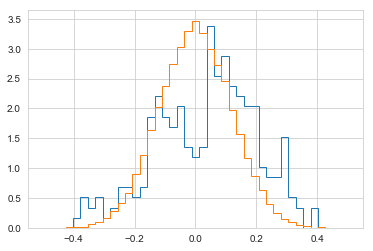

In [117]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m5F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m5F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


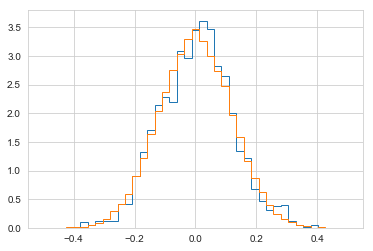

In [118]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
plt.hist(pos_bursts_m5F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m5F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


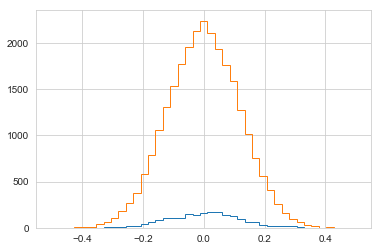

In [119]:
# the magnitude of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
plt.hist(pos_bursts_m5F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m5F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


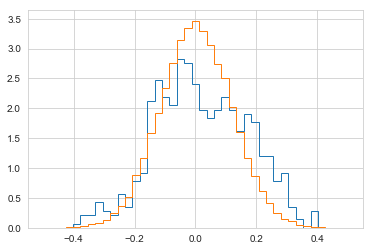

In [120]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m20F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


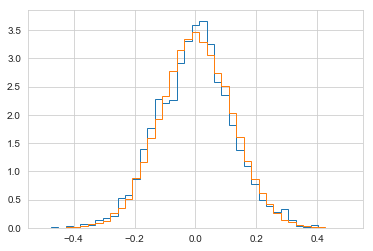

In [121]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
plt.hist(pos_bursts_m20F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


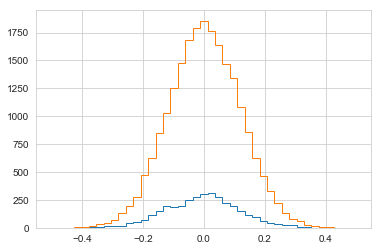

In [122]:
# the magnitude of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
plt.hist(pos_bursts_m20F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m20F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


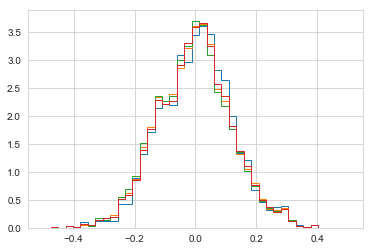

In [123]:
# Comparing the shapes of molecule position distributions of impure bursts - different m values
plt.hist(pos_bursts_m5F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m15F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [124]:
# Mean molecule position - impure bursts
test1 = pos_bursts_m5F6_notsingle[~np.isnan(pos_bursts_m5F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test3 = pos_bursts_m15F6_notsingle[~np.isnan(pos_bursts_m15F6_notsingle).any(axis=1)]
test4 = pos_bursts_m20F6_notsingle[~np.isnan(pos_bursts_m20F6_notsingle).any(axis=1)]
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.0023485543, -0.004353036, -0.0064741285, -0.0030703272],
 [0.00525393092210332,
  0.004359783137262726,
  0.0041949885868182366,
  0.0040127831134893575])

In [125]:
# standard deviation of molecule position - impure bursts
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11863339, 0.12045968, 0.121162504, 0.120509945],
 [0.0018943191259672813,
  0.001572253847565387,
  0.0015128774936441767,
  0.0014472080482352536])

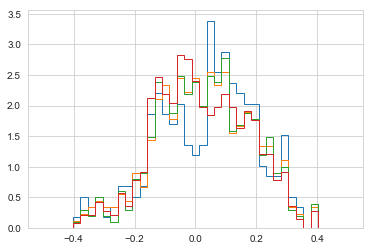

In [126]:
# Comparing the shapes of molecule position distributions of photons from impure bursts - different m values
if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m5F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m15F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m20F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [127]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m5F6_notsingle_focus[~np.isnan(pos_bursts_m5F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m15F6_notsingle_focus[~np.isnan(pos_bursts_m15F6_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0:
    test4 = pos_bursts_m20F6_notsingle_focus[~np.isnan(pos_bursts_m20F6_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test4 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([0.032582555, 0.026640572, 0.026640572, 0.026640572],
 [0.020736020012680392,
  0.016000787496553138,
  0.016000787496553138,
  0.016000787496553138])

In [128]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.16341782, 0.1560941, 0.1560941, 0.1560941],
 [0.007443477559084835,
  0.005753705011403119,
  0.005753705011403119,
  0.005753705011403119])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


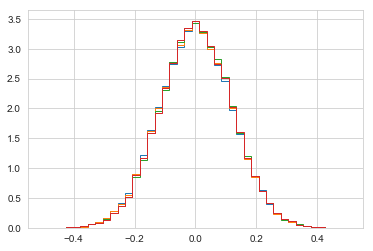

In [129]:
# Comparing the shapes of molecule position distributions of pure bursts - different m values
plt.hist(pos_bursts_m5F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m15F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [130]:
# Mean molecule position - pure bursts
test1 = pos_bursts_m5F6_single[~np.isnan(pos_bursts_m5F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test3 = pos_bursts_m15F6_single[~np.isnan(pos_bursts_m15F6_single).any(axis=1)]
test4 = pos_bursts_m20F6_single[~np.isnan(pos_bursts_m20F6_single).any(axis=1)]
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.000833792, -0.0002070534, 0.001861756, 0.0015915408],
 [0.0014214039601998189,
  0.001467903815522727,
  0.0014991135619556223,
  0.0015497634760758816])

In [131]:
# Standard deviation of molecule position - pure bursts
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11799385, 0.11782629, 0.11711869, 0.117138796],
 [0.0005127841337324879,
  0.0005295576985768049,
  0.0005408153773672804,
  0.0005590857037092029])

In [132]:
# Mean molecule position - all bursts
test1 = pos_bursts_m5F6[~np.isnan(pos_bursts_m5F6).any(axis=1)]
test2 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test3 = pos_bursts_m15F6[~np.isnan(pos_bursts_m15F6).any(axis=1)]
test4 = pos_bursts_m20F6[~np.isnan(pos_bursts_m20F6).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.000614227, -0.0006466563, 0.0008586226, 0.0009554812],
 [0.0013720331040382025,
  0.0013912950121318544,
  0.001412315398481303,
  0.0014460075555506604])

In [133]:
# Standard deviation of molecule position - all bursts
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11804084, 0.1181152, 0.11764393, 0.11761533],
 [0.0004949747340722512,
  0.0005019230749997796,
  0.0005095055162282687,
  0.0005216590894081466])

#### different F values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


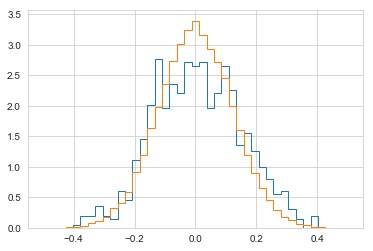

In [134]:
if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F3_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F3_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


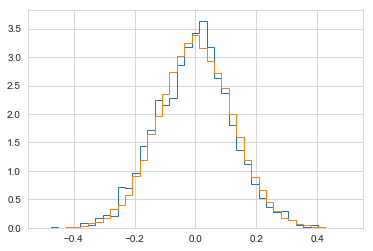

In [135]:
plt.hist(pos_bursts_m10F3_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F3_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


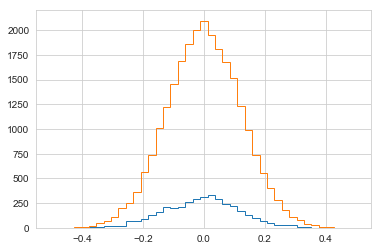

In [136]:
plt.hist(pos_bursts_m10F3_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F3_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


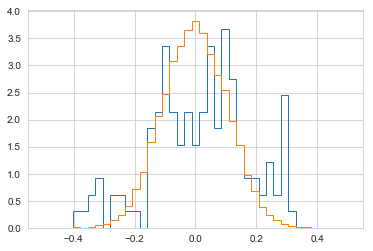

In [137]:
if np.shape(pos_bursts_m10F21_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F21_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


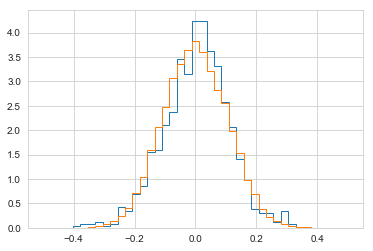

In [138]:
plt.hist(pos_bursts_m10F21_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


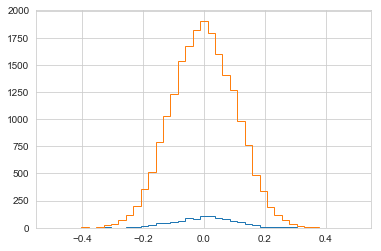

In [139]:
plt.hist(pos_bursts_m10F21_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F21_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


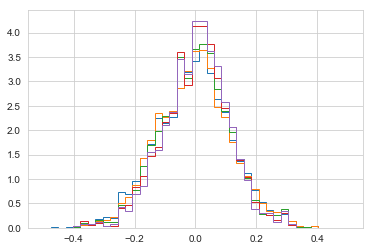

In [140]:
plt.hist(pos_bursts_m10F3_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F11_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F16_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [141]:
test1 = pos_bursts_m10F3_notsingle[~np.isnan(pos_bursts_m10F3_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test3 = pos_bursts_m10F11_notsingle[~np.isnan(pos_bursts_m10F11_notsingle).any(axis=1)]
test4 = pos_bursts_m10F16_notsingle[~np.isnan(pos_bursts_m10F16_notsingle).any(axis=1)]
test5 = pos_bursts_m10F21_notsingle[~np.isnan(pos_bursts_m10F21_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.0058981245, -0.004353036, -0.002691125, 0.0009772985, 0.0029504504],
 [0.003914020449426622,
  0.004359783137262726,
  0.005630603561095526,
  0.006096879547738109,
  0.006502287080799293])

In [142]:
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.12280375, 0.12045968, 0.11446552, 0.109033845, 0.10747958],
 [0.0014116305832343082,
  0.001572253847565387,
  0.0020298368137659424,
  0.0021974414110763805,
  0.0023431661883815736])

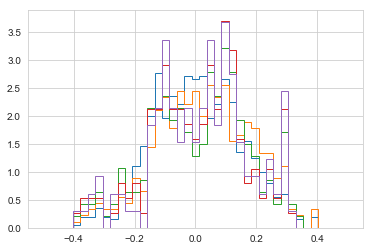

In [143]:
# Comparing the shapes of molecule position distributions of photons from impure bursts - different m values
if np.shape(pos_bursts_m10F3_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F3_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F11_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F11_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F16_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F16_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F21_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F21_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);


In [144]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F3_notsingle_focus[~np.isnan(pos_bursts_m10F3_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F11_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F11_notsingle_focus[~np.isnan(pos_bursts_m10F11_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F16_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F16_notsingle_focus[~np.isnan(pos_bursts_m10F16_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F21_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F21_notsingle_focus[~np.isnan(pos_bursts_m10F21_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([0.0073468257, 0.026640572, 0.009834386, 0.0113781905, 0.015994662],
 [0.009874454505430548,
  0.016000787496553138,
  0.023066336703615044,
  0.02486655319224221,
  0.02731590511926115])

In [145]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F11_notsingle_focus)[0] > 0:
    temp_dataset = test3[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F16_notsingle_focus)[0] > 0:
    temp_dataset = test4[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F21_notsingle_focus)[0] > 0:
    temp_dataset = test5[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.15926622, 0.12045968, 0.11446552, 0.109033845, 0.10747958],
 [0.009765238403975553,
  0.001572253847565387,
  0.0020298368137659424,
  0.0021974414110763805,
  0.0023431661883815736])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


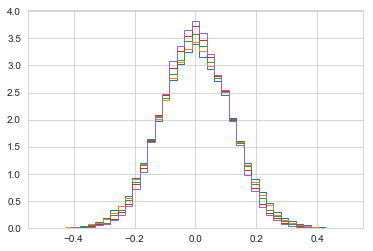

In [146]:
plt.hist(pos_bursts_m10F3_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F11_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F16_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [147]:
test1 = pos_bursts_m10F3_single[~np.isnan(pos_bursts_m10F3_single).any(axis=1)]
test2 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test3 = pos_bursts_m10F11_single[~np.isnan(pos_bursts_m10F11_single).any(axis=1)]
test4 = pos_bursts_m10F16_single[~np.isnan(pos_bursts_m10F16_single).any(axis=1)]
test5 = pos_bursts_m10F21_single[~np.isnan(pos_bursts_m10F21_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.0006122544, -0.0002070534, -0.00017765853, -0.0011954575, -0.0014176747],
 [0.0014931678811998927,
  0.001467903815522727,
  0.0014394432965301653,
  0.001425897167307474,
  0.001435277869950302])

In [148]:
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.12121687, 0.11782629, 0.11337884, 0.10840801, 0.10462533],
 [0.0005386724897491179,
  0.0005295576985768049,
  0.0005192893604569321,
  0.0005144005617798826,
  0.0005177822379333355])

In [149]:
test1 = pos_bursts_m10F3[~np.isnan(pos_bursts_m10F3).any(axis=1)]
test2 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test3 = pos_bursts_m10F11[~np.isnan(pos_bursts_m10F11).any(axis=1)]
test4 = pos_bursts_m10F16[~np.isnan(pos_bursts_m10F16).any(axis=1)]
test5 = pos_bursts_m10F21[~np.isnan(pos_bursts_m10F21).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.00023439791, -0.0006466563, -0.00033492973, -0.0010812576, -0.0012034288],
 [0.0013952962921172465,
  0.0013912950121318544,
  0.0013945353223977644,
  0.001388349618174075,
  0.0014015851135237701])

In [150]:
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.12144416, 0.1181152, 0.11344877, 0.10844208, 0.104771376],
 [0.00050336763741505,
  0.0005019230749997796,
  0.0005030900964412521,
  0.0005008564993459717,
  0.0005056288608500113])

#### different size threshold values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


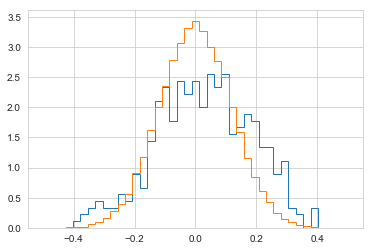

In [151]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


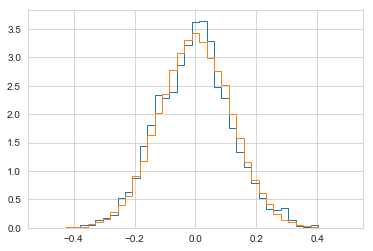

In [152]:
plt.hist(pos_bursts_m10F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


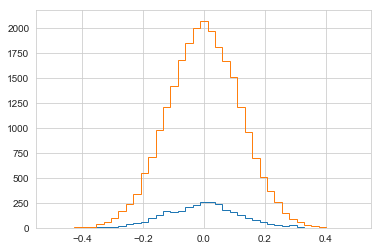

In [153]:
plt.hist(pos_bursts_m10F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


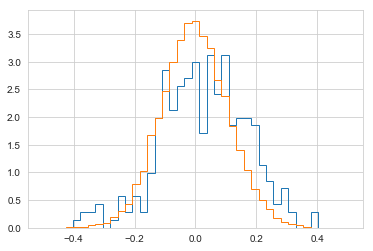

In [154]:
if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz40_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


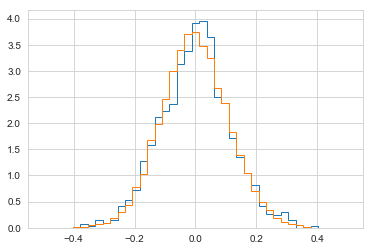

In [155]:
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


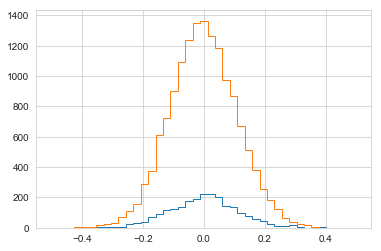

In [156]:
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_sz40_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


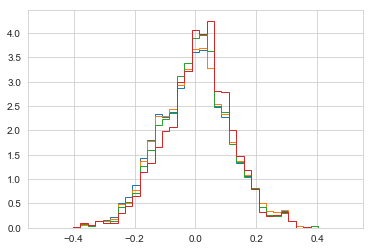

In [157]:
plt.hist(pos_bursts_m10F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz20_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz80_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [158]:
test1 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_sz20_notsingle[~np.isnan(pos_bursts_m10F6_sz20_notsingle).any(axis=1)]
test3 = pos_bursts_m10F6_sz40_notsingle[~np.isnan(pos_bursts_m10F6_sz40_notsingle).any(axis=1)]
test4 = pos_bursts_m10F6_sz80_notsingle[~np.isnan(pos_bursts_m10F6_sz80_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.004353036, -0.0015783387, -0.0008092446, 0.008258065],
 [0.004359783137262726,
  0.004354400675999039,
  0.004646306969919221,
  0.005379478183156677])

In [159]:
tmp = []
tmperr = []
temp_dataset = test1[:,2]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,2]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.55288106, 0.5376946, 0.49679127, 0.46420062],
 [0.0072162681624850615,
  0.0071281941536521475,
  0.007294719322052756,
  0.00806360898837067])

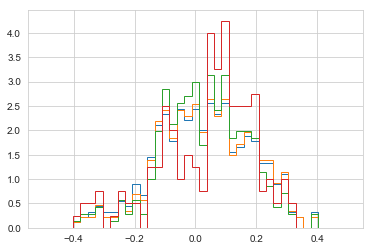

In [160]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz20_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz40_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz80_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [161]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_sz20_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz20_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m10F6_sz40_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz40_notsingle_focus).any(axis=1)]
    temp_dataset = test3[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0:
    test4 = pos_bursts_m10F6_sz80_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz80_notsingle_focus).any(axis=1)]
    temp_dataset = test4[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test4 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([0.026640572, 0.031111356, 0.025427787, 0.03667731],
 [0.016000787496553138,
  0.01591936176522605,
  0.01633430728926881,
  0.023824975853584687])

In [162]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0:
    temp_dataset = test3[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0:
    temp_dataset = test4[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.1560941, 0.1525136, 0.14059125, 0.15404293],
 [0.005753705011403119,
  0.005723733168471868,
  0.005868165348928415,
  0.008531648784742774])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


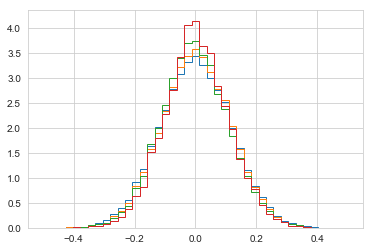

In [163]:
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz20_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz80_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [164]:
test1 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_sz20_single[~np.isnan(pos_bursts_m10F6_sz20_single).any(axis=1)]
test3 = pos_bursts_m10F6_sz40_single[~np.isnan(pos_bursts_m10F6_sz40_single).any(axis=1)]
test4 = pos_bursts_m10F6_sz80_single[~np.isnan(pos_bursts_m10F6_sz80_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.0002070534, 0.001360218, -0.0022603604, 0.0034538445],
 [0.001467903815522727,
  0.0015365745941448158,
  0.0017623431367037052,
  0.002387952641377213])

In [165]:
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11782629, 0.11355439, 0.10994029, 0.10471269],
 [0.0005295576985768049,
  0.0005543262983961869,
  0.0006357585916893364,
  0.0008613734366780443])

In [166]:
test1 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test2 = pos_bursts_m10F6_sz20[~np.isnan(pos_bursts_m10F6_sz20).any(axis=1)]
test3 = pos_bursts_m10F6_sz40[~np.isnan(pos_bursts_m10F6_sz40).any(axis=1)]
test4 = pos_bursts_m10F6_sz80[~np.isnan(pos_bursts_m10F6_sz80).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position

tmp, tmperr

([-0.0006466563, 0.0010092531, -0.0020654558, 0.004334194],
 [0.0013912950121318544, 0.0014494996444725638, 0.0016481826955508766])

In [167]:
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.1181152, 0.11415417, 0.11050912, 0.10603306],
 [0.0005019230749997796,
  0.0005229172607897143,
  0.0005945820688450293,
  0.0007882681685896829])

#### different width threshold values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


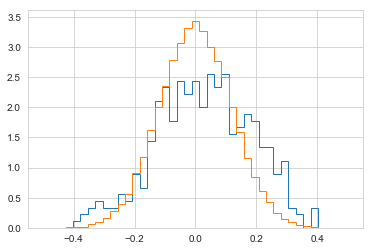

In [168]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


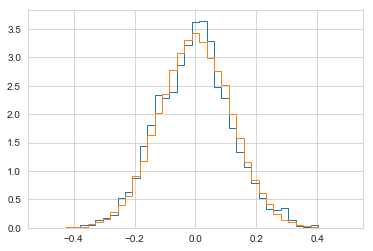

In [169]:
plt.hist(pos_bursts_m10F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


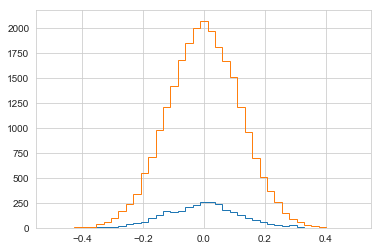

In [170]:
plt.hist(pos_bursts_m10F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


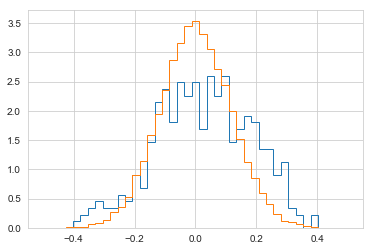

In [171]:
if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w1_0_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


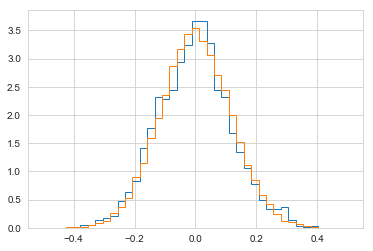

In [172]:
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


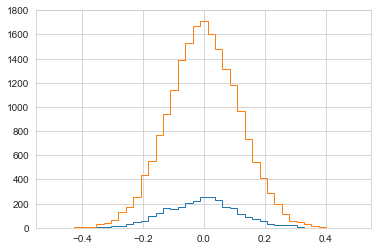

In [173]:
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_w1_0_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


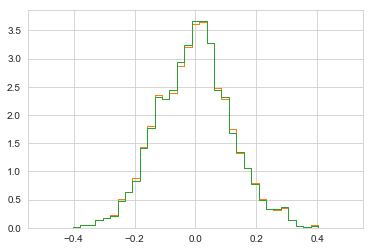

In [174]:
plt.hist(pos_bursts_m10F6_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w0_5_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [175]:
test1 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5_notsingle[~np.isnan(pos_bursts_m10F6_w0_5_notsingle).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0_notsingle[~np.isnan(pos_bursts_m10F6_w1_0_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.004353036, -0.004353036, -0.0042182445],
 [0.004359783137262726, 0.004359783137262726, 0.004410488820652146])

In [176]:
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.12045968, 0.12045968, 0.119786076],
 [0.001572253847565387, 0.001572253847565387, 0.0015905166806727366])

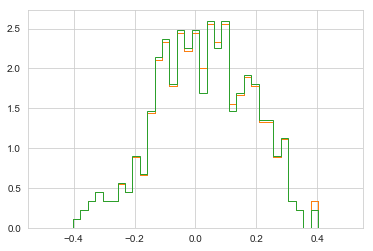

In [177]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w0_5_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w1_0_notsingle_focus[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [178]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_w0_5_notsingle_focus[~np.isnan(pos_bursts_m10F6_w0_5_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m10F6_w1_0_notsingle_focus[~np.isnan(pos_bursts_m10F6_w1_0_notsingle_focus).any(axis=1)]
    temp_dataset = test3[:,0]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)


tmp, tmperr

([0.026640572, 0.026640572, 0.025184108],
 [0.016000787496553138, 0.016000787496553138, 0.016136998602976318])

In [179]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,0]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)


    
tmp, tmperr

([0.1560941, 0.1560941, 0.1560941],
 [0.005753705011403119, 0.005753705011403119, 0.005753705011403119])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


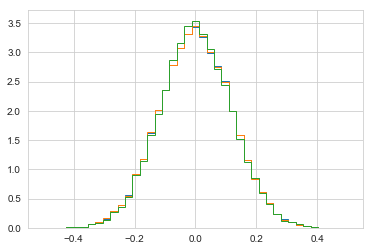

In [180]:
plt.hist(pos_bursts_m10F6_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w0_5_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,0]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);


In [181]:
test1 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5_single[~np.isnan(pos_bursts_m10F6_w0_5_single).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0_single[~np.isnan(pos_bursts_m10F6_w1_0_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.0002070534, -0.00051236537, -7.169517e-05],
 [0.001467903815522727, 0.0014738643399498028, 0.001611533139443588])

In [182]:
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11782629, 0.11767449, 0.115783826],
 [0.0005295576985768049, 0.0005317076916637624, 0.0005813660141409969])

In [183]:
test1 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5[~np.isnan(pos_bursts_m10F6_w0_5).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0[~np.isnan(pos_bursts_m10F6_w1_0).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,0]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.0006466563, -0.0009235006, -0.0005906087],
 [0.0013912950121318544, 0.0013963711896920784, 0.0015140353252693479])

In [184]:
tmp = []
tmperr = []
temp_dataset = test1[:,0]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,0]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.1181152, 0.11798176, 0.116300315],
 [0.0005019230749997796, 0.0005037541570958846, 0.000546197503396442])

### Testing positions in y
assessment of the distribution of molecule positions in the y-coordinate for all bursts as well as for impure and pure bursts, for different m values, different F value, different burst size threshold values & different burst width threshold values

#### different m values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


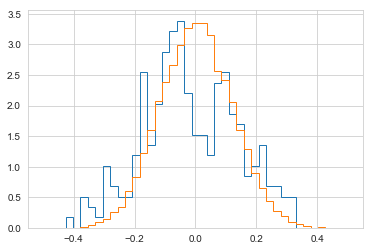

In [185]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m5F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m5F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


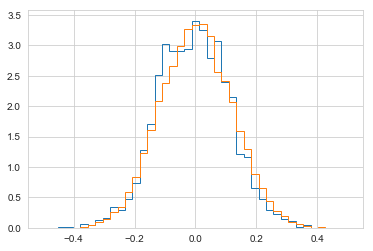

In [186]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
plt.hist(pos_bursts_m5F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m5F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


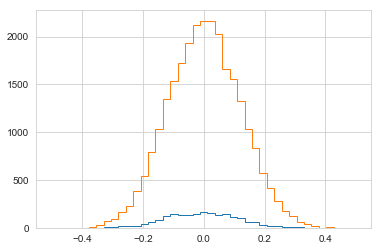

In [187]:
# the magnitude of molecule position histograms of impure versus pure single-molecule bursts - basic burst analysis parameters
plt.hist(pos_bursts_m5F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m5F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


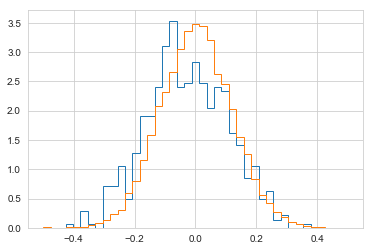

In [188]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m20F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


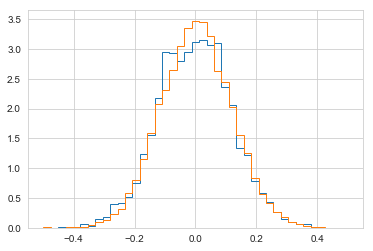

In [189]:
# Comparing the shapes of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
plt.hist(pos_bursts_m20F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


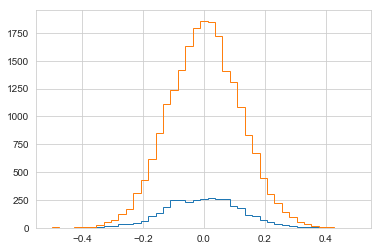

In [190]:
# the magnitude of molecule position histograms of impure versus pure single-molecule bursts - stringent burst analysis parameters
plt.hist(pos_bursts_m20F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m20F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


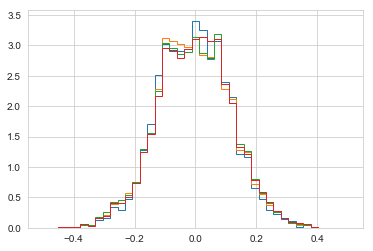

In [191]:
# Comparing the shapes of molecule position distributions of impure bursts - different m values
plt.hist(pos_bursts_m5F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m15F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [192]:
# Mean molecule position - impure bursts
test1 = pos_bursts_m5F6_notsingle[~np.isnan(pos_bursts_m5F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test3 = pos_bursts_m15F6_notsingle[~np.isnan(pos_bursts_m15F6_notsingle).any(axis=1)]
test4 = pos_bursts_m20F6_notsingle[~np.isnan(pos_bursts_m20F6_notsingle).any(axis=1)]
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.00633548, -0.0063110357, -0.005000582, -0.0024698598],
 [0.005146461414482996,
  0.0043348955174924274,
  0.0042117562218761465,
  0.004009958992225413])

In [193]:
# standard deviation of molecule position - impure bursts
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11620673, 0.11977204, 0.12164679, 0.12042513],
 [0.0018555705796370432,
  0.0015632786392979052,
  0.0015189244801007617,
  0.0014461894730643198])

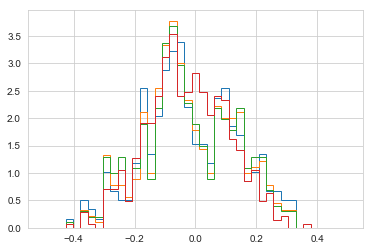

In [194]:
# Comparing the shapes of molecule position distributions of photons from impure bursts - different m values
if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m5F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m15F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m20F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [195]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m5F6_notsingle_focus[~np.isnan(pos_bursts_m5F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m15F6_notsingle_focus[~np.isnan(pos_bursts_m15F6_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0:
    test4 = pos_bursts_m20F6_notsingle_focus[~np.isnan(pos_bursts_m20F6_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test4 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([-0.017008677, -0.020102043, -0.020102043, -0.020102043],
 [0.01951813147575209,
  0.015306806687516973,
  0.015306806687516973,
  0.015306806687516973])

In [196]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.1538198, 0.14932403, 0.14932403, 0.14932403],
 [0.007006299876225644,
  0.005504156759387683,
  0.005504156759387683,
  0.005504156759387683])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


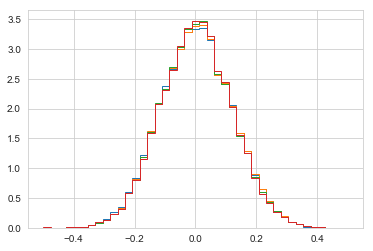

In [197]:
# Comparing the shapes of molecule position distributions of pure bursts - different m values
plt.hist(pos_bursts_m5F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m15F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m20F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [198]:
# Mean molecule position - pure bursts
test1 = pos_bursts_m5F6_single[~np.isnan(pos_bursts_m5F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test3 = pos_bursts_m15F6_single[~np.isnan(pos_bursts_m15F6_single).any(axis=1)]
test4 = pos_bursts_m20F6_single[~np.isnan(pos_bursts_m20F6_single).any(axis=1)]
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.0019690767, 0.0031863223, 0.002177313, 0.0020639552],
 [0.0014259125200674896,
  0.0014718428670304608,
  0.0015023583574923381,
  0.0015484477632953786])

In [199]:
# Standard deviation of molecule position - pure bursts
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11836811, 0.11814247, 0.117372185, 0.117039345],
 [0.000514410635174742,
  0.0005309787371706429,
  0.00054198594989023,
  0.0005586110422740812])

In [200]:
# Mean molecule position - all bursts
test1 = pos_bursts_m5F6[~np.isnan(pos_bursts_m5F6).any(axis=1)]
test2 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test3 = pos_bursts_m15F6[~np.isnan(pos_bursts_m15F6).any(axis=1)]
test4 = pos_bursts_m20F6[~np.isnan(pos_bursts_m20F6).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.0013961071, 0.002179307, 0.0013135315, 0.0014453675],
 [0.0013743362146674393,
  0.001394089548022571,
  0.0014156046480567927,
  0.00144480294412009])

In [201]:
# Standard deviation of molecule position - all bursts
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11823898, 0.11835244, 0.11791792, 0.11751735],
 [0.0004958055877199339,
  0.0005029312172630885,
  0.0005106921326518788,
  0.0005212245404354062])

#### different F values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


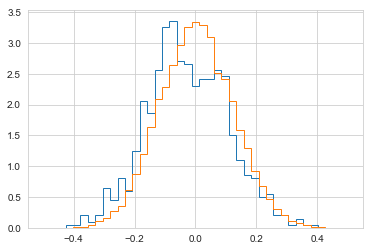

In [202]:
if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F3_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F3_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


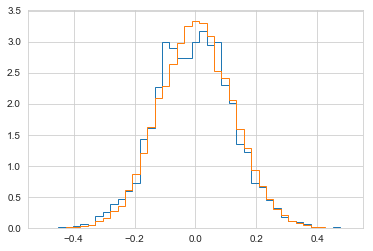

In [203]:
plt.hist(pos_bursts_m10F3_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F3_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


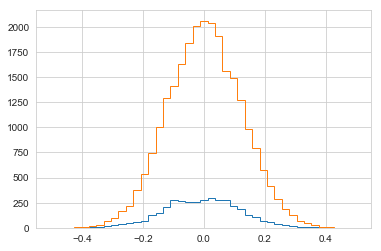

In [204]:
plt.hist(pos_bursts_m10F3_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F3_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


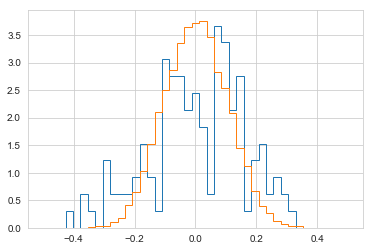

In [205]:
if np.shape(pos_bursts_m10F21_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F21_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


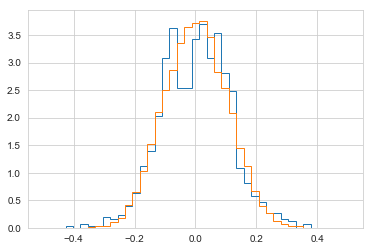

In [206]:
plt.hist(pos_bursts_m10F21_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


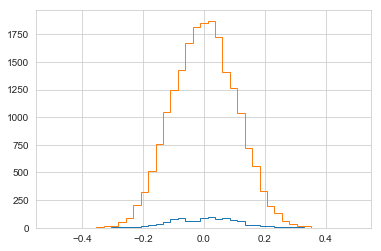

In [207]:
plt.hist(pos_bursts_m10F21_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F21_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

In [208]:
plt.hist(pos_bursts_m10F3_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F11_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F16_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [209]:
test1 = pos_bursts_m10F3_notsingle[~np.isnan(pos_bursts_m10F3_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test3 = pos_bursts_m10F11_notsingle[~np.isnan(pos_bursts_m10F11_notsingle).any(axis=1)]
test4 = pos_bursts_m10F16_notsingle[~np.isnan(pos_bursts_m10F16_notsingle).any(axis=1)]
test5 = pos_bursts_m10F21_notsingle[~np.isnan(pos_bursts_m10F21_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.0047156485, -0.0063110357, -0.00053317525, -0.0021082193, 0.00078067166],
 [0.0039429302619501325,
  0.0043348955174924274,
  0.005635596611671715,
  0.006324625841556101,
  0.006764889909842377])

In [210]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.12371081, 0.11977204, 0.11456703, 0.11310676, 0.11182027],
 [0.0014220572890937123,
  0.0015632786392979052,
  0.002031636849770621,
  0.0022795258825964787,
  0.002437797800513058])

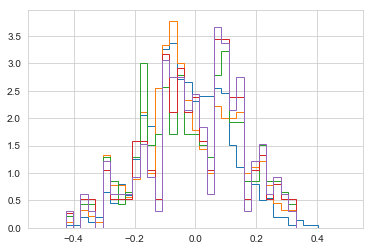

In [211]:
# Comparing the shapes of molecule position distributions of photons from impure bursts - different m values
if np.shape(pos_bursts_m10F3_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F3_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F11_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F11_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F16_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F16_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F21_notsingle_focus)[0]>0: plt.hist(pos_bursts_m10F21_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);


In [212]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F3_notsingle_focus[~np.isnan(pos_bursts_m10F3_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F11_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F11_notsingle_focus[~np.isnan(pos_bursts_m10F11_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F16_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F16_notsingle_focus[~np.isnan(pos_bursts_m10F16_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F21_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F21_notsingle_focus[~np.isnan(pos_bursts_m10F21_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([-0.026323473, -0.020102043, -0.011395025, -0.0014769769, 0.0026085323],
 [0.009121464268230343,
  0.015306806687516973,
  0.022981951661128597,
  0.024747751801987287,
  0.026714454020728418])

In [213]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F11_notsingle_focus)[0] > 0:
    temp_dataset = test3[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F16_notsingle_focus)[0] > 0:
    temp_dataset = test4[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F21_notsingle_focus)[0] > 0:
    temp_dataset = test5[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.15575942, 0.11977204, 0.11456703, 0.11310676, 0.11182027],
 [0.009550223033224569,
  0.0015632786392979052,
  0.002031636849770621,
  0.0022795258825964787,
  0.002437797800513058])

In [214]:
plt.hist(pos_bursts_m10F3_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F11_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F16_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F21_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [215]:
test1 = pos_bursts_m10F3_single[~np.isnan(pos_bursts_m10F3_single).any(axis=1)]
test2 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test3 = pos_bursts_m10F11_single[~np.isnan(pos_bursts_m10F11_single).any(axis=1)]
test4 = pos_bursts_m10F16_single[~np.isnan(pos_bursts_m10F16_single).any(axis=1)]
test5 = pos_bursts_m10F21_single[~np.isnan(pos_bursts_m10F21_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.002754662, 0.0031863223, 0.0018479762, 0.00216628, 0.0012301067],
 [0.001490126346833721,
  0.0014718428670304608,
  0.0014177687425730896,
  0.0014153495928383155,
  0.0014178318291250761])

In [216]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.12096996, 0.11814247, 0.11167162, 0.107606106, 0.1033536],
 [0.000537575242883456,
  0.0005309787371706429,
  0.0005114700842466773,
  0.0005105954842226396,
  0.0005114885390423344])

In [217]:
test1 = pos_bursts_m10F3[~np.isnan(pos_bursts_m10F3).any(axis=1)]
test2 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test3 = pos_bursts_m10F11[~np.isnan(pos_bursts_m10F11).any(axis=1)]
test4 = pos_bursts_m10F16[~np.isnan(pos_bursts_m10F16).any(axis=1)]
test5 = pos_bursts_m10F21[~np.isnan(pos_bursts_m10F21).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test5[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.001783175, 0.002179307, 0.0016989844, 0.0019416134, 0.0012080634],
 [0.0013942824487445306,
  0.001394089548022571,
  0.0013749625465583036,
  0.0013814915998500263,
  0.001388389935654356])

In [218]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test5[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.12135591, 0.11835244, 0.111856475, 0.107906416, 0.103785016],
 [0.0005030018765994833,
  0.0005029312172630885,
  0.0004960290499526154,
  0.0004983824388866074,
  0.000500868666695042])

#### different size threshold values

In [219]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


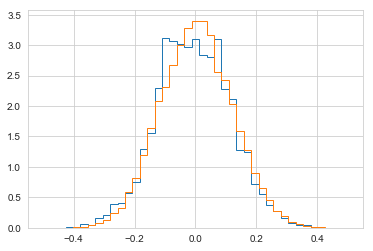

In [220]:
plt.hist(pos_bursts_m10F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


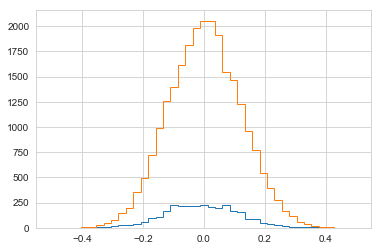

In [221]:
plt.hist(pos_bursts_m10F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


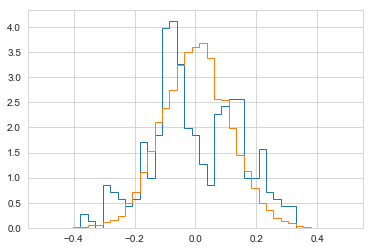

In [222]:
if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz40_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


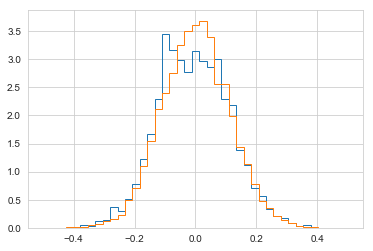

In [223]:
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


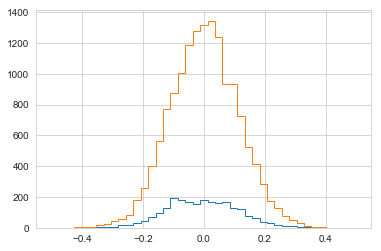

In [224]:
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_sz40_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

In [225]:
plt.hist(pos_bursts_m10F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz20_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz80_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [226]:
test1 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_sz20_notsingle[~np.isnan(pos_bursts_m10F6_sz20_notsingle).any(axis=1)]
test3 = pos_bursts_m10F6_sz40_notsingle[~np.isnan(pos_bursts_m10F6_sz40_notsingle).any(axis=1)]
test4 = pos_bursts_m10F6_sz80_notsingle[~np.isnan(pos_bursts_m10F6_sz80_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.0063110357, -0.0053199045, -0.005630619, -0.0038246487],
 [0.0043348955174924274,
  0.004372044813535005,
  0.004762938853633018,
  0.005328572281288673])

In [227]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11977204, 0.11893039, 0.11696356, 0.110587664],
 [0.0015632786392979052,
  0.0015766551619601121,
  0.0017174543345316198,
  0.0019210135672101968])

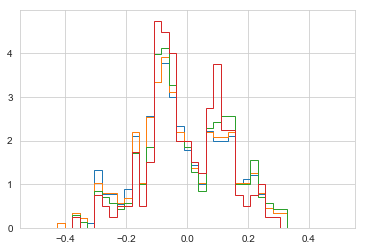

In [228]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz20_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz40_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_sz80_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [229]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_sz20_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz20_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m10F6_sz40_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz40_notsingle_focus).any(axis=1)]
    temp_dataset = test3[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0:
    test4 = pos_bursts_m10F6_sz80_notsingle_focus[~np.isnan(pos_bursts_m10F6_sz80_notsingle_focus).any(axis=1)]
    temp_dataset = test4[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test4 = []
    tmp.append(-10000)
    tmperr.append(-10000)

tmp, tmperr

([-0.020102043, -0.0164449, -0.0011603303, -0.006322471],
 [0.015306806687516973,
  0.015437544724535866,
  0.01672174006557498,
  0.019564433934044185])

In [230]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0:
    temp_dataset = test3[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0:
    temp_dataset = test4[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

    
tmp, tmperr

([0.14932403, 0.14789762, 0.14392594, 0.12649593],
 [0.005504156759387683,
  0.005550498623331331,
  0.006007352460014439,
  0.007005961460702354])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


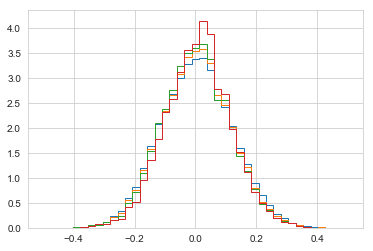

In [231]:
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz20_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz40_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_sz80_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [232]:
test1 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_sz20_single[~np.isnan(pos_bursts_m10F6_sz20_single).any(axis=1)]
test3 = pos_bursts_m10F6_sz40_single[~np.isnan(pos_bursts_m10F6_sz40_single).any(axis=1)]
test4 = pos_bursts_m10F6_sz80_single[~np.isnan(pos_bursts_m10F6_sz80_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.0031863223, 0.0017378796, 0.0012903976, 0.0077870977],
 [0.0014718428670304608,
  0.0015417009870333366,
  0.001776564722476162,
  0.0024285641039717316])

In [233]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11814247, 0.113933235, 0.11082747, 0.10649352],
 [0.0005309787371706429,
  0.0005561756758273477,
  0.0006408889307139436,
  0.0008760226637552077])

In [234]:
test1 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test2 = pos_bursts_m10F6_sz20[~np.isnan(pos_bursts_m10F6_sz20).any(axis=1)]
test3 = pos_bursts_m10F6_sz40[~np.isnan(pos_bursts_m10F6_sz40).any(axis=1)]
test4 = pos_bursts_m10F6_sz80[~np.isnan(pos_bursts_m10F6_sz80).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test4[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position

tmp, tmperr

([0.002179307, 0.0008949383, 0.00036081066, 0.005659305],
 [0.001394089548022571, 0.0014547087042642278, 0.0016658868070194956])

In [235]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test4[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11835244, 0.114564404, 0.11169617, 0.10734948],
 [0.0005029312172630885,
  0.0005247964712369032,
  0.0006009688536005922,
  0.0007980546690513066])

#### different width threshold values

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


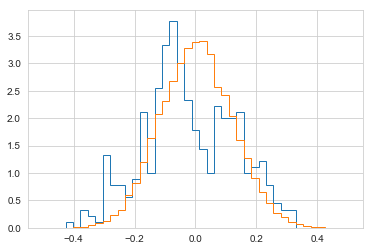

In [236]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


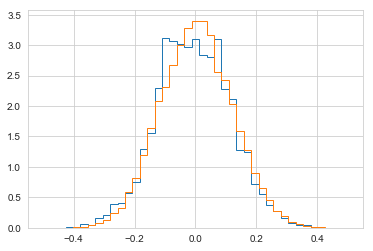

In [237]:
plt.hist(pos_bursts_m10F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


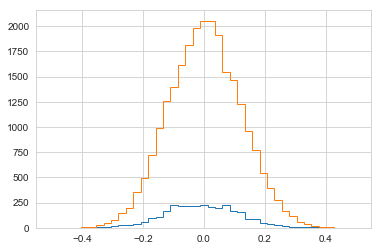

In [238]:
plt.hist(pos_bursts_m10F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


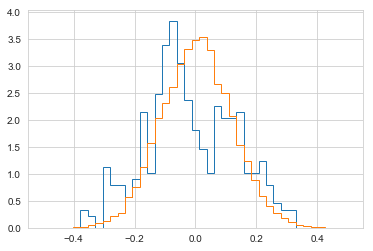

In [239]:
if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w1_0_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


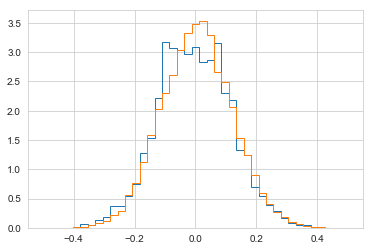

In [240]:
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


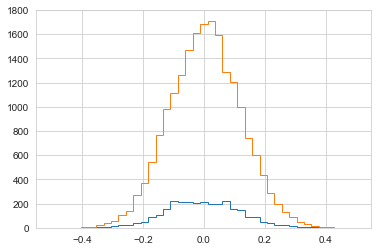

In [241]:
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);
plt.hist(pos_bursts_m10F6_w1_0_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=False);

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


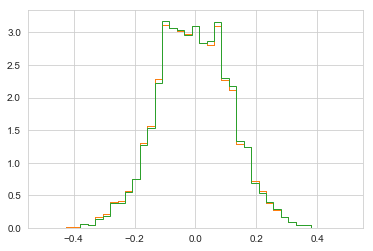

In [242]:
plt.hist(pos_bursts_m10F6_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w0_5_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_notsingle[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [243]:
test1 = pos_bursts_m10F6_notsingle[~np.isnan(pos_bursts_m10F6_notsingle).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5_notsingle[~np.isnan(pos_bursts_m10F6_w0_5_notsingle).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0_notsingle[~np.isnan(pos_bursts_m10F6_w1_0_notsingle).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([-0.0063110357, -0.0063110357, -0.0044354177],
 [0.0043348955174924274, 0.0043348955174924274, 0.00436579985347026])

In [244]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11977204, 0.11977204, 0.118572354],
 [0.0015632786392979052, 0.0015632786392979052, 0.001574400909646634])

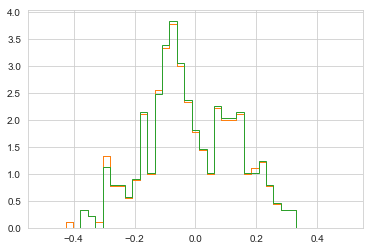

In [245]:
if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w0_5_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0: plt.hist(pos_bursts_m10F6_w1_0_notsingle_focus[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);

In [246]:
# Mean molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    test1 = pos_bursts_m10F6_notsingle_focus[~np.isnan(pos_bursts_m10F6_notsingle_focus).any(axis=1)]
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test1 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0:
    test2 = pos_bursts_m10F6_w0_5_notsingle_focus[~np.isnan(pos_bursts_m10F6_w0_5_notsingle_focus).any(axis=1)]
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test2 = []
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0:
    test3 = pos_bursts_m10F6_w1_0_notsingle_focus[~np.isnan(pos_bursts_m10F6_w1_0_notsingle_focus).any(axis=1)]
    temp_dataset = test3[:,1]*1e6
    tmp.append(np.mean(temp_dataset))
    a = np.array(temp_dataset)
    test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
    tmperr.append(np.mean(temp_dataset) - test[0])
else:
    test3 = []
    tmp.append(-10000)
    tmperr.append(-10000)


tmp, tmperr

([-0.020102043, -0.020102043, -0.016961811],
 [0.015306806687516973, 0.015306806687516973, 0.015126294749629225])

In [247]:
# standard deviation of molecule position - photons from molecules other than the main ones in impure bursts
tmp = []
tmperr = []

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0:
    temp_dataset = test1[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)

if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0:
    temp_dataset = test2[:,1]*1e6
    tmp.append(np.std(temp_dataset)) # the standard deviation
    tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
else:
    tmp.append(-10000)
    tmperr.append(-10000)


    
tmp, tmperr

([0.14932403, 0.14932403, 0.14932403],
 [0.005504156759387683, 0.005504156759387683, 0.005504156759387683])

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


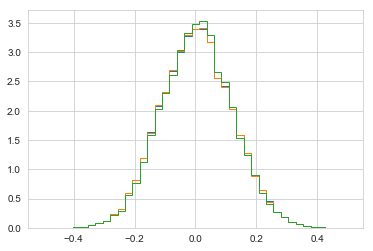

In [248]:
plt.hist(pos_bursts_m10F6_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w0_5_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);
plt.hist(pos_bursts_m10F6_w1_0_single[:,1]*1e6, range=(-0.5,0.5), bins=41, orientation='vertical', histtype='step', density=True);


In [249]:
test1 = pos_bursts_m10F6_single[~np.isnan(pos_bursts_m10F6_single).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5_single[~np.isnan(pos_bursts_m10F6_w0_5_single).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0_single[~np.isnan(pos_bursts_m10F6_w1_0_single).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.0031863223, 0.0028704072, 0.004205447],
 [0.0014718428670304608, 0.0014777135342844386, 0.0016150221633797878])

In [250]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11814247, 0.117981814, 0.1160345],
 [0.0005309787371706429, 0.0005330963123234993, 0.0005826246856305255])

In [251]:
test1 = pos_bursts_m10F6[~np.isnan(pos_bursts_m10F6).any(axis=1)]
test2 = pos_bursts_m10F6_w0_5[~np.isnan(pos_bursts_m10F6_w0_5).any(axis=1)]
test3 = pos_bursts_m10F6_w1_0[~np.isnan(pos_bursts_m10F6_w1_0).any(axis=1)]

tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test2[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])
temp_dataset = test3[:,1]*1e6
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp, tmperr

([0.002179307, 0.0018875544, 0.0031241004],
 [0.001394089548022571, 0.0013990589045008905, 0.0015152060179605097])

In [252]:
tmp = []
tmperr = []
temp_dataset = test1[:,1]*1e6
tmp.append(np.std(temp_dataset)) # the standard deviation
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2)) # The uncertainty of the standard deviation
temp_dataset = test2[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))
temp_dataset = test3[:,1]*1e6
tmp.append(np.std(temp_dataset))
tmperr.append(np.std(temp_dataset)/np.sqrt(2 * np.size(temp_dataset) - 2))

tmp, tmperr

([0.11835244, 0.11820885, 0.11639024],
 [0.0005029312172630885, 0.0005047237615398784, 0.0005466198472790767])

## Joint figure

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


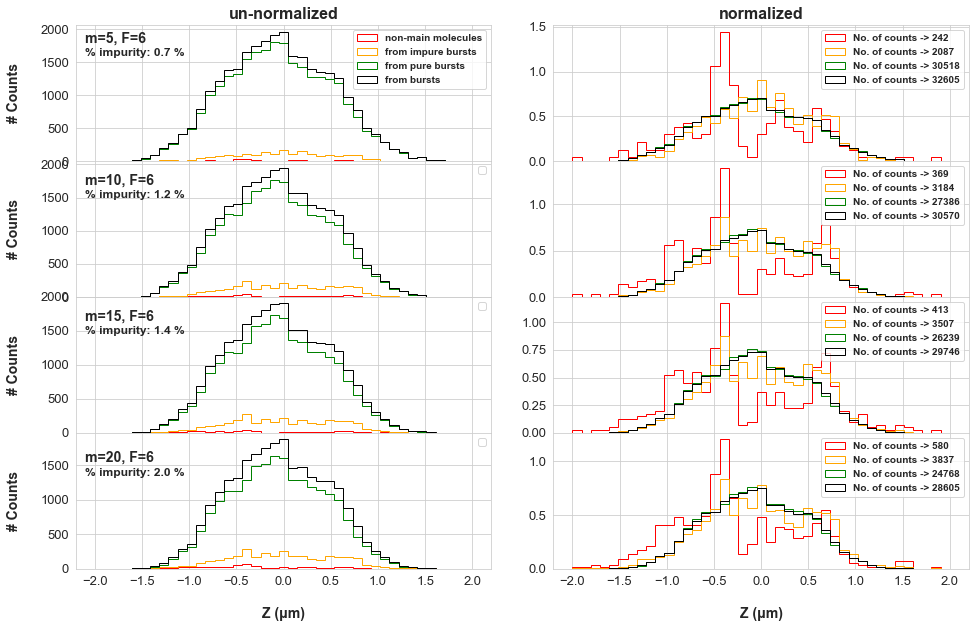

In [263]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)
legend_properties = {'weight':'bold'}

cols = 2
rows = 4

fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(4 * rows, 5 * cols), tight_layout=False)

plt.subplots_adjust(wspace=0.15, hspace=0)

if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0: ax[0,0].hist(pos_bursts_m5F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r', label='non-main molecules');
ax[0,0].hist(pos_bursts_m5F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange', label='from impure bursts');
ax[0,0].hist(pos_bursts_m5F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g', label='from pure bursts');
ax[0,0].hist(pos_bursts_m5F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k', label='from bursts');
ax[0,0].legend(fontsize=12, prop=legend_properties)
ax[0,0].text(-2.1, 1800, 'm=5, F=6', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m5F6_notsingle_focus[:,2])/np.size(pos_bursts_m5F6[:,2])*100,1)
ax[0,0].text(-2.1, 1600, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[0,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,0].tick_params(axis='both', which='both', labelsize=13)
ax[0,0].set_title('un-normalized', fontsize=16, fontweight='bold')


if np.shape(pos_bursts_m5F6_notsingle_focus)[0] > 0: ax[0,1].hist(pos_bursts_m5F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m5F6_notsingle_focus[:,2])));
ax[0,1].hist(pos_bursts_m5F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m5F6_notsingle[:,2])));
ax[0,1].hist(pos_bursts_m5F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m5F6_single[:,2])));
ax[0,1].hist(pos_bursts_m5F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m5F6[:,2])));
ax[0,1].legend(fontsize=12, prop=legend_properties)
#ax[0,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,1].tick_params(axis='both', which='both', labelsize=13)
ax[0,1].set_title('normalized', fontsize=16, fontweight='bold')


if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: ax[1,0].hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[1,0].hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[1,0].hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[1,0].hist(pos_bursts_m10F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[1,0].legend(fontsize=12, prop=legend_properties)
ax[1,0].text(-2.1, 1700, 'm=10, F=6', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_notsingle_focus[:,2])/np.size(pos_bursts_m10F6[:,2])*100,1)
ax[1,0].text(-2.1, 1500, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[1,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[1,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: ax[1,1].hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_notsingle_focus[:,2])));
ax[1,1].hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_notsingle[:,2])));
ax[1,1].hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_single[:,2])));
ax[1,1].hist(pos_bursts_m10F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6[:,2])));
ax[1,1].legend(fontsize=12, prop=legend_properties)
#ax[1,1].text(-2, 1, 'F=6', fontsize=14, fontweight='bold')
#ax[1,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[1,1].tick_params(axis='both', which='both', labelsize=13)

if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0: ax[2,0].hist(pos_bursts_m15F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[2,0].hist(pos_bursts_m15F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[2,0].hist(pos_bursts_m15F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[2,0].hist(pos_bursts_m15F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[2,0].legend(fontsize=12, prop=legend_properties)
ax[2,0].text(-2.1, 1650, 'm=15, F=6', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m15F6_notsingle_focus[:,2])/np.size(pos_bursts_m15F6[:,2])*100,1)
ax[2,0].text(-2.1, 1450, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[2,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[2,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m15F6_notsingle_focus)[0] > 0: ax[2,1].hist(pos_bursts_m15F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m15F6_notsingle_focus[:,2])));
ax[2,1].hist(pos_bursts_m15F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m15F6_notsingle[:,2])));
ax[2,1].hist(pos_bursts_m15F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m15F6_single[:,2])));
ax[2,1].hist(pos_bursts_m15F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m15F6[:,2])));
ax[2,1].legend(fontsize=12, prop=legend_properties)
#ax[2,1].text(-2, 1, 'F=6', fontsize=14, fontweight='bold')
#ax[2,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[2,1].tick_params(axis='both', which='both', labelsize=13)

if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0: ax[3,0].hist(pos_bursts_m20F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[3,0].hist(pos_bursts_m20F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[3,0].hist(pos_bursts_m20F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[3,0].hist(pos_bursts_m20F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[3,0].legend(fontsize=12, prop=legend_properties)
ax[3,0].text(-2.1, 1550, 'm=20, F=6', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m20F6_notsingle_focus[:,2])/np.size(pos_bursts_m20F6[:,2])*100,1)
ax[3,0].text(-2.1, 1350, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[3,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[3,0].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[3,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m20F6_notsingle_focus)[0] > 0: ax[3,1].hist(pos_bursts_m20F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m20F6_notsingle_focus[:,2])));
ax[3,1].hist(pos_bursts_m20F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m20F6_notsingle[:,2])));
ax[3,1].hist(pos_bursts_m20F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m20F6_single[:,2])));
ax[3,1].hist(pos_bursts_m20F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m20F6[:,2])));
ax[3,1].legend(fontsize=12, prop=legend_properties)
#ax[3,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[3,1].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[3,1].tick_params(axis='both', which='both', labelsize=13)

#plt.savefig('molecule_positions_pure_and_impure_bursts_varying_m_C31_D90_psgGauss.png', dpi=600, bbox_inches='tight')

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


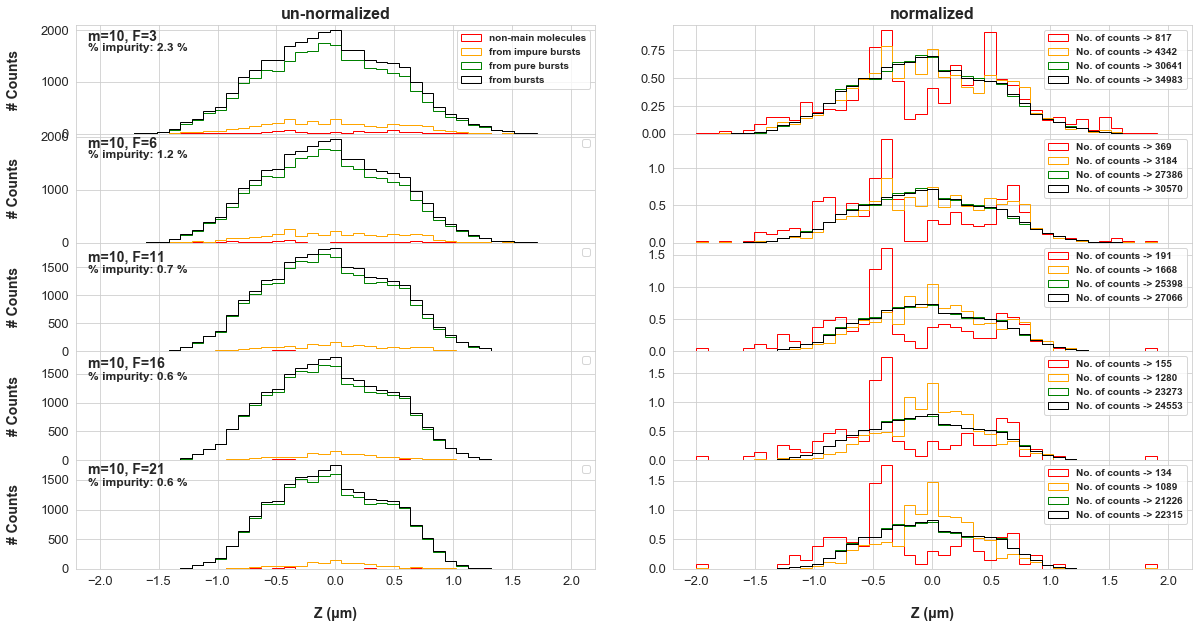

In [262]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)
legend_properties = {'weight':'bold'}

cols = 2
rows = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(4 * rows, 5 * cols), tight_layout=False)

plt.subplots_adjust(wspace=0.15, hspace=0)

if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0: ax[0,0].hist(pos_bursts_m10F3_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r', label='non-main molecules');
ax[0,0].hist(pos_bursts_m10F3_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange', label='from impure bursts');
ax[0,0].hist(pos_bursts_m10F3_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g', label='from pure bursts');
ax[0,0].hist(pos_bursts_m10F3[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k', label='from bursts');
ax[0,0].legend(fontsize=12, prop=legend_properties)
ax[0,0].text(-2.1, 1800, 'm=10, F=3', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F3_notsingle_focus[:,2])/np.size(pos_bursts_m10F3[:,2])*100,1)
ax[0,0].text(-2.1, 1600, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[0,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,0].tick_params(axis='both', which='both', labelsize=13)
ax[0,0].set_title('un-normalized', fontsize=16, fontweight='bold')


if np.shape(pos_bursts_m10F3_notsingle_focus)[0] > 0: ax[0,1].hist(pos_bursts_m10F3_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F3_notsingle_focus[:,2])));
ax[0,1].hist(pos_bursts_m10F3_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F3_notsingle[:,2])));
ax[0,1].hist(pos_bursts_m10F3_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F3_single[:,2])));
ax[0,1].hist(pos_bursts_m10F3[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F3[:,2])));
ax[0,1].legend(fontsize=12, prop=legend_properties)
#ax[0,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,1].tick_params(axis='both', which='both', labelsize=13)
ax[0,1].set_title('normalized', fontsize=16, fontweight='bold')


if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: ax[1,0].hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[1,0].hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[1,0].hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[1,0].hist(pos_bursts_m10F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[1,0].legend(fontsize=12, prop=legend_properties)
ax[1,0].text(-2.1, 1800, 'm=10, F=6', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_notsingle_focus[:,2])/np.size(pos_bursts_m10F6[:,2])*100,1)
ax[1,0].text(-2.1, 1600, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[1,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[1,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: ax[1,1].hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_notsingle_focus[:,2])));
ax[1,1].hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_notsingle[:,2])));
ax[1,1].hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_single[:,2])));
ax[1,1].hist(pos_bursts_m10F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6[:,2])));
ax[1,1].legend(fontsize=12, prop=legend_properties)
#ax[1,1].text(-2, 1, 'F=6', fontsize=14, fontweight='bold')
#ax[1,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[1,1].tick_params(axis='both', which='both', labelsize=13)

if np.shape(pos_bursts_m10F11_notsingle_focus)[0] > 0: ax[2,0].hist(pos_bursts_m10F11_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[2,0].hist(pos_bursts_m10F11_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[2,0].hist(pos_bursts_m10F11_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[2,0].hist(pos_bursts_m10F11[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[2,0].legend(fontsize=12, prop=legend_properties)
ax[2,0].text(-2.1, 1600, 'm=10, F=11', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F11_notsingle_focus[:,2])/np.size(pos_bursts_m10F11[:,2])*100,1)
ax[2,0].text(-2.1, 1400, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[2,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[2,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F11_notsingle_focus)[0] > 0: ax[2,1].hist(pos_bursts_m10F11_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F11_notsingle_focus[:,2])));
ax[2,1].hist(pos_bursts_m10F11_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F11_notsingle[:,2])));
ax[2,1].hist(pos_bursts_m10F11_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F11_single[:,2])));
ax[2,1].hist(pos_bursts_m10F11[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F11[:,2])));
ax[2,1].legend(fontsize=12, prop=legend_properties)
#ax[2,1].text(-2, 1, 'F=6', fontsize=14, fontweight='bold')
#ax[2,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[2,1].tick_params(axis='both', which='both', labelsize=13)

if np.shape(pos_bursts_m10F16_notsingle_focus)[0] > 0: ax[3,0].hist(pos_bursts_m10F16_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[3,0].hist(pos_bursts_m10F16_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[3,0].hist(pos_bursts_m10F16_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[3,0].hist(pos_bursts_m10F16[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[3,0].legend(fontsize=12, prop=legend_properties)
ax[3,0].text(-2.1, 1600, 'm=10, F=16', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F16_notsingle_focus[:,2])/np.size(pos_bursts_m10F16[:,2])*100,1)
ax[3,0].text(-2.1, 1400, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[3,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
#ax[3,0].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[3,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F16_notsingle_focus)[0] > 0: ax[3,1].hist(pos_bursts_m10F16_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F16_notsingle_focus[:,2])));
ax[3,1].hist(pos_bursts_m10F16_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F16_notsingle[:,2])));
ax[3,1].hist(pos_bursts_m10F16_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F16_single[:,2])));
ax[3,1].hist(pos_bursts_m10F16[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F16[:,2])));
ax[3,1].legend(fontsize=12, prop=legend_properties)
#ax[3,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
#ax[3,1].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[3,1].tick_params(axis='both', which='both', labelsize=13)

if np.shape(pos_bursts_m10F21_notsingle_focus)[0] > 0: ax[4,0].hist(pos_bursts_m10F21_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[4,0].hist(pos_bursts_m10F21_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[4,0].hist(pos_bursts_m10F21_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[4,0].hist(pos_bursts_m10F21[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[4,0].legend(fontsize=12, prop=legend_properties)
ax[4,0].text(-2.1, 1600, 'm=10, F=21', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F21_notsingle_focus[:,2])/np.size(pos_bursts_m10F21[:,2])*100,1)
ax[4,0].text(-2.1, 1400, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[4,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[4,0].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[4,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F21_notsingle_focus)[0] > 0: ax[4,1].hist(pos_bursts_m10F21_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F21_notsingle_focus[:,2])));
ax[4,1].hist(pos_bursts_m10F21_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F21_notsingle[:,2])));
ax[4,1].hist(pos_bursts_m10F21_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F21_single[:,2])));
ax[4,1].hist(pos_bursts_m10F21[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F21[:,2])));
ax[4,1].legend(fontsize=12, prop=legend_properties)
#ax[4,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[4,1].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[4,1].tick_params(axis='both', which='both', labelsize=13)

#plt.savefig('molecule_positions_pure_and_impure_bursts_varying_F_C31_D90_psfGauss.png', dpi=600, bbox_inches='tight')

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


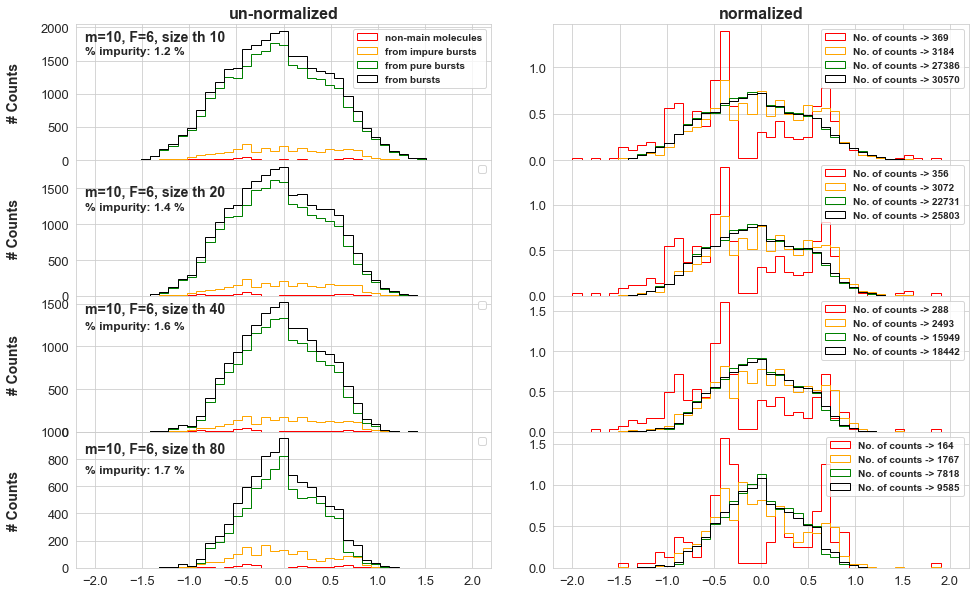

In [267]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)
legend_properties = {'weight':'bold'}

cols = 2
rows = 4

fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(4 * rows, 5 * cols), tight_layout=False)

plt.subplots_adjust(wspace=0.15, hspace=0)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: ax[0,0].hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r', label='non-main molecules');
ax[0,0].hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange', label='from impure bursts');
ax[0,0].hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g', label='from pure bursts');
ax[0,0].hist(pos_bursts_m10F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k', label='from bursts');
ax[0,0].legend(fontsize=12, prop=legend_properties)
ax[0,0].text(-2.1, 1800, 'm=10, F=6, size th 10', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_notsingle_focus[:,2])/np.size(pos_bursts_m10F6[:,2])*100,1)
ax[0,0].text(-2.1, 1600, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[0,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,0].tick_params(axis='both', which='both', labelsize=13)
ax[0,0].set_title('un-normalized', fontsize=16, fontweight='bold')


if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: ax[0,1].hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_notsingle_focus[:,2])));
ax[0,1].hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_notsingle[:,2])));
ax[0,1].hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_single[:,2])));
ax[0,1].hist(pos_bursts_m10F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6[:,2])));
ax[0,1].legend(fontsize=12, prop=legend_properties)
#ax[0,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,1].tick_params(axis='both', which='both', labelsize=13)
ax[0,1].set_title('normalized', fontsize=16, fontweight='bold')


if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0: ax[1,0].hist(pos_bursts_m10F6_sz20_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[1,0].hist(pos_bursts_m10F6_sz20_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[1,0].hist(pos_bursts_m10F6_sz20_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[1,0].hist(pos_bursts_m10F6_sz20[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[1,0].legend(fontsize=12, prop=legend_properties)
ax[1,0].text(-2.1, 1400, 'm=10, F=6, size th 20', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_sz20_notsingle_focus[:,2])/np.size(pos_bursts_m10F6_sz20[:,2])*100,1)
ax[1,0].text(-2.1, 1200, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[1,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[1,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F6_sz20_notsingle_focus)[0] > 0: ax[1,1].hist(pos_bursts_m10F6_sz20_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz20_notsingle_focus[:,2])));
ax[1,1].hist(pos_bursts_m10F6_sz20_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz20_notsingle[:,2])));
ax[1,1].hist(pos_bursts_m10F6_sz20_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz20_single[:,2])));
ax[1,1].hist(pos_bursts_m10F6_sz20[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz20[:,2])));
ax[1,1].legend(fontsize=12, prop=legend_properties)
#ax[1,1].text(-2, 1, 'F=6', fontsize=14, fontweight='bold')
#ax[1,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[1,1].tick_params(axis='both', which='both', labelsize=13)

if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0: ax[2,0].hist(pos_bursts_m10F6_sz40_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[2,0].hist(pos_bursts_m10F6_sz40_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[2,0].hist(pos_bursts_m10F6_sz40_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[2,0].hist(pos_bursts_m10F6_sz40[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[2,0].legend(fontsize=12, prop=legend_properties)
ax[2,0].text(-2.1, 1400, 'm=10, F=6, size th 40', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_sz40_notsingle_focus[:,2])/np.size(pos_bursts_m10F6_sz40[:,2])*100,1)
ax[2,0].text(-2.1, 1200, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[2,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[2,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F6_sz40_notsingle_focus)[0] > 0: ax[2,1].hist(pos_bursts_m10F6_sz40_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz40_notsingle_focus[:,2])));
ax[2,1].hist(pos_bursts_m10F6_sz40_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz40_notsingle[:,2])));
ax[2,1].hist(pos_bursts_m10F6_sz40_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz40_single[:,2])));
ax[2,1].hist(pos_bursts_m10F6_sz40[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz40[:,2])));
ax[2,1].legend(fontsize=12, prop=legend_properties)
#ax[2,1].text(-2, 1, 'F=6', fontsize=14, fontweight='bold')
#ax[2,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[2,1].tick_params(axis='both', which='both', labelsize=13)

if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0: ax[3,0].hist(pos_bursts_m10F6_sz80_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[3,0].hist(pos_bursts_m10F6_sz80_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[3,0].hist(pos_bursts_m10F6_sz80_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[3,0].hist(pos_bursts_m10F6_sz80[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[3,0].legend(fontsize=12, prop=legend_properties)
ax[3,0].text(-2.1, 850, 'm=10, F=6, size th 80', fontsize=14, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_sz80_notsingle_focus[:,2])/np.size(pos_bursts_m10F6_sz80[:,2])*100,1)
ax[3,0].text(-2.1, 700, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[3,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
#ax[3,0].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[3,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F6_sz80_notsingle_focus)[0] > 0: ax[3,1].hist(pos_bursts_m10F6_sz80_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz80_notsingle_focus[:,2])));
ax[3,1].hist(pos_bursts_m10F6_sz80_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz80_notsingle[:,2])));
ax[3,1].hist(pos_bursts_m10F6_sz80_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz80_single[:,2])));
ax[3,1].hist(pos_bursts_m10F6_sz80[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_sz80[:,2])));
ax[3,1].legend(fontsize=12, prop=legend_properties)
#ax[3,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
#ax[3,1].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[3,1].tick_params(axis='both', which='both', labelsize=13)

#plt.savefig('molecule_positions_pure_and_impure_bursts_varying_sz_C31_D90_psfGauss.png', dpi=600, bbox_inches='tight')

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


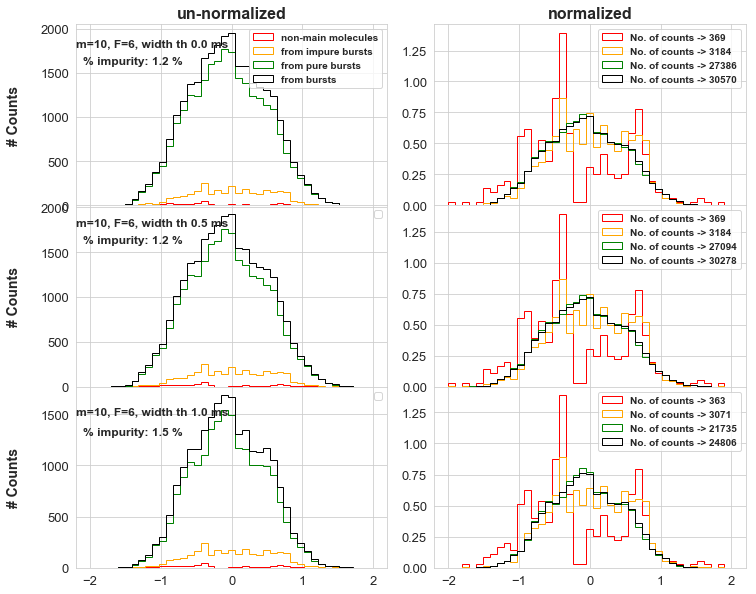

In [270]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)
legend_properties = {'weight':'bold'}

cols = 2
rows = 3

fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(4 * rows, 5 * cols), tight_layout=False)

plt.subplots_adjust(wspace=0.15, hspace=0)

if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: ax[0,0].hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r', label='non-main molecules');
ax[0,0].hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange', label='from impure bursts');
ax[0,0].hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g', label='from pure bursts');
ax[0,0].hist(pos_bursts_m10F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k', label='from bursts');
ax[0,0].legend(fontsize=12, prop=legend_properties)
ax[0,0].text(-2.2, 1800, 'm=10, F=6, width th 0.0 ms', fontsize=12, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_notsingle_focus[:,2])/np.size(pos_bursts_m10F6[:,2])*100,1)
ax[0,0].text(-2.1, 1600, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[0,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,0].tick_params(axis='both', which='both', labelsize=13)
ax[0,0].set_title('un-normalized', fontsize=16, fontweight='bold')


if np.shape(pos_bursts_m10F6_notsingle_focus)[0] > 0: ax[0,1].hist(pos_bursts_m10F6_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_notsingle_focus[:,2])));
ax[0,1].hist(pos_bursts_m10F6_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_notsingle[:,2])));
ax[0,1].hist(pos_bursts_m10F6_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_single[:,2])));
ax[0,1].hist(pos_bursts_m10F6[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6[:,2])));
ax[0,1].legend(fontsize=12, prop=legend_properties)
#ax[0,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,1].tick_params(axis='both', which='both', labelsize=13)
ax[0,1].set_title('normalized', fontsize=16, fontweight='bold')


if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0: ax[1,0].hist(pos_bursts_m10F6_w0_5_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[1,0].hist(pos_bursts_m10F6_w0_5_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[1,0].hist(pos_bursts_m10F6_w0_5_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[1,0].hist(pos_bursts_m10F6_w0_5[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[1,0].legend(fontsize=12, prop=legend_properties)
ax[1,0].text(-2.2, 1800, 'm=10, F=6, width th 0.5 ms', fontsize=12, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_w0_5_notsingle_focus[:,2])/np.size(pos_bursts_m10F6_w0_5[:,2])*100,1)
ax[1,0].text(-2.1, 1600, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[1,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[1,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F6_w0_5_notsingle_focus)[0] > 0: ax[1,1].hist(pos_bursts_m10F6_w0_5_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_w0_5_notsingle_focus[:,2])));
ax[1,1].hist(pos_bursts_m10F6_w0_5_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_w0_5_notsingle[:,2])));
ax[1,1].hist(pos_bursts_m10F6_w0_5_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_w0_5_single[:,2])));
ax[1,1].hist(pos_bursts_m10F6_w0_5[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_w0_5[:,2])));
ax[1,1].legend(fontsize=12, prop=legend_properties)
#ax[1,1].text(-2, 1, 'F=6', fontsize=14, fontweight='bold')
#ax[1,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[1,1].tick_params(axis='both', which='both', labelsize=13)

if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0: ax[2,0].hist(pos_bursts_m10F6_w1_0_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='r');
ax[2,0].hist(pos_bursts_m10F6_w1_0_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='orange');
ax[2,0].hist(pos_bursts_m10F6_w1_0_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='g');
ax[2,0].hist(pos_bursts_m10F6_w1_0[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=False, color='k');
ax[2,0].legend(fontsize=12, prop=legend_properties)
ax[2,0].text(-2.2, 1500, 'm=10, F=6, width th 1.0 ms', fontsize=12, fontweight='bold')
num = np.round(np.size(pos_bursts_m10F6_w1_0_notsingle_focus[:,2])/np.size(pos_bursts_m10F6_w1_0[:,2])*100,1)
ax[2,0].text(-2.1, 1300, '% impurity: ' + np.str(num) + ' %', fontsize=12, fontweight='bold')
ax[2,0].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
#ax[2,0].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[2,0].tick_params(axis='both', which='both', labelsize=13)


if np.shape(pos_bursts_m10F6_w1_0_notsingle_focus)[0] > 0: ax[2,1].hist(pos_bursts_m10F6_w1_0_notsingle_focus[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='r', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_w1_0_notsingle_focus[:,2])));
ax[2,1].hist(pos_bursts_m10F6_w1_0_notsingle[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='orange', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_w1_0_notsingle[:,2])));
ax[2,1].hist(pos_bursts_m10F6_w1_0_single[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='g', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_w1_0_single[:,2])));
ax[2,1].hist(pos_bursts_m10F6_w1_0[:,2]*1e6, range=(-2,2), bins=41, orientation='vertical', histtype='step', density=True, color='k', label='No. of counts -> ' + np.str(np.size(pos_bursts_m10F6_w1_0[:,2])));
ax[2,1].legend(fontsize=12, prop=legend_properties)
#ax[2,1].set_ylabel('# Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
#ax[2,1].set_xlabel('Z (μm)', rotation=0, labelpad=19, fontsize=14, fontweight='bold')
ax[2,1].tick_params(axis='both', which='both', labelsize=13)

#plt.savefig('molecule_positions_pure_and_impure_bursts_varying_w_C31_D90_psfGauss.png', dpi=600, bbox_inches='tight')

# PSF array
The shape of the simulated PSF

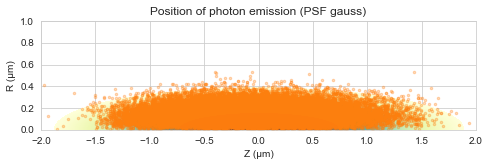

In [271]:
if S.psf.kind == 'numeric':
    PSF = pbm.NumericPSF()
    psf = PSF.hdata
    z_peak = PSF.zi[PSF.zm]  # z position of PSF peak in μm
else:
    x = np.arange(0, 4, 0.01) * 1e-6
    z = np.arange(-6, 6, 0.01) * 1e-6
    X, Z = np.meshgrid(x, z)
    psf = S.psf.eval_xz(X, Z)
cmap = plt.cm.YlGnBu
cmap.set_under(alpha=0)
kwargs = dict(interpolation='bicubic', origin='lower', cmap=cmap, vmin=1e-1, zorder=1)

fig, ax = plt.subplots(figsize=(8, 2))
ax.imshow(psf.T, extent=(-6, 6, 0, 4), **kwargs)
ax.plot(burstph_m5F6.z_um, burstph_m5F6.r_um, '.', ms=5, color='C1', alpha=0.3)
ax.set(ylabel='R (μm)', xlabel='Z (μm)', ylim=(0, 1), xlim=(-2, 2),
       title=f'Position of photon emission (PSF {S.psf.kind})');

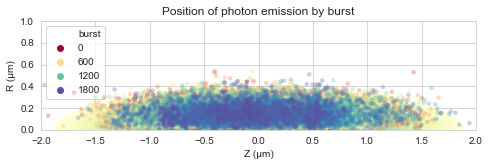

In [272]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.imshow(psf.T, extent=(-6, 6, 0, 4), **kwargs)
sns.scatterplot(x="z_um", y="r_um", hue="burst", data=burstph_m5F6.reset_index(),
                zorder=10, ax=ax, marker='o', linewidth=0,
                palette='Spectral', alpha=0.3, s=20)
if S.psf.kind == 'numeric':
    ax.axvline(PSF.zi[PSF.zm], color='k')
ax.set(ylabel='R (μm)', xlabel='Z (μm)', ylim=(0, 1), xlim=(-2, 2),
       title='Position of photon emission by burst');

In [273]:
#PSF = pbm.NumericPSF()
#psf = PSF.hdata
#z_peak = PSF.zi[PSF.zm]  # z position of PSF peak in μm
#z_peak

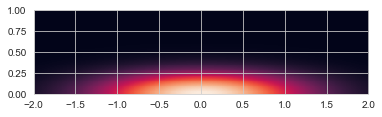

In [274]:
plt.imshow(psf.T, extent=(-6, 6, 0, 4), origin='lower');
plt.xlim(-2, 2); plt.ylim(0, 1);

In [275]:
psf2 = np.zeros((psf.shape[0], 2 * psf.shape[1] - 1))
center = psf.shape[1] - 1
psf2[:, center:] = psf
psf2[:, :center] = psf[:, :0:-1]
assert psf2[psf[:, 0].argmax(), center] == 1

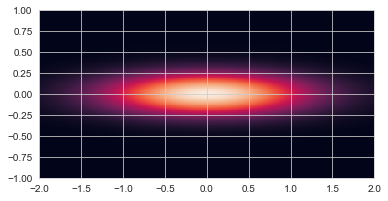

In [276]:
plt.imshow(psf2.T, extent=(-6, 6, -4, 4));
plt.xlim(-2, 2); plt.ylim(-1, 1);

In [277]:
center = psf.shape[1] - 1
index_z_peak = psf[:, 0].argmax()
psf_line = psf[index_z_peak, :]
xy_size = 2 * psf_line.size - 1

psf_xy = np.zeros((xy_size, xy_size))
# this for loop covers one quadrant (i.e. positive X and Y)
for i in range(0, psf.shape[1]):
    psf_xy[center + i, center:] = psf_line[i] * psf_line
# Mirror both X and Y to cover the 4 quadrands
psf_xy[:center] = psf_xy[:center:-1]
psf_xy[:, :center] = psf_xy[:, :center:-1]
assert psf_xy[center, center] == 1

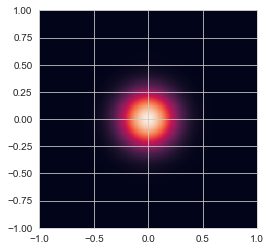

In [278]:
plt.imshow(psf_xy, extent=(-4, 4, -4, 4));
plt.xlim(-1, 1); plt.ylim(-1, 1);

### Plots of the molecule positions when emitted photons of bursts that were identified and selected by the burst search

#### Basic burst analysis parameter values

In [279]:
test = burstph_m5F6.reset_index()
test_x_m5F6 = test['x_um'].tolist()
test_y_m5F6 = test['y_um'].tolist()
test_z_m5F6 = test['z_um'].tolist()

In [281]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)

fig, ax = plt.subplots(nrows=6, ncols=2, sharex=False, sharey=False, figsize=(12, 18), tight_layout=False)

plt.subplots_adjust(wspace=0.18, hspace=0.25)

ax[0,0].hist(test_z_m5F6, range=(-2,2), bins=41, orientation='vertical', edgecolor='k', linewidth=1)
#ax[0,0].set(ylabel='# Counts', xlabel='Z (μm)');

ax[0,0].set_ylabel('# Counts', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[0,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[0,0].tick_params(axis='both', which='both', labelsize=13)

ax[0,0].set_xlim(-2,2)

sns.scatterplot(x="z_um", y="y_um", hue="burst", data=burstph_m5F6.reset_index(),
                zorder=1, ax=ax[1,0], marker='o', linewidth=0,
                palette='Spectral', alpha=0.3, s=10)
im = ax[1,0].contour(psf2.T, extent=(-6, 6, -4, 4), linewidths=2, **kwargs)
if S.psf.kind == 'numeric':
    ax[1,0].axvline(PSF.zi[PSF.zm], color='k', ls='--')
#ax[1,0].set(ylabel='Y (μm)', xlabel='Z (μm)');

ax[1,0].set_ylabel('Y (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[1,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[1,0].tick_params(axis='both', which='both', labelsize=13)

ax[1,0].set_xlim(-2,2)
ax[1,0].set_ylim(-1,1)

ax[1,1].hist(test_y_m5F6, range=(-1,1), bins=21, orientation='horizontal', edgecolor='k', linewidth=1)
#ax[1,1].set(ylabel='Y (μm)', xlabel='# Counts');

ax[1,1].set_ylabel('Y (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[1,1].set_xlabel('# Counts', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[1,1].tick_params(axis='both', which='both', labelsize=13)

ax[1,1].set_ylim(-1,1)

ax[0,1].set_visible(False)



ax[2,0].hist(test_z_m5F6, range=(-2,2), bins=41, orientation='vertical', edgecolor='k', linewidth=1)
#ax[2,0].set(ylabel='# Counts', xlabel='Z (μm)');

ax[2,0].set_ylabel('# Counts', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[2,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[2,0].tick_params(axis='both', which='both', labelsize=13)

ax[2,0].set_xlim(-2,2)

sns.scatterplot(x="z_um", y="x_um", hue="burst", data=burstph_m5F6.reset_index(),
                zorder=1, ax=ax[3,0], marker='o', linewidth=0,
                palette='Spectral', alpha=0.3, s=10)
im = ax[3,0].contour(psf2.T, extent=(-6, 6, -4, 4), linewidths=2, **kwargs)
if S.psf.kind == 'numeric':
    ax[3,0].axvline(PSF.zi[PSF.zm], color='k', ls='--')
#ax[3,0].set(ylabel='X (μm)', xlabel='Z (μm)');

ax[3,0].set_ylabel('X (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[3,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[3,0].tick_params(axis='both', which='both', labelsize=13)

ax[3,0].set_xlim(-2,2)
ax[3,0].set_ylim(-1,1)

ax[3,1].hist(test_x_m5F6, range=(-1,1), bins=21, orientation='horizontal', edgecolor='k', linewidth=1)
#ax[3,1].set(ylabel='X (μm)', xlabel='# Counts');

ax[3,1].set_ylabel('X (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[3,1].set_xlabel('# Counts', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[3,1].tick_params(axis='both', which='both', labelsize=13)

ax[3,1].set_ylim(-1,1)

ax[2,1].set_visible(False)



ax[4,0].hist(test_x_m5F6, range=(-1,1), bins=41, orientation='vertical', edgecolor='k', linewidth=1)
#ax[4,0].set(ylabel='# Counts', xlabel='X (μm)');

ax[4,0].set_ylabel('# Counts', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[4,0].set_xlabel('X (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[4,0].tick_params(axis='both', which='both', labelsize=13)

ax[4,0].set_xlim(-1,1)

sns.scatterplot(x="x_um", y="y_um", hue="burst", data=burstph_m5F6.reset_index(),
                zorder=1, ax=ax[5,0], marker='o', linewidth=0,
                palette='Spectral', alpha=0.3, s=10)
im = ax[5,0].contour(psf_xy, extent=(-6, 6, -4, 4), linewidths=2, **kwargs)
#ax[5,0].set(ylabel='Y (μm)', xlabel='X (μm)');

ax[5,0].set_ylabel('Y (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[5,0].set_xlabel('X (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[5,0].tick_params(axis='both', which='both', labelsize=13)

ax[5,0].set_xlim(-1,1)
ax[5,0].set_ylim(-1,1)

ax[5,1].hist(test_y_m5F6, range=(-1,1), bins=21, orientation='horizontal', edgecolor='k', linewidth=1)
#ax[5,1].set(ylabel='Y (μm)', xlabel='# Counts');

ax[5,1].set_ylabel('Y (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[5,1].set_xlabel('# Counts', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[5,1].tick_params(axis='both', which='both', labelsize=13)

ax[5,1].set_ylim(-1,1)

ax[4,1].set_visible(False)


#plt.savefig('molecular_positions_m5F6_C31_D90_psfGauss.png', dpi=600, bbox_inches='tight')

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


#### Stringent burst analysis parameter values

In [282]:
test = burstph_m10F6_sz40.reset_index()
test_x_m10F6_sz40 = test['x_um'].tolist()
test_y_m10F6_sz40 = test['y_um'].tolist()
test_z_m10F6_sz40 = test['z_um'].tolist()

In [283]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)

fig, ax = plt.subplots(nrows=6, ncols=2, sharex=False, sharey=False, figsize=(12, 18), tight_layout=False)

plt.subplots_adjust(wspace=0.18, hspace=0.25)

ax[0,0].hist(test_z_m10F6_sz40, range=(-2,2), bins=41, orientation='vertical', edgecolor='k', linewidth=1)
#ax[0,0].set(ylabel='# Counts', xlabel='Z (μm)');

ax[0,0].set_ylabel('# Counts', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[0,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[0,0].tick_params(axis='both', which='both', labelsize=13)

ax[0,0].set_xlim(-2,2)

sns.scatterplot(x="z_um", y="y_um", hue="burst", data=burstph_m10F6_sz40.reset_index(),
                zorder=1, ax=ax[1,0], marker='o', linewidth=0,
                palette='Spectral', alpha=0.3, s=10)
im = ax[1,0].contour(psf2.T, extent=(-6, 6, -4, 4), linewidths=2, **kwargs)
if S.psf.kind == 'numeric':
    ax[1,0].axvline(PSF.zi[PSF.zm], color='k', ls='--')
#ax[1,0].set(ylabel='Y (μm)', xlabel='Z (μm)');

ax[1,0].set_ylabel('Y (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[1,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[1,0].tick_params(axis='both', which='both', labelsize=13)

ax[1,0].set_xlim(-2,2)
ax[1,0].set_ylim(-1,1)

ax[1,1].hist(test_y_m10F6_sz40, range=(-1,1), bins=21, orientation='horizontal', edgecolor='k', linewidth=1)
#ax[1,1].set(ylabel='Y (μm)', xlabel='# Counts');

ax[1,1].set_ylabel('Y (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[1,1].set_xlabel('# Counts', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[1,1].tick_params(axis='both', which='both', labelsize=13)

ax[1,1].set_ylim(-1,1)

ax[0,1].set_visible(False)



ax[2,0].hist(test_z_m10F6_sz40, range=(-2,2), bins=41, orientation='vertical', edgecolor='k', linewidth=1)
#ax[2,0].set(ylabel='# Counts', xlabel='Z (μm)');

ax[2,0].set_ylabel('# Counts', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[2,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[2,0].tick_params(axis='both', which='both', labelsize=13)

ax[2,0].set_xlim(-2,2)

sns.scatterplot(x="z_um", y="x_um", hue="burst", data=burstph_m10F6_sz40.reset_index(),
                zorder=1, ax=ax[3,0], marker='o', linewidth=0,
                palette='Spectral', alpha=0.3, s=10)
im = ax[3,0].contour(psf2.T, extent=(-6, 6, -4, 4), linewidths=2, **kwargs)
if S.psf.kind == 'numeric':
    ax[3,0].axvline(PSF.zi[PSF.zm], color='k', ls='--')
#ax[3,0].set(ylabel='X (μm)', xlabel='Z (μm)');

ax[3,0].set_ylabel('X (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[3,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[3,0].tick_params(axis='both', which='both', labelsize=13)

ax[3,0].set_xlim(-2,2)
ax[3,0].set_ylim(-1,1)

ax[3,1].hist(test_x_m10F6_sz40, range=(-1,1), bins=21, orientation='horizontal', edgecolor='k', linewidth=1)
#ax[3,1].set(ylabel='X (μm)', xlabel='# Counts');

ax[3,1].set_ylabel('X (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[3,1].set_xlabel('# Counts', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[3,1].tick_params(axis='both', which='both', labelsize=13)

ax[3,1].set_ylim(-1,1)

ax[2,1].set_visible(False)



ax[4,0].hist(test_x_m10F6_sz40, range=(-1,1), bins=41, orientation='vertical', edgecolor='k', linewidth=1)
#ax[4,0].set(ylabel='# Counts', xlabel='X (μm)');

ax[4,0].set_ylabel('# Counts', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[4,0].set_xlabel('X (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[4,0].tick_params(axis='both', which='both', labelsize=13)

ax[4,0].set_xlim(-1,1)

sns.scatterplot(x="x_um", y="y_um", hue="burst", data=burstph_m10F6_sz40.reset_index(),
                zorder=1, ax=ax[5,0], marker='o', linewidth=0,
                palette='Spectral', alpha=0.3, s=10)
im = ax[5,0].contour(psf_xy, extent=(-6, 6, -4, 4), linewidths=2, **kwargs)
#ax[5,0].set(ylabel='Y (μm)', xlabel='X (μm)');

ax[5,0].set_ylabel('Y (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[5,0].set_xlabel('X (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[5,0].tick_params(axis='both', which='both', labelsize=13)

ax[5,0].set_xlim(-1,1)
ax[5,0].set_ylim(-1,1)

ax[5,1].hist(test_y_m10F6_sz40, range=(-1,1), bins=21, orientation='horizontal', edgecolor='k', linewidth=1)
#ax[5,1].set(ylabel='Y (μm)', xlabel='# Counts');

ax[5,1].set_ylabel('Y (μm)', rotation=90, labelpad=0, fontsize=14, fontweight='bold')
ax[5,1].set_xlabel('# Counts', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[5,1].tick_params(axis='both', which='both', labelsize=13)

ax[5,1].set_ylim(-1,1)

ax[4,1].set_visible(False)


#plt.savefig('molecular_positions_m10F6_sz40_C31_D90_psfGauss.png', dpi=600, bbox_inches='tight')

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [284]:
# Increase the resolution of the figures displayed in the notebook
%config InlineBackend.figure_format = 'retina' # 'png' for default res

The molecule positions in  the  x, y & z coordinates

In [285]:
test = burstph_m5F6.reset_index()
test_x_m5F6 = test['x_um'].tolist()
test_y_m5F6 = test['y_um'].tolist()
test_z_m5F6 = test['z_um'].tolist()

test = burstph_m10F6.reset_index()
test_x_m10F6 = test['x_um'].tolist()
test_y_m10F6 = test['y_um'].tolist()
test_z_m10F6 = test['z_um'].tolist()

test = burstph_m15F6.reset_index()
test_x_m15F6 = test['x_um'].tolist()
test_y_m15F6 = test['y_um'].tolist()
test_z_m15F6 = test['z_um'].tolist()

test = burstph_m20F6.reset_index()
test_x_m20F6 = test['x_um'].tolist()
test_y_m20F6 = test['y_um'].tolist()
test_z_m20F6 = test['z_um'].tolist()

test = burstph_m10F3.reset_index()
test_x_m10F3 = test['x_um'].tolist()
test_y_m10F3 = test['y_um'].tolist()
test_z_m10F3 = test['z_um'].tolist()

test = burstph_m10F11.reset_index()
test_x_m10F11 = test['x_um'].tolist()
test_y_m10F11 = test['y_um'].tolist()
test_z_m10F11 = test['z_um'].tolist()

test = burstph_m10F16.reset_index()
test_x_m10F16 = test['x_um'].tolist()
test_y_m10F16 = test['y_um'].tolist()
test_z_m10F16 = test['z_um'].tolist()

test = burstph_m10F21.reset_index()
test_x_m10F21 = test['x_um'].tolist()
test_y_m10F21 = test['y_um'].tolist()
test_z_m10F21 = test['z_um'].tolist()

test = burstph_m10F6_sz20.reset_index()
test_x_m10F6_sz20 = test['x_um'].tolist()
test_y_m10F6_sz20 = test['y_um'].tolist()
test_z_m10F6_sz20 = test['z_um'].tolist()

test = burstph_m10F6_sz40.reset_index()
test_x_m10F6_sz40 = test['x_um'].tolist()
test_y_m10F6_sz40 = test['y_um'].tolist()
test_z_m10F6_sz40 = test['z_um'].tolist()

test = burstph_m10F6_sz80.reset_index()
test_x_m10F6_sz80 = test['x_um'].tolist()
test_y_m10F6_sz80 = test['y_um'].tolist()
test_z_m10F6_sz80 = test['z_um'].tolist()

test = burstph_m10F6_w0_5.reset_index()
test_x_m10F6_w0_5 = test['x_um'].tolist()
test_y_m10F6_w0_5 = test['y_um'].tolist()
test_z_m10F6_w0_5 = test['z_um'].tolist()

test = burstph_m10F6_w1_0.reset_index()
test_x_m10F6_w1_0 = test['x_um'].tolist()
test_y_m10F6_w1_0 = test['y_um'].tolist()
test_z_m10F6_w1_0 = test['z_um'].tolist()



In [286]:
bins=[-2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]

Joint plot of all molecule position distributions in all coordinates, for all burst analysis parameters assessed

In [288]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)
legend_properties = {'weight':'bold'}

cols = 3
rows = 4

fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(4 * rows, 5 * cols), tight_layout=False)

plt.subplots_adjust(wspace=0.2, hspace=0)

ax[0,0].hist(test_z_m5F6, range=(-2,2), bins=41, label = 'm=5', orientation='vertical', histtype='step', density=True)
ax[0,0].hist(test_z_m10F6, range=(-2,2), bins=41, label = 'm=10', orientation='vertical', histtype='step', density=True)
ax[0,0].hist(test_z_m15F6, range=(-2,2), bins=41, label = 'm=15', orientation='vertical', histtype='step', density=True)
ax[0,0].hist(test_z_m20F6, range=(-2,2), bins=41, label = 'm=20', orientation='vertical', histtype='step', density=True)
ax[0,0].legend(fontsize=12, prop=legend_properties)
ax[0,0].text(-2, 0.75, 'F=6', fontsize=14, fontweight='bold')
ax[0,0].set_ylabel('Normalized No. of Counts', rotation=90, labelpad=19, fontsize=14, fontweight='bold')
ax[0,0].tick_params(axis='both', which='both', labelsize=13)


ax[0,1].hist(test_x_m5F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[0,1].hist(test_x_m10F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[0,1].hist(test_x_m15F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[0,1].hist(test_x_m20F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
#ax[0,1].yaxis.tick_right()
#ax[0,1].yaxis.set_label_position("right")
#ax[0,1].set_ylabel('Normalized No. of Counts', rotation=270, labelpad=20, fontsize=14, fontweight='bold')
ax[0,1].tick_params(axis='both', which='both', labelsize=13)

ax[0,2].hist(test_y_m5F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[0,2].hist(test_y_m10F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[0,2].hist(test_y_m15F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[0,2].hist(test_y_m20F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
#ax[0,2].yaxis.tick_right()
#ax[0,2].yaxis.set_label_position("right")
#ax[0,2].set_ylabel('Normalized No. of Counts', rotation=270, labelpad=20, fontsize=14, fontweight='bold')
ax[0,2].tick_params(axis='both', which='both', labelsize=13)

ax[1,0].hist(test_z_m10F3, range=(-2,2), bins=41, label = 'F=3', orientation='vertical', histtype='step', density=True)
ax[1,0].hist(test_z_m10F6, range=(-2,2), bins=41, label = 'F=6', orientation='vertical', histtype='step', density=True)
ax[1,0].hist(test_z_m10F11, range=(-2,2), bins=41, label = 'F=11', orientation='vertical', histtype='step', density=True)
ax[1,0].hist(test_z_m10F16, range=(-2,2), bins=41, label = 'F=16', orientation='vertical', histtype='step', density=True)
ax[1,0].hist(test_z_m10F21, range=(-2,2), bins=41, label = 'F=21', orientation='vertical', histtype='step', density=True)
ax[1,0].legend(fontsize=12, prop=legend_properties)
ax[1,0].text(-2, 0.8, 'm=10', fontsize=14, fontweight='bold')
ax[1,0].set_ylabel('Normalized No. of Counts', rotation=90, labelpad=20, fontsize=14, fontweight='bold')
ax[1,0].tick_params(axis='both', which='both', labelsize=13)

ax[1,1].hist(test_x_m10F3, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[1,1].hist(test_x_m10F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[1,1].hist(test_x_m10F11, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[1,1].hist(test_x_m10F16, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[1,1].hist(test_x_m10F21, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
#ax[1,1].yaxis.tick_right()
ax[1,1].set(xlabel='', ylabel='');
#ax[1,1].yaxis.set_label_position("right")
#ax[1,1].set_ylabel('Normalized No. of Counts', rotation=270, labelpad=20, fontsize=14, fontweight='bold')
ax[1,1].tick_params(axis='both', which='both', labelsize=13)

ax[1,2].hist(test_y_m10F3, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[1,2].hist(test_y_m10F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[1,2].hist(test_y_m10F11, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[1,2].hist(test_y_m10F16, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[1,2].hist(test_y_m10F21, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
#ax[1,2].yaxis.tick_right()
ax[1,2].set(xlabel='', ylabel='');
#ax[1,2].yaxis.set_label_position("right")
#ax[1,2].set_ylabel('Normalized No. of Counts', rotation=270, labelpad=20, fontsize=14, fontweight='bold')
ax[1,2].tick_params(axis='both', which='both', labelsize=13)

ax[2,0].hist(test_z_m10F6, range=(-2,2), label = 'size th 10', bins=41, orientation='vertical', histtype='step', density=True)
ax[2,0].hist(test_z_m10F6_sz20, range=(-2,2), label = 'size th 20', bins=41, orientation='vertical', histtype='step', density=True)
ax[2,0].hist(test_z_m10F6_sz40, range=(-2,2), label = 'size th 40', bins=41, orientation='vertical', histtype='step', density=True)
ax[2,0].hist(test_z_m10F6_sz80, range=(-2,2), label = 'size th 80', bins=41, orientation='vertical', histtype='step', density=True)
ax[2,0].legend(fontsize=12, prop=legend_properties)
ax[2,0].text(-2, 1, 'm=10,F=6', fontsize=14, fontweight='bold')
ax[2,0].set_ylabel('Normalized No. of Counts', rotation=90, labelpad=13, fontsize=14, fontweight='bold')
ax[2,0].tick_params(axis='both', which='both', labelsize=13)

ax[2,1].hist(test_x_m10F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[2,1].hist(test_x_m10F6_sz20, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[2,1].hist(test_x_m10F6_sz40, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[2,1].hist(test_x_m10F6_sz80, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
#ax[2,1].yaxis.tick_right()
#ax[2,1].yaxis.set_label_position("right")
ax[2,1].set(xlabel='', ylabel='');
#ax[2,1].set_ylabel('Normalized No. of Counts', rotation=270, labelpad=20, fontsize=14, fontweight='bold')
ax[2,1].tick_params(axis='both', which='both', labelsize=13)

ax[2,2].hist(test_y_m10F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[2,2].hist(test_y_m10F6_sz20, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[2,2].hist(test_y_m10F6_sz40, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[2,2].hist(test_y_m10F6_sz80, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
#ax[2,2].yaxis.tick_right()
#ax[2,2].yaxis.set_label_position("right")
ax[2,2].set(xlabel='', ylabel='');
#ax[2,2].set_ylabel('Normalized No. of Counts', rotation=270, labelpad=20, fontsize=14, fontweight='bold')
ax[2,2].tick_params(axis='both', which='both', labelsize=13)

ax[3,0].hist(test_z_m10F6, range=(-2,2), bins=41, label = 'width th 0.0 ms', orientation='vertical', histtype='step', density=True)
ax[3,0].hist(test_z_m10F6_w0_5, range=(-2,2), bins=41, label = 'width th 0.5 ms', orientation='vertical', histtype='step', density=True)
ax[3,0].hist(test_z_m10F6_w1_0, range=(-2,2), bins=41, label = 'width th 1.0 ms', orientation='vertical', histtype='step', density=True)
ax[3,0].legend(fontsize=12, prop=legend_properties)
ax[3,0].text(-2, 0.75, 'm=10,F=6', fontsize=14, fontweight='bold')
ax[3,0].set_ylabel('Normalized No. of Counts', rotation=90, labelpad=20, fontsize=14, fontweight='bold')
ax[3,0].set_xlabel('Z (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[3,0].tick_params(axis='both', which='both', labelsize=13)

ax[3,1].hist(test_x_m10F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[3,1].hist(test_x_m10F6_w0_5, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[3,1].hist(test_x_m10F6_w1_0, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
#ax[3,1].yaxis.tick_right()
ax[3,1].set_ylabel('', rotation=270, labelpad=20, fontsize=14, fontweight='bold')
#ax[3,1].yaxis.set_label_position("right")
ax[3,1].set_xlabel('X (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[3,1].tick_params(axis='both', which='both', labelsize=13)

ax[3,2].hist(test_y_m10F6, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[3,2].hist(test_y_m10F6_w0_5, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
ax[3,2].hist(test_y_m10F6_w1_0, range=(-.5,.5), bins=41, orientation='vertical', histtype='step', density=True)
#ax[3,2].yaxis.tick_right()
ax[3,2].set_ylabel('', rotation=270, labelpad=20, fontsize=14, fontweight='bold')
#ax[3,2].yaxis.set_label_position("right")
ax[3,2].set_xlabel('Y (μm)', rotation=0, labelpad=0, fontsize=14, fontweight='bold')
ax[3,2].tick_params(axis='both', which='both', labelsize=13)

#plt.savefig('positional_dispersion_m5F6_C31_D90_psfGauss.png', dpi=600, bbox_inches='tight')

C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\eitan\Anaconda3\envs\depi_env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


# FCS analysis

Model for fitting the FCS curves, to retrieve the diffusion time, tauD, and the mean number of molecules in the efective detection volume, N

In [289]:
def FCS_3D_diff(x, tauD, N, kappa):
    return ((1/N) * 1/(1 + x/tauD) *
            1/np.sqrt(1 + (1/kappa)**2 * x/tauD))

In [290]:
import pycorrelate as pyc
pyc.__version__

'0.3'

In [291]:
# this is so we can calclate the Poisson probabilities, for calculating the probability of more than 1 molecule in the effective excitation volume
from scipy.stats import poisson

In [292]:
def prob_more_than_mol1(mn):
    return 1 - (poisson.pmf(0, mn) + poisson.pmf(1, mn))
def prob_more_than_mol1_withoutBG(mn):
    return (1 - (poisson.pmf(0, mn) + poisson.pmf(1, mn)))/(1 - (poisson.pmf(0, mn)))

In [293]:
# compute lags in sec. then convert to timestamp units
hw_unit = 200e-9
bins_per_dec = 5
bins = np.unique(np.round(pyc.make_loglags(-1, 9, bins_per_dec)).astype('int')) 
timelags_exp = bins[1:] * hw_unit
print(f'Min time-lag: {timelags_exp[0]},  Max time-lag: {timelags_exp[-1]},  # Time-lags: {len(timelags_exp)}')

Min time-lag: 2e-07,  Max time-lag: 200.0,  # Time-lags: 46


## FCS of all photons

In [294]:
burstph = d.get_ph_times()


In [295]:
AC_all = pyc.pcorrelate(burstph, burstph, bins, normalize=True)-1


In [296]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogx(timelags_exp, AC_all, drawstyle='steps-pre', linewidth=4)
plt.xlabel('Time (s)')
plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(0, 15);
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)


Text(0.5,0,'Lag time (s)')

In [297]:
from lmfit import Model
gmodel = Model(FCS_3D_diff)

In [298]:
gmodel.set_param_hint('tauD', value=1e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/3.5, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [299]:
result = gmodel.fit(AC_all[5:46], params, x=timelags_exp[5:46])

In [300]:
result.chisqr, result.redchi

(53.79437423282836, 1.4156414271796938)

In [301]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 41
    # variables        = 3
    chi-square         = 53.7943742
    reduced chi-square = 1.41564143
    Akaike info crit   = 17.1354699
    Bayesian info crit = 22.2761861
[[Variables]]
    tauD:   0.00271919 +/- 0.00225807 (83.04%) (init = 0.001)
    N:      0.22933333 +/- 0.01950934 (8.51%) (init = 0.2857143)
    kappa:  6.99000244 +/- 116.172429 (1661.98%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.454
    C(N, kappa)    =  0.209



In [302]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(0.022601975428604648, 0.019163110818510853, 0.026274080077456352)

In [303]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.11028768625261041, 0.10124584043908491, 0.11926642931984133)

In [304]:
result.success

True

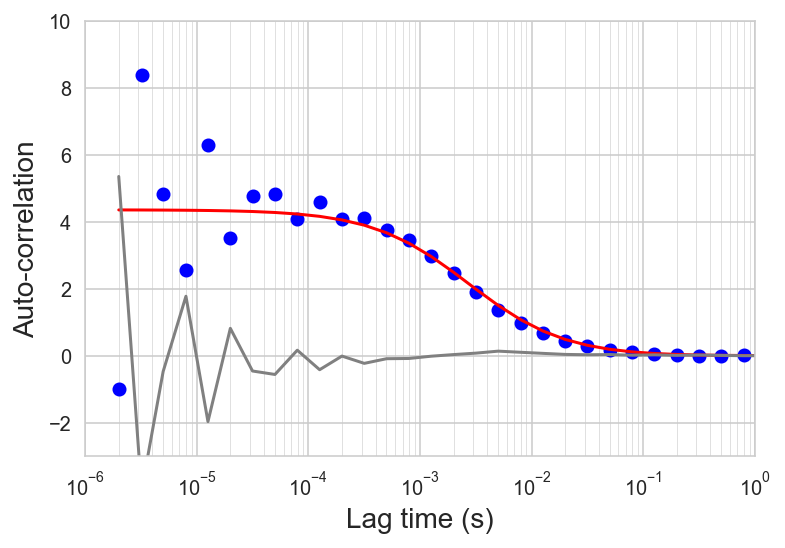

In [305]:
plt.semilogx(timelags_exp[5:46], AC_all[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('Auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-3, 10);

plt.show()

AC_all_fit = result.best_fit

## Different m values

In [306]:
temp_d = d_m5F6
burstph = fb.bext.burst_photons(temp_d)
burstph_m5F6 = burstph.timestamp.values# * hw_unit

temp_d = d_m10F6
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6 = burstph.timestamp.values# * hw_unit

temp_d = d_m15F6
burstph = fb.bext.burst_photons(temp_d)
burstph_m15F6 = burstph.timestamp.values# * hw_unit

temp_d = d_m20F6
burstph = fb.bext.burst_photons(temp_d)
burstph_m20F6 = burstph.timestamp.values# * hw_unit


In [307]:
AC_m5F6 = pyc.pcorrelate(burstph_m5F6, burstph_m5F6, bins, normalize=True)-1
AC_m10F6 = pyc.pcorrelate(burstph_m10F6, burstph_m10F6, bins, normalize=True)-1
AC_m15F6 = pyc.pcorrelate(burstph_m15F6, burstph_m15F6, bins, normalize=True)-1
AC_m20F6 = pyc.pcorrelate(burstph_m20F6, burstph_m20F6, bins, normalize=True)-1


Text(0.5,0,'Lag time (s)')

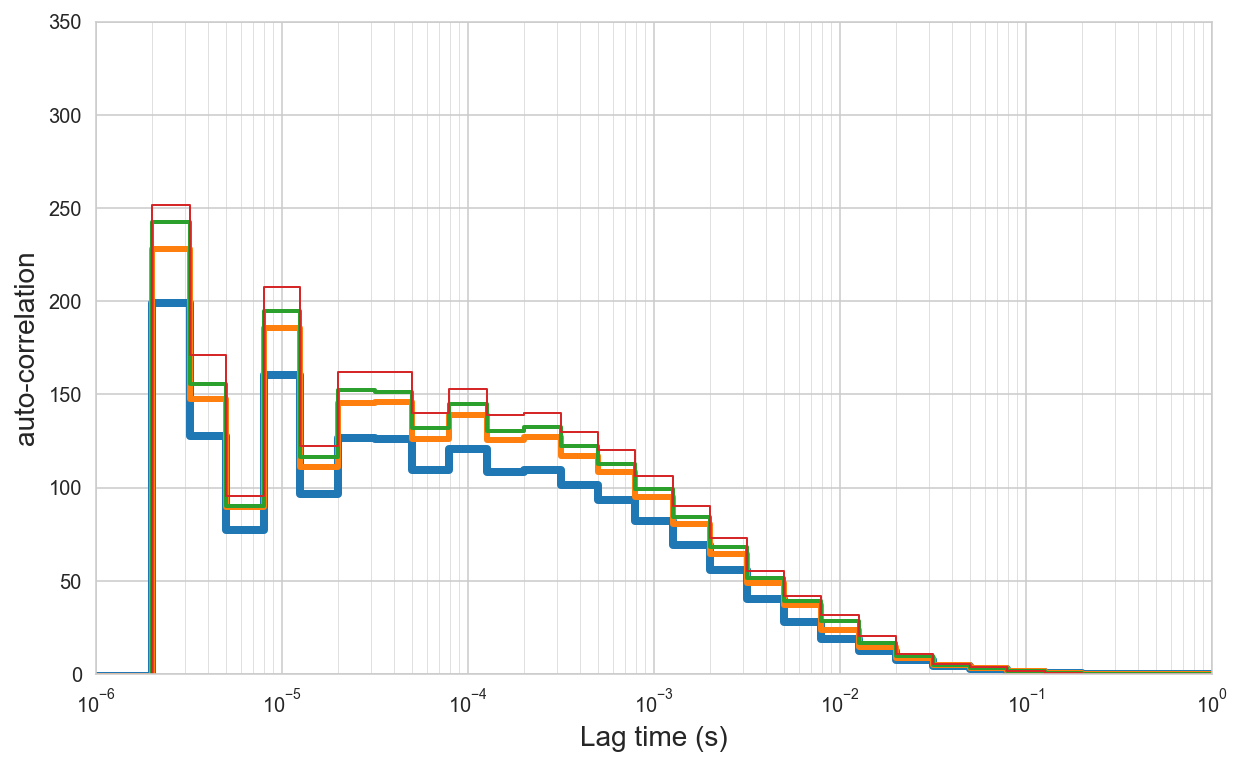

In [310]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogx(timelags_exp, AC_m5F6, drawstyle='steps-pre', linewidth=4)
plt.semilogx(timelags_exp, AC_m10F6, drawstyle='steps-pre', linewidth=3)
plt.semilogx(timelags_exp, AC_m15F6, drawstyle='steps-pre', linewidth=2)
plt.semilogx(timelags_exp, AC_m20F6, drawstyle='steps-pre', linewidth=1)
plt.xlabel('Time (s)')
plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(0, 350);
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)


In [311]:
from lmfit import Model
gmodel = Model(FCS_3D_diff)

In [312]:
gmodel.set_param_hint('tauD', value=1e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/70, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [313]:
result = gmodel.fit(AC_m5F6[5:46], params, x=timelags_exp[5:46])

In [314]:
result.chisqr, result.redchi

(25060.306123296094, 659.4817400867393)

In [315]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1628
    # data points      = 41
    # variables        = 3
    chi-square         = 25060.3061
    reduced chi-square = 659.481740
    Akaike info crit   = 269.034203
    Bayesian info crit = 274.174920
[[Variables]]
    tauD:   0.00300917 +/- 0.00202490 (67.29%) (init = 0.001)
    N:      0.00862886 +/- 5.8986e-04 (6.84%) (init = 0.01428571)
    kappa:  6.99000000 +/- 129.314149 (1849.99%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.450
    C(N, kappa)    =  0.207



In [316]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(3.701518074783472e-05, 3.214011014551765e-05, 4.2232224874094726e-05)

In [317]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0043082274085811095, 0.00401411476832586, 0.0046022820593751325)

In [318]:
result.success

True

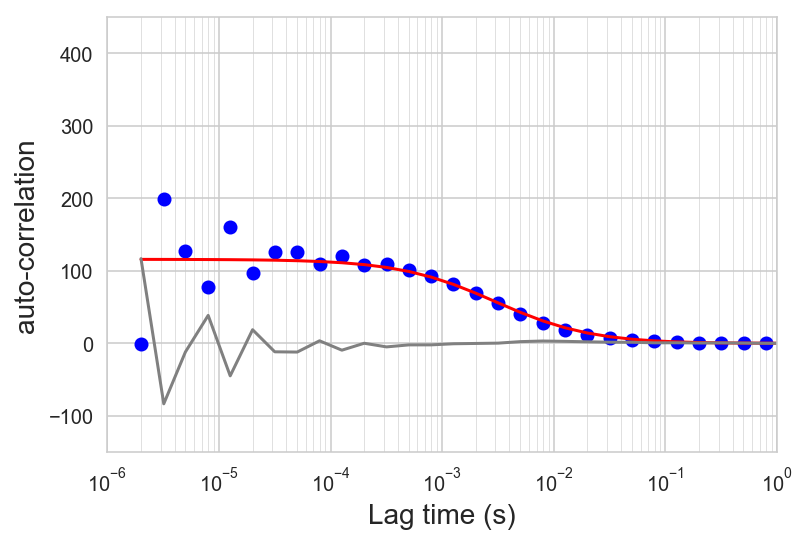

In [319]:
plt.semilogx(timelags_exp[5:46], AC_m5F6[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 450);

plt.show()

AC_m5F6_fit = result.best_fit

In [320]:
gmodel.set_param_hint('tauD', value=1e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/70, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [321]:
result = gmodel.fit(AC_m10F6[5:46], params, x=timelags_exp[5:46])

In [322]:
result.chisqr, result.redchi

(32955.87594122592, 867.2598931901557)

In [323]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 341
    # data points      = 41
    # variables        = 3
    chi-square         = 32955.8759
    reduced chi-square = 867.259893
    Akaike info crit   = 280.263464
    Bayesian info crit = 285.404180
[[Variables]]
    tauD:   0.00315032 +/- 0.00210554 (66.84%) (init = 0.001)
    N:      0.00748524 +/- 5.0653e-04 (6.77%) (init = 0.01428571)
    kappa:  6.99000000 +/- 72.6608230 (1039.50%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.447
    C(N, kappa)    =  0.205



In [324]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(2.7874978402619988e-05, 2.4238181201674536e-05, 3.1764527880895344e-05)

In [325]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0037379492065555643, 0.0034852951693458032, 0.003990560482059331)

In [326]:
result.success

True

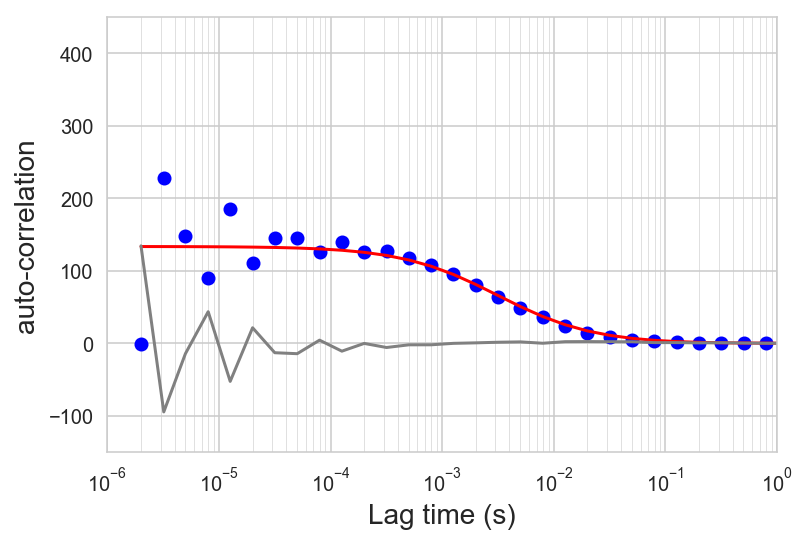

In [327]:
plt.semilogx(timelags_exp[5:46], AC_m10F6[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 450);

plt.show()

AC_m10F6_fit = result.best_fit

In [328]:
gmodel.set_param_hint('tauD', value=1e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/70, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [329]:
result = gmodel.fit(AC_m15F6[5:46], params, x=timelags_exp[5:46])

In [330]:
result.chisqr, result.redchi

(37163.68720103204, 977.9917684482115)

In [331]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 48
    # data points      = 41
    # variables        = 3
    chi-square         = 37163.6872
    reduced chi-square = 977.991768
    Akaike info crit   = 285.190129
    Bayesian info crit = 290.330845
[[Variables]]
    tauD:   0.00320912 +/- 0.00217900 (67.90%) (init = 0.001)
    N:      0.00715893 +/- 4.9121e-04 (6.86%) (init = 0.01428571)
    kappa:  6.99000168 +/- 4.99155468 (71.41%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.447
    C(N, kappa)    =  0.206



In [332]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(2.550315493798916e-05, 2.213063424949535e-05, 2.911353149492868e-05)

In [333]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.003575193229183372, 0.0033301517295704604, 0.003820194513663397)

In [334]:
result.success

True

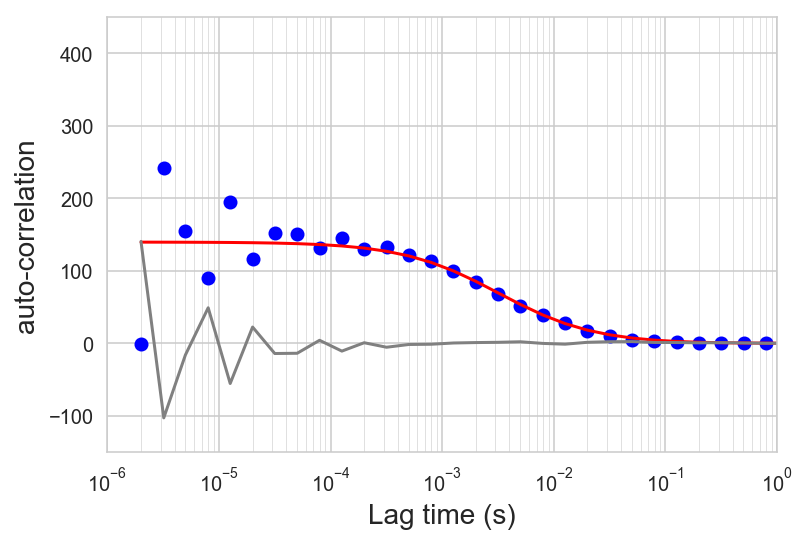

In [335]:
plt.semilogx(timelags_exp[5:46], AC_m15F6[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 450);

plt.show()

AC_m15F6_fit = result.best_fit

In [336]:
gmodel.set_param_hint('tauD', value=1e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/70, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [337]:
result = gmodel.fit(AC_m20F6[5:46], params, x=timelags_exp[5:46])

In [338]:
result.chisqr, result.redchi

(41140.526966384685, 1082.6454464838075)

In [339]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 86
    # data points      = 41
    # variables        = 3
    chi-square         = 41140.5270
    reduced chi-square = 1082.64545
    Akaike info crit   = 289.358253
    Bayesian info crit = 294.498969
[[Variables]]
    tauD:   0.00329373 +/- 0.00221712 (67.31%) (init = 0.001)
    N:      0.00674862 +/- 4.5807e-04 (6.79%) (init = 0.01428571)
    kappa:  6.99015129 +/- 125.575623 (1796.47%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.447
    C(N, kappa)    =  0.206



In [340]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(2.2669731241209412e-05, 1.9702698555668086e-05, 2.584377743097832e-05)

In [341]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0033705138791383284, 0.0031419748623303296, 0.003599017924195336)

In [342]:
result.success

True

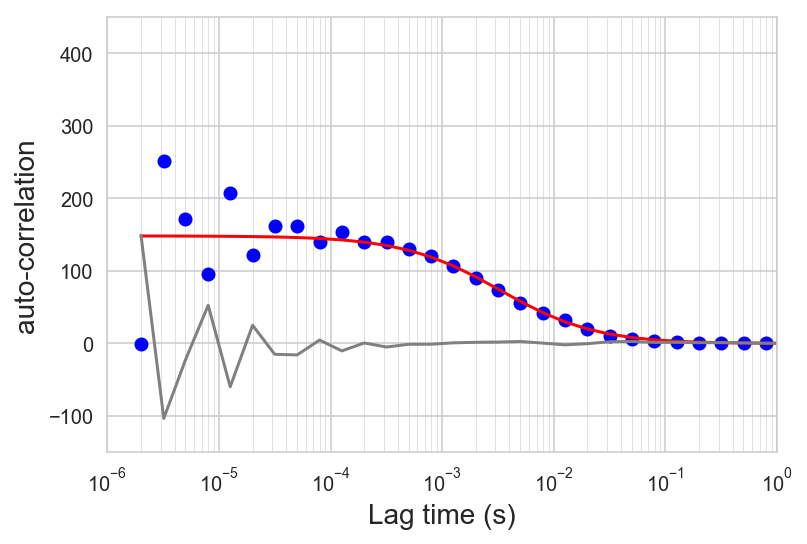

In [343]:
plt.semilogx(timelags_exp[5:46], AC_m20F6[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 450);

plt.show()

AC_m20F6_fit = result.best_fit

## Different F values

In [344]:
temp_d = d_m10F3
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F3 = burstph.timestamp.values# * hw_unit

temp_d = d_m10F6
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6 = burstph.timestamp.values# * hw_unit

temp_d = d_m10F11
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F11 = burstph.timestamp.values# * hw_unit

temp_d = d_m10F16
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F16 = burstph.timestamp.values# * hw_unit

temp_d = d_m10F21
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F21 = burstph.timestamp.values# * hw_unit


In [345]:
AC_m10F3 = pyc.pcorrelate(burstph_m10F3, burstph_m10F3, bins, normalize=True)-1
AC_m10F6 = pyc.pcorrelate(burstph_m10F6, burstph_m10F6, bins, normalize=True)-1
AC_m10F11 = pyc.pcorrelate(burstph_m10F11, burstph_m10F11, bins, normalize=True)-1
AC_m10F16 = pyc.pcorrelate(burstph_m10F16, burstph_m10F16, bins, normalize=True)-1
AC_m10F21 = pyc.pcorrelate(burstph_m10F21, burstph_m10F21, bins, normalize=True)-1


Text(0.5,0,'Lag time (s)')

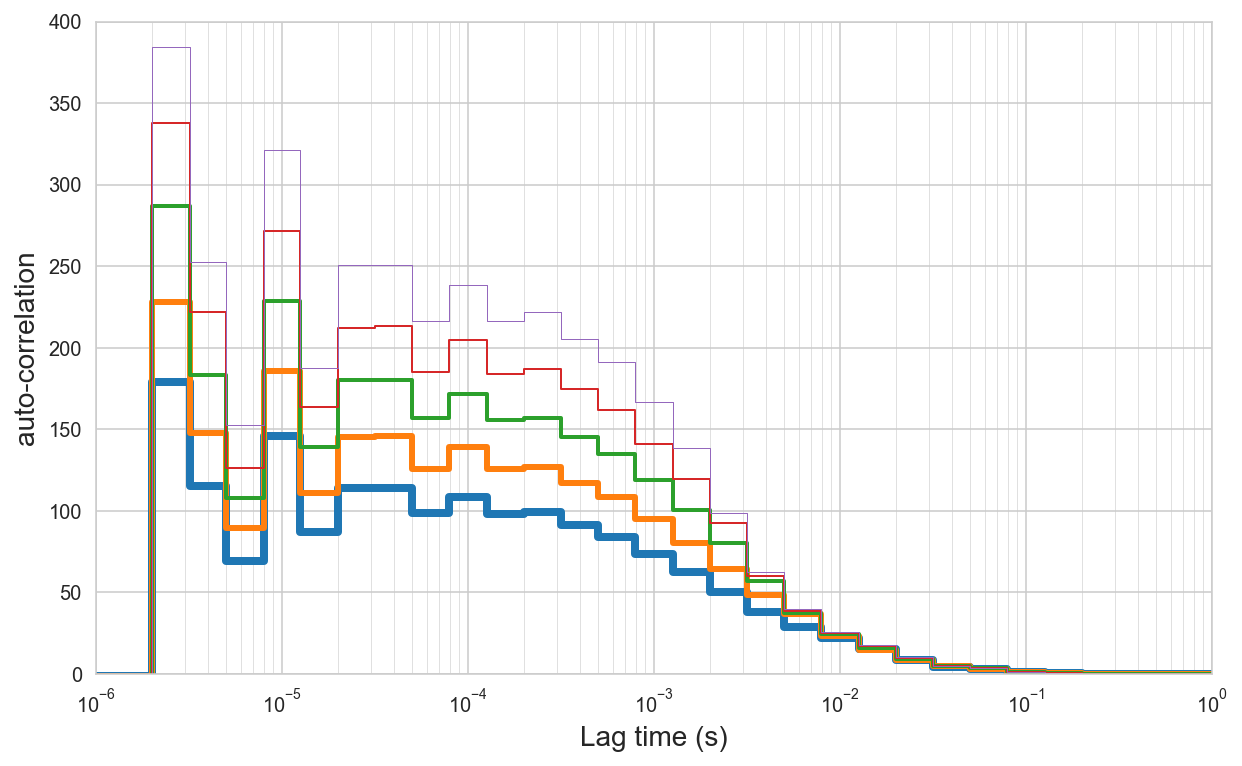

In [348]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogx(timelags_exp, AC_m10F3, drawstyle='steps-pre', linewidth=4)
plt.semilogx(timelags_exp, AC_m10F6, drawstyle='steps-pre', linewidth=3)
plt.semilogx(timelags_exp, AC_m10F11, drawstyle='steps-pre', linewidth=2)
plt.semilogx(timelags_exp, AC_m10F16, drawstyle='steps-pre', linewidth=1)
plt.semilogx(timelags_exp, AC_m10F21, drawstyle='steps-pre', linewidth=0.5)
plt.xlabel('Time (s)')
plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(0, 400);
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)


In [349]:
from lmfit import Model
gmodel = Model(FCS_3D_diff)

In [350]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/55, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [351]:
result = gmodel.fit(AC_m10F3[5:46], params, x=timelags_exp[5:46])

In [352]:
result.chisqr, result.redchi

(20437.541574386283, 537.830041431218)

In [353]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 41
    # variables        = 3
    chi-square         = 20437.5416
    reduced chi-square = 537.830041
    Akaike info crit   = 260.673825
    Bayesian info crit = 265.814541
[[Variables]]
    tauD:   0.00320764 +/- 0.00216082 (67.37%) (init = 0.002)
    N:      0.00957712 +/- 6.5196e-04 (6.81%) (init = 0.01818182)
    kappa:  6.99050557 +/- 166.028495 (2375.06%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.447
    C(N, kappa)    =  0.206



In [354]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(4.556881806494495e-05, 3.959302781086915e-05, 5.196157429410153e-05)

In [355]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.004780914674087034, 0.004455940913204161, 0.0051058175940907925)

In [356]:
result.success

True

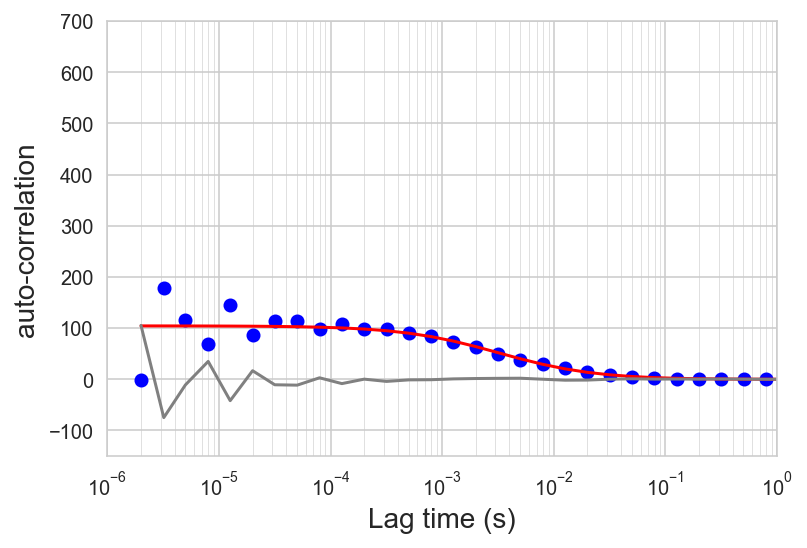

In [357]:
plt.semilogx(timelags_exp[5:46], AC_m10F3[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 700);

plt.show()

AC_m10F3_fit = result.best_fit

In [358]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/55, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [359]:
result = gmodel.fit(AC_m10F6[5:46], params, x=timelags_exp[5:46])

In [360]:
result.chisqr, result.redchi

(32955.89188822375, 867.2603128479934)

In [361]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1176
    # data points      = 41
    # variables        = 3
    chi-square         = 32955.8919
    reduced chi-square = 867.260313
    Akaike info crit   = 280.263484
    Bayesian info crit = 285.404200
[[Variables]]
    tauD:   0.00315115 +/- 0.00210746 (66.88%) (init = 0.002)
    N:      0.00748499 +/- 5.0661e-04 (6.77%) (init = 0.01818182)
    kappa:  6.99000145 +/- 53.3706405 (763.53%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.448
    C(N, kappa)    =  0.206



In [362]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(2.7873118219390314e-05, 2.4235912495673695e-05, 3.1763153186425974e-05)

In [363]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.003737824326451097, 0.003485131863122476, 0.003990474015041921)

In [364]:
result.success

True

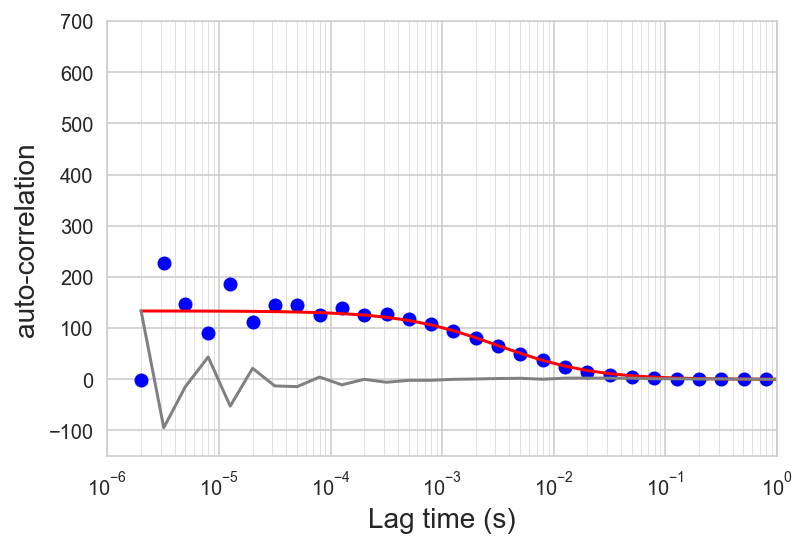

In [365]:
plt.semilogx(timelags_exp[5:46], AC_m10F6[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 700);

plt.show()

In [366]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/55, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [367]:
result = gmodel.fit(AC_m10F11[5:46], params, x=timelags_exp[5:46])

In [368]:
result.chisqr, result.redchi

(51878.5471140841, 1365.2249240548447)

In [369]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1432
    # data points      = 41
    # variables        = 3
    chi-square         = 51878.5471
    reduced chi-square = 1365.22492
    Akaike info crit   = 298.866631
    Bayesian info crit = 304.007347
[[Variables]]
    tauD:   0.00298947 +/- 0.00201972 (67.56%) (init = 0.002)
    N:      0.00602009 +/- 4.1339e-04 (6.87%) (init = 0.01818182)
    kappa:  6.99000133 +/- 54.3912480 (778.13%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.450
    C(N, kappa)    =  0.207



In [370]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(1.8048161935624307e-05, 1.5658877447144448e-05, 2.0606292712610497e-05)

In [371]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.003007023367058022, 0.002800726892767637, 0.0032132913590153514)

In [372]:
result.success

True

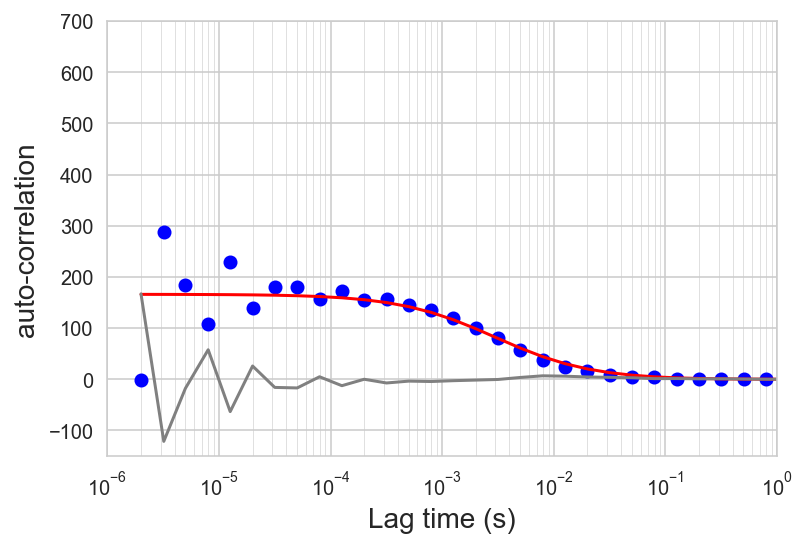

In [373]:
plt.semilogx(timelags_exp[5:46], AC_m10F11[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 700);

plt.show()

AC_m10F11_fit = result.best_fit

In [374]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/55, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [375]:
result = gmodel.fit(AC_m10F16[5:46], params, x=timelags_exp[5:46])

In [376]:
result.chisqr, result.redchi

(73032.71775708323, 1921.9136251864008)

In [377]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 41
    # variables        = 3
    chi-square         = 73032.7178
    reduced chi-square = 1921.91363
    Akaike info crit   = 312.888720
    Bayesian info crit = 318.029437
[[Variables]]
    tauD:   0.00280903 +/- 0.00189440 (67.44%) (init = 0.002)
    N:      0.00505819 +/- 3.4851e-04 (6.89%) (init = 0.01818182)
    kappa:  6.99001637 +/- 159.698682 (2284.67%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.452
    C(N, kappa)    =  0.209



In [378]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(1.274956413588324e-05, 1.1055769807644111e-05, 1.456359241192029e-05)

In [379]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0025269606913634777, 0.002352990242675513, 0.00270091089710452)

In [380]:
result.success

True

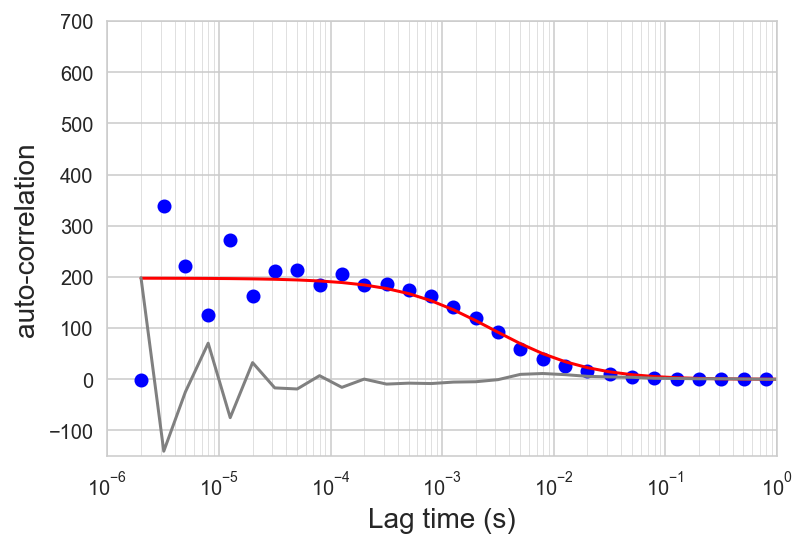

In [381]:
plt.semilogx(timelags_exp[5:46], AC_m10F16[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 700);

plt.show()

AC_m10F16_fit = result.best_fit

In [392]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/250, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [393]:
result = gmodel.fit(AC_m10F21[5:46], params, x=timelags_exp[5:46])

In [394]:
result.chisqr, result.redchi

(97028.98344220189, 2553.394301110576)

In [395]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 681
    # data points      = 41
    # variables        = 3
    chi-square         = 97028.9834
    reduced chi-square = 2553.39430
    Akaike info crit   = 324.536911
    Bayesian info crit = 329.677627
[[Variables]]
    tauD:   0.00265869 +/- 0.00176643 (66.44%) (init = 0.002)
    N:      0.00431829 +/- 2.9447e-04 (6.82%) (init = 0.004)
    kappa:  6.99000119 +/- 52.8059217 (755.45%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.454
    C(N, kappa)    =  0.210



In [396]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(9.297006316466572e-06, 8.073872386660241e-06, 1.0606106138677518e-05)

In [397]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0021575899391647396, 0.0020105598282033777, 0.0023046055980997676)

In [398]:
result.success

True

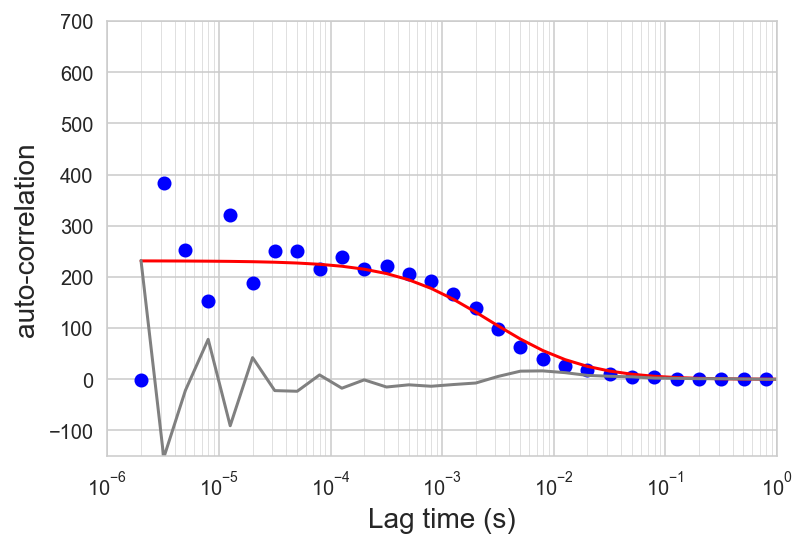

In [399]:
plt.semilogx(timelags_exp[5:46], AC_m10F21[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 700);

plt.show()

AC_m10F21_fit = result.best_fit

## Different size threshold values

In [400]:
temp_d = d_m10F6
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6 = burstph.timestamp.values# * hw_unit

temp_d = ds_m10F6_sz20
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6_sz20 = burstph.timestamp.values# * hw_unit

temp_d = ds_m10F6_sz40
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6_sz40 = burstph.timestamp.values# * hw_unit

temp_d = ds_m10F6_sz80
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6_sz80 = burstph.timestamp.values# * hw_unit


In [401]:
AC_m10F6_sz10 = pyc.pcorrelate(burstph_m10F6, burstph_m10F6, bins, normalize=True)-1
AC_m10F6_sz20 = pyc.pcorrelate(burstph_m10F6_sz20, burstph_m10F6_sz20, bins, normalize=True)-1
AC_m10F6_sz40 = pyc.pcorrelate(burstph_m10F6_sz40, burstph_m10F6_sz40, bins, normalize=True)-1
AC_m10F6_sz80 = pyc.pcorrelate(burstph_m10F6_sz80, burstph_m10F6_sz80, bins, normalize=True)-1


Text(0.5,0,'Lag time (s)')

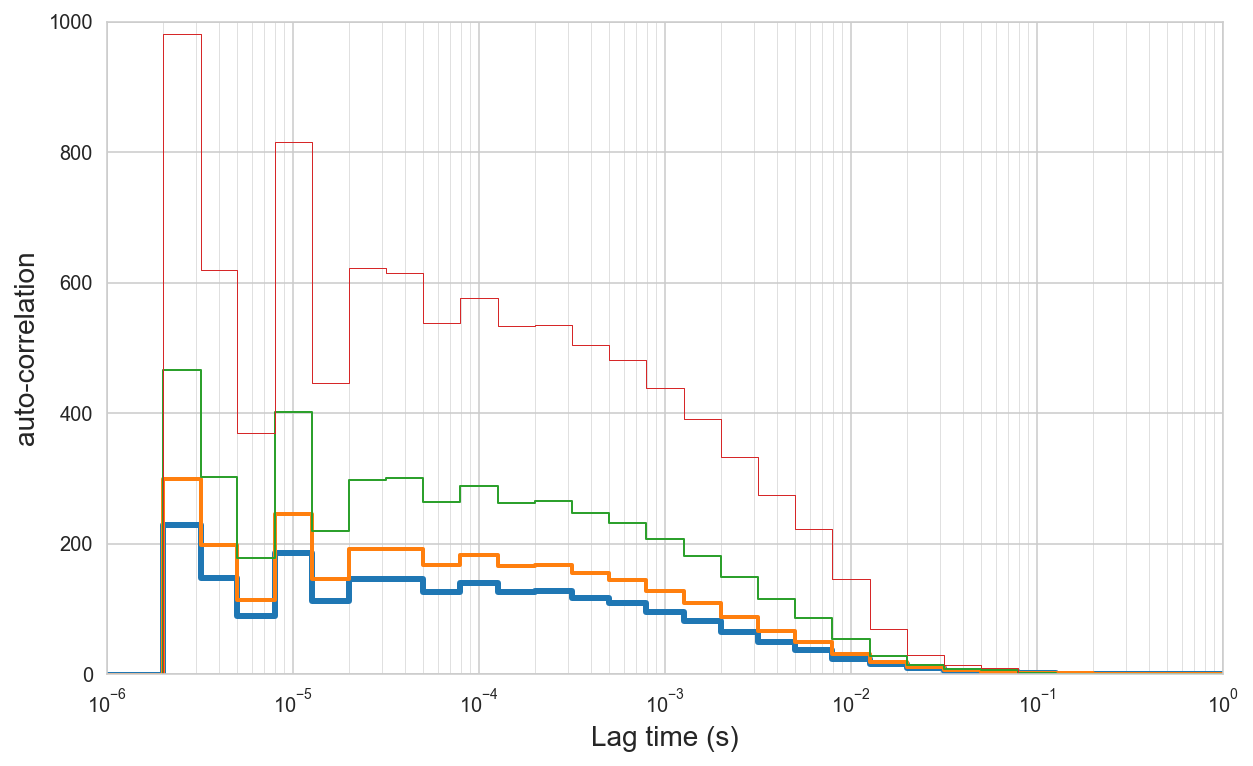

In [403]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogx(timelags_exp, AC_m10F6_sz10, drawstyle='steps-pre', linewidth=3)
plt.semilogx(timelags_exp, AC_m10F6_sz20, drawstyle='steps-pre', linewidth=2)
plt.semilogx(timelags_exp, AC_m10F6_sz40, drawstyle='steps-pre', linewidth=1)
plt.semilogx(timelags_exp, AC_m10F6_sz80, drawstyle='steps-pre', linewidth=0.5)
plt.xlabel('Time (s)')
plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(0, 1000);
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)


In [404]:
from lmfit import Model
gmodel = Model(FCS_3D_diff)

In [408]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/200, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [409]:
result = gmodel.fit(AC_m10F6_sz10[5:46], params, x=timelags_exp[5:46])

In [410]:
result.chisqr, result.redchi

(32955.78268398654, 867.2574390522773)

In [411]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 733
    # data points      = 41
    # variables        = 3
    chi-square         = 32955.7827
    reduced chi-square = 867.257439
    Akaike info crit   = 280.263348
    Bayesian info crit = 285.404064
[[Variables]]
    tauD:   0.00314846 +/- 0.00210492 (66.86%) (init = 0.002)
    N:      0.00748233 +/- 5.0629e-04 (6.77%) (init = 0.005)
    kappa:  6.99000000 +/- 0.02912973 (0.42%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.448
    C(N, kappa)    =  0.206



In [412]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(2.7853382717379915e-05, 2.421969592580897e-05, 3.17395843270063e-05)

In [413]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0037364991623561198, 0.0034839643382077916, 0.003988991265207178)

In [414]:
result.success

True

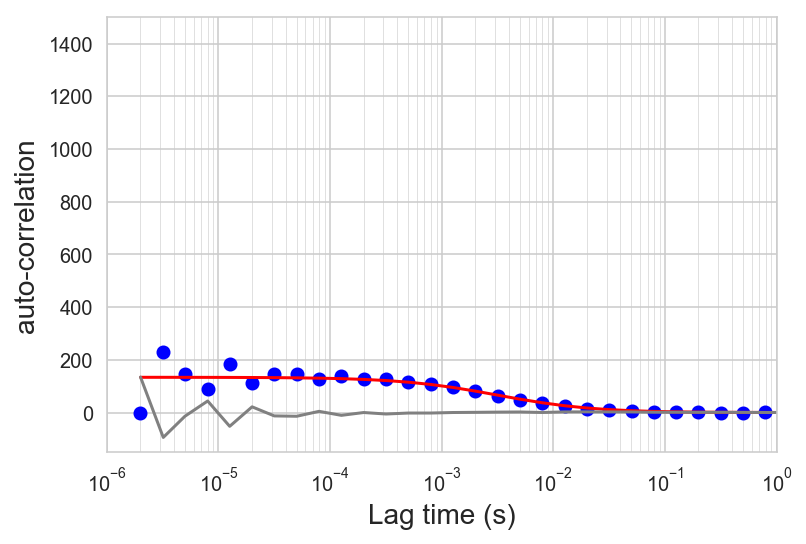

In [415]:
plt.semilogx(timelags_exp[5:46], AC_m10F6[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 1500);

plt.show()

In [417]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/300, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [418]:
result = gmodel.fit(AC_m10F6_sz20[5:46], params, x=timelags_exp[5:46])

In [419]:
result.chisqr, result.redchi

(57658.95639858458, 1517.340957857489)

In [420]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2347
    # data points      = 41
    # variables        = 3
    chi-square         = 57658.9564
    reduced chi-square = 1517.34096
    Akaike info crit   = 303.197881
    Bayesian info crit = 308.338597
[[Variables]]
    tauD:   0.00328441 +/- 0.00220740 (67.21%) (init = 0.002)
    N:      0.00569136 +/- 3.8580e-04 (6.78%) (init = 0.003333333)
    kappa:  6.99000107 +/- 52.8214117 (755.67%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.447
    C(N, kappa)    =  0.206



In [421]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(1.6134495424369177e-05, 1.4024819897318075e-05, 1.8391326246813833e-05)

In [422]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.002842982983585761, 0.002650436102407606, 0.003035505057789589)

In [423]:
result.success

True

In [424]:
plt.semilogx(timelags_exp[5:46], AC_m10F6_sz20[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 1500);

plt.show()

AC_m10F6_sz20_fit = result.best_fit

In [425]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/400, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [426]:
result = gmodel.fit(AC_m10F6_sz40[5:46], params, x=timelags_exp[5:46])

In [427]:
result.chisqr, result.redchi

(144428.04314671576, 3800.737977545152)

In [428]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3239
    # data points      = 41
    # variables        = 3
    chi-square         = 144428.043
    reduced chi-square = 3800.73798
    Akaike info crit   = 340.845550
    Bayesian info crit = 345.986266
[[Variables]]
    tauD:   0.00374475 +/- 0.00253730 (67.76%) (init = 0.002)
    N:      0.00363195 +/- 2.4547e-04 (6.76%) (init = 0.0025)
    kappa:  6.99000000 +/- 181.815071 (2601.07%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.788
    C(tauD, N)     =  0.443
    C(N, kappa)    =  0.204



In [429]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(6.579579065468799e-06, 5.721193804042457e-06, 7.497782954613008e-06)

In [430]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0018148752887451763, 0.0016922842606220756, 0.0019374562743470977)

In [431]:
result.success

True

In [432]:
plt.semilogx(timelags_exp[5:46], AC_m10F6_sz40[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 1500);

plt.show()

AC_m10F6_sz40_fit = result.best_fit

In [433]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/600, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [434]:
result = gmodel.fit(AC_m10F6_sz80[5:46], params, x=timelags_exp[5:46])

In [435]:
result.chisqr, result.redchi

(623508.1083308109, 16408.10811396871)

In [436]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2104
    # data points      = 41
    # variables        = 3
    chi-square         = 623508.108
    reduced chi-square = 16408.1081
    Akaike info crit   = 400.811344
    Bayesian info crit = 405.952060
[[Variables]]
    tauD:   0.00457563 +/- 0.00314406 (68.71%) (init = 0.002)
    N:      0.00177763 +/- 1.1989e-04 (6.74%) (init = 0.001666667)
    kappa:  6.99000000 +/- 109.304430 (1563.73%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.788
    C(tauD, N)     =  0.437
    C(N, kappa)    =  0.202



In [437]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(1.5781124337310715e-06, 1.3725396041941451e-06, 1.7980068576228803e-06)

In [438]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0008885514991944433, 0.0008286428796018595, 0.0009484577234000716)

In [439]:
result.success

True

In [440]:
plt.semilogx(timelags_exp[5:46], AC_m10F6_sz80[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 3500);

plt.show()

AC_m10F6_sz80_fit = result.best_fit

## Different width threshold values

In [441]:
temp_d = d_m10F6
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6 = burstph.timestamp.values# * hw_unit

temp_d = ds_m10F6_w0_5
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6_w0_5 = burstph.timestamp.values# * hw_unit

temp_d = ds_m10F6_w1_0
burstph = fb.bext.burst_photons(temp_d)
burstph_m10F6_w1_0 = burstph.timestamp.values# * hw_unit


In [442]:
AC_m10F6_w0_0 = pyc.pcorrelate(burstph_m10F6, burstph_m10F6, bins, normalize=True)-1
AC_m10F6_w0_5 = pyc.pcorrelate(burstph_m10F6_w0_5, burstph_m10F6_w0_5, bins, normalize=True)-1
AC_m10F6_w1_0 = pyc.pcorrelate(burstph_m10F6_w1_0, burstph_m10F6_w1_0, bins, normalize=True)-1


In [444]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.semilogx(timelags_exp, AC_m10F6_w0_0, drawstyle='steps-pre', linewidth=3)
plt.semilogx(timelags_exp, AC_m10F6_w0_5, drawstyle='steps-pre', linewidth=2)
plt.semilogx(timelags_exp, AC_m10F6_w1_0, drawstyle='steps-pre', linewidth=1)
plt.xlabel('Time (s)')
plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(0, 400);
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)


Text(0.5,0,'Lag time (s)')

In [445]:
from lmfit import Model
gmodel = Model(FCS_3D_diff)

In [446]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/150, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [447]:
result = gmodel.fit(AC_m10F6_w0_0[5:46], params, x=timelags_exp[5:46])

In [448]:
result.chisqr, result.redchi

(32955.586532863876, 867.2522771806283)

In [449]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 252
    # data points      = 41
    # variables        = 3
    chi-square         = 32955.5865
    reduced chi-square = 867.252277
    Akaike info crit   = 280.263104
    Bayesian info crit = 285.403820
[[Variables]]
    tauD:   0.00313172 +/- 0.00209124 (66.78%) (init = 0.002)
    N:      0.00747354 +/- 5.0527e-04 (6.76%) (init = 0.006666667)
    kappa:  6.99000000 +/- 66.6855012 (954.01%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.448
    C(N, kappa)    =  0.206



In [450]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(2.778815504822507e-05, 2.4165890661009826e-05, 3.16619252426209e-05)

In [451]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0037321160368463647, 0.0034800877891685207, 0.003984101734708732)

In [452]:
result.success

True

In [453]:
plt.semilogx(timelags_exp[5:46], AC_m10F6[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 700);

plt.show()

In [455]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/150, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [456]:
result = gmodel.fit(AC_m10F6_w0_5[5:46], params, x=timelags_exp[5:46])

In [457]:
result.chisqr, result.redchi

(33537.82701726735, 882.574395191246)

In [458]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 247
    # data points      = 41
    # variables        = 3
    chi-square         = 33537.8270
    reduced chi-square = 882.574395
    Akaike info crit   = 280.981144
    Bayesian info crit = 286.121861
[[Variables]]
    tauD:   0.00317029 +/- 0.00211249 (66.63%) (init = 0.002)
    N:      0.00739355 +/- 4.9834e-04 (6.74%) (init = 0.006666667)
    kappa:  6.99000218 +/- 6.58164764 (94.16%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) = -0.787
    C(tauD, N)     =  0.448
    C(N, kappa)    = -0.206



In [459]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(2.719793561412054e-05, 2.3662949448222115e-05, 3.0977614322691416e-05)

In [460]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0036922192005552396, 0.003443641701979899, 0.003940755308609416)

In [461]:
result.success

True

In [462]:
plt.semilogx(timelags_exp[5:46], AC_m10F6_w0_5[5:46], 'bo')
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 700);

plt.show()

AC_m10F6_w0_5_fit = result.best_fit

In [464]:
gmodel.set_param_hint('tauD', value=2e-3, min=0, max=np.inf)
gmodel.set_param_hint('N', value=1/155, min=0, max=np.inf)
gmodel.set_param_hint('kappa', value=7, min=6.99, max=7.01)
params = gmodel.make_params()

In [465]:
result = gmodel.fit(AC_m10F6_w1_0[5:46], params, x=timelags_exp[5:46])

In [466]:
result.chisqr, result.redchi

(56272.89323809654, 1480.8656115288563)

In [467]:
print(result.fit_report())

[[Model]]
    Model(FCS_3D_diff)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 798
    # data points      = 41
    # variables        = 3
    chi-square         = 56272.8932
    reduced chi-square = 1480.86561
    Akaike info crit   = 302.200243
    Bayesian info crit = 307.340959
[[Variables]]
    tauD:   0.00344298 +/- 0.00229034 (66.52%) (init = 0.002)
    N:      0.00570398 +/- 3.8098e-04 (6.68%) (init = 0.006451613)
    kappa:  6.99000000 +/- 77.5570239 (1109.54%) (init = 7)
[[Correlations]] (unreported correlations are < 0.100)
    C(tauD, kappa) =  0.787
    C(tauD, N)     =  0.445
    C(N, kappa)    =  0.204



In [468]:
# the probability to have more than 1 molecule in the effective detection vol.
prob_more_than_mol1(result.params['N'].value), prob_more_than_mol1(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1(result.params['N'].value + result.params['N'].stderr)


(1.6205972113936262e-05, 1.4116992878565604e-05, 1.843844883764323e-05)

In [469]:
# the probability to have more than 1 molecule in the effective detection vol., when molecules traverse the beam
prob_more_than_mol1_withoutBG(result.params['N'].value), prob_more_than_mol1_withoutBG(result.params['N'].value - result.params['N'].stderr), prob_more_than_mol1_withoutBG(result.params['N'].value + result.params['N'].stderr)


(0.0028492792890201795, 0.0026591390625895998, 0.0030393953244791244)

In [470]:
result.success

True

In [471]:
plt.semilogx(timelags_exp[5:46], AC_m10F6_w1_0[5:46])
#plt.semilogx(timelags_exp, FCS_3D_diff(timelags_exp, 1.25e-3, 1/3, 7, 0))
#plt.semilogx(ResX_f, result.init_fit, 'k--')
plt.semilogx(timelags_exp[5:46], result.best_fit, 'r-')
plt.semilogx(timelags_exp[5:46], result.residual, 'grey')
plt.ylabel('auto-correlation', fontsize=14)
plt.xlabel('Lag time (s)', fontsize=14)

plt.grid(True); plt.grid(True, which='minor', lw=0.3);
plt.xlim(1e-6, 1)
plt.ylim(-150, 700);

plt.show()

AC_m10F6_w1_0_fit = result.best_fit

## FCS - Main figure

No handles with labels found to put in legend.


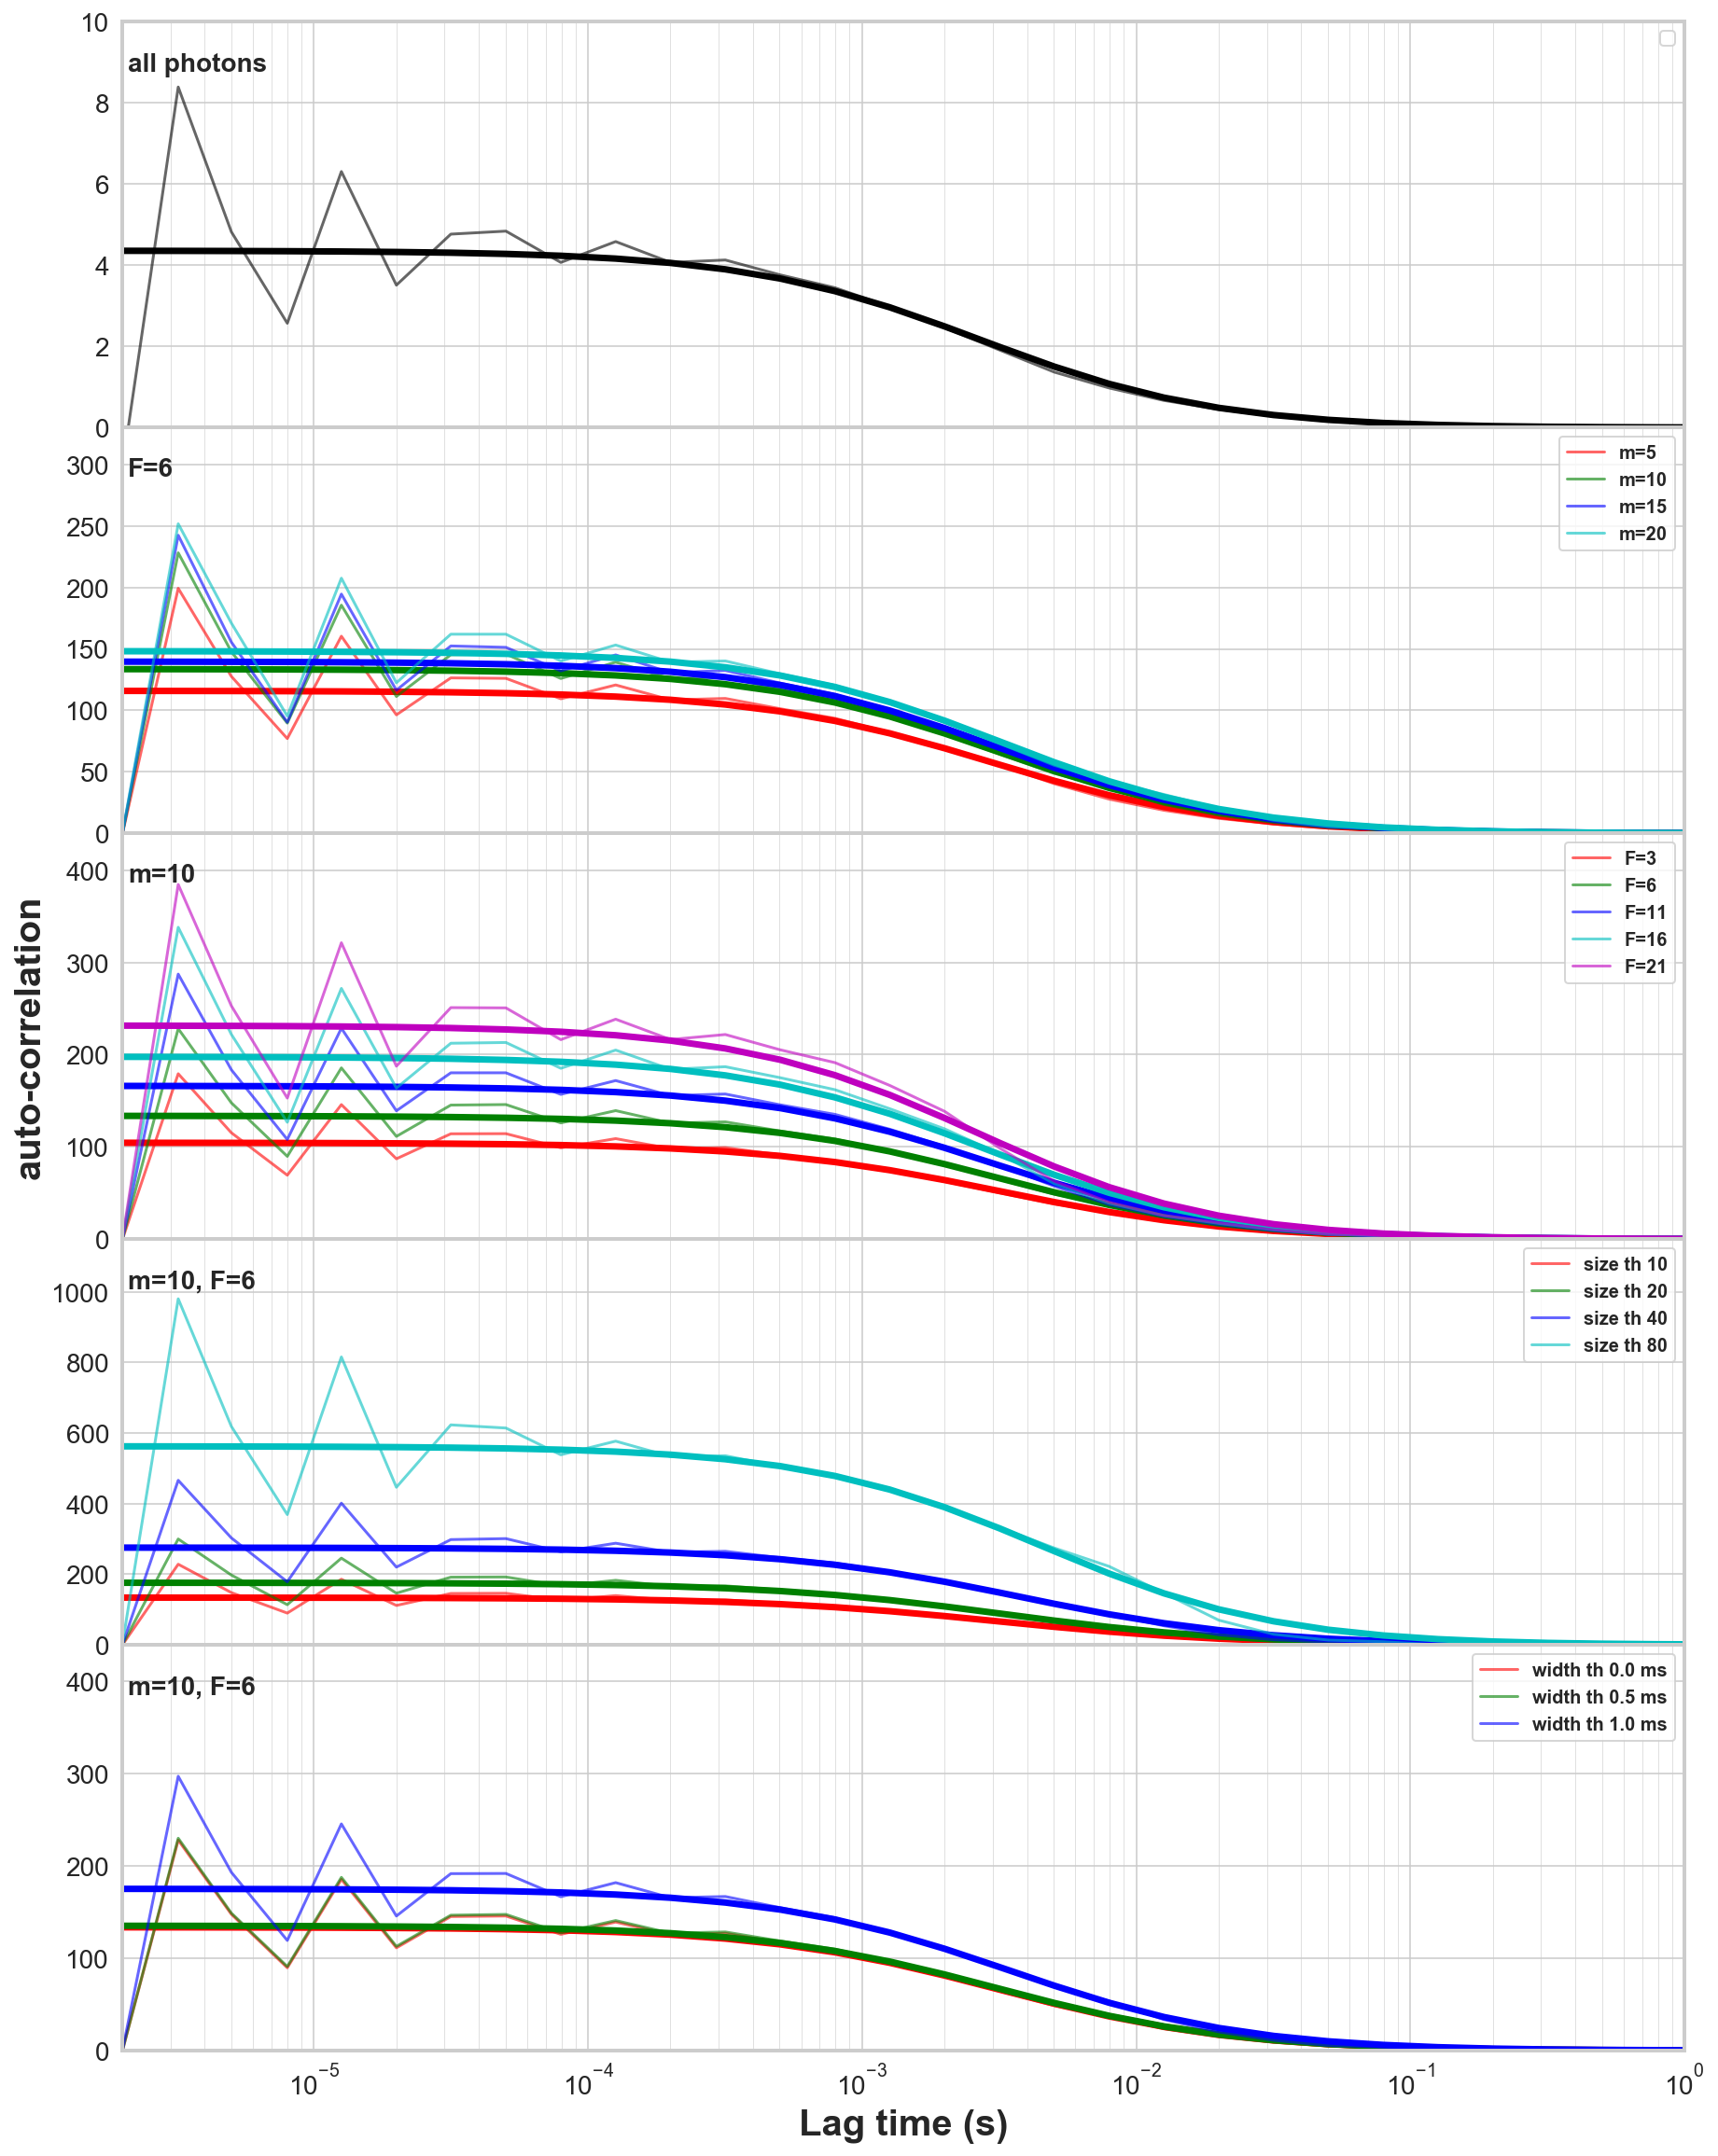

In [483]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)
legend_properties = {'weight':'bold'}

cols = 1
rows = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(3 * rows, 20 * cols), tight_layout=False)

plt.subplots_adjust(wspace=0, hspace=0)

ax[0].semilogx(timelags_exp[5:46], AC_all[5:46], color='k', alpha=0.6)
ax[0].semilogx(timelags_exp[5:46], AC_all_fit, color='k', linewidth=3.5)
#ax[0].set_ylabel('auto-correlation', fontsize=16)
#ax[0].set_xlabel('Lag time (s)', fontsize=16)
ax[0].grid(True, which='minor', lw=0.3);
ax[0].set_xlim(2e-6, 1)
ax[0].set_ylim(0, 10);
ax[0].legend(fontsize=12, prop=legend_properties)
ax[0].text(2.1e-6, 0.88*10, 'all photons', fontsize=14, fontweight='bold')
ax[0].tick_params(axis='both', which='both', labelsize=14)
ax[0].set_xticklabels([])

ax[1].semilogx(timelags_exp[5:46], AC_m5F6[5:46], label='m=5', color='r', alpha=0.6)
ax[1].semilogx(timelags_exp[5:46], AC_m5F6_fit, color='r', linewidth=3.5)
ax[1].semilogx(timelags_exp[5:46], AC_m10F6[5:46], label='m=10', color='g', alpha=0.6)
ax[1].semilogx(timelags_exp[5:46], AC_m10F6_fit, color='g', linewidth=3.5)
ax[1].semilogx(timelags_exp[5:46], AC_m15F6[5:46], label='m=15', color='b', alpha=0.6)
ax[1].semilogx(timelags_exp[5:46], AC_m15F6_fit, color='b', linewidth=3.5)
ax[1].semilogx(timelags_exp[5:46], AC_m20F6[5:46], label='m=20', color='c', alpha=0.6)
ax[1].semilogx(timelags_exp[5:46], AC_m20F6_fit, color='c', linewidth=3.5)
#ax[1].set_ylabel('auto-correlation', fontsize=16)
#ax[1].set_xlabel('Lag time (s)', fontsize=16)
ax[1].grid(True, which='minor', lw=0.3);
ax[1].set_xlim(2e-6, 1)
ax[1].set_ylim(0, 330)
ax[1].legend(fontsize=12, prop=legend_properties)
ax[1].text(2.1e-6, 0.88*330, 'F=6', fontsize=14, fontweight='bold')
ax[1].tick_params(axis='both', which='both', labelsize=14)
ax[1].set_xticklabels([])

ax[2].semilogx(timelags_exp[5:46], AC_m10F3[5:46], label='F=3', color='r', alpha=0.6)
ax[2].semilogx(timelags_exp[5:46], AC_m10F3_fit, color='r', linewidth=3.5)
ax[2].semilogx(timelags_exp[5:46], AC_m10F6[5:46], label='F=6', color='g', alpha=0.6)
ax[2].semilogx(timelags_exp[5:46], AC_m10F6_fit, color='g', linewidth=3.5)
ax[2].semilogx(timelags_exp[5:46], AC_m10F11[5:46], label='F=11', color='b', alpha=0.6)
ax[2].semilogx(timelags_exp[5:46], AC_m10F11_fit, color='b', linewidth=3.5)
ax[2].semilogx(timelags_exp[5:46], AC_m10F16[5:46], label='F=16', color='c', alpha=0.6)
ax[2].semilogx(timelags_exp[5:46], AC_m10F16_fit, color='c', linewidth=3.5)
ax[2].semilogx(timelags_exp[5:46], AC_m10F21[5:46], label='F=21', color='m', alpha=0.6)
ax[2].semilogx(timelags_exp[5:46], AC_m10F21_fit, color='m', linewidth=3.5)
ax[2].set_ylabel('auto-correlation', fontsize=20, labelpad=10, fontweight='bold')
#ax[2].set_xlabel('Lag time (s)', fontsize=16)
ax[2].grid(True, which='minor', lw=0.3);
ax[2].set_xlim(2e-6, 1)
ax[2].set_ylim(0, 440)
ax[2].legend(fontsize=12, prop=legend_properties)
ax[2].text(2.1e-6, 0.88*440, 'm=10', fontsize=14, fontweight='bold')
ax[2].tick_params(axis='both', which='both', labelsize=14)
ax[2].set_xticklabels([])

ax[3].semilogx(timelags_exp[5:46], AC_m10F6[5:46], label='size th 10', color='r', alpha=0.6)
ax[3].semilogx(timelags_exp[5:46], AC_m10F6_fit, color='r', linewidth=3.5)
ax[3].semilogx(timelags_exp[5:46], AC_m10F6_sz20[5:46], label='size th 20', color='g', alpha=0.6)
ax[3].semilogx(timelags_exp[5:46], AC_m10F6_sz20_fit, color='g', linewidth=3.5)
ax[3].semilogx(timelags_exp[5:46], AC_m10F6_sz40[5:46], label='size th 40', color='b', alpha=0.6)
ax[3].semilogx(timelags_exp[5:46], AC_m10F6_sz40_fit, color='b', linewidth=3.5)
ax[3].semilogx(timelags_exp[5:46], AC_m10F6_sz80[5:46], label='size th 80', color='c', alpha=0.6)
ax[3].semilogx(timelags_exp[5:46], AC_m10F6_sz80_fit, color='c', linewidth=3.5)
#ax[3].set_ylabel('auto-correlation', fontsize=16)
#ax[3].set_xlabel('Lag time (s)', fontsize=16)
ax[3].grid(True, which='minor', lw=0.3);
ax[3].set_xlim(2e-6, 1)
ax[3].set_ylim(0, 1150)
ax[3].legend(fontsize=11, prop=legend_properties)
ax[3].text(2.1e-6, 0.88*1150, 'm=10, F=6', fontsize=14, fontweight='bold')
ax[3].tick_params(axis='both', which='both', labelsize=14)
ax[3].set_xticklabels([])

ax[4].semilogx(timelags_exp[5:46], AC_m10F6[5:46], label='width th 0.0 ms', color='r', alpha=0.6)
ax[4].semilogx(timelags_exp[5:46], AC_m10F6_fit, color='r', linewidth=3.5)
ax[4].semilogx(timelags_exp[5:46], AC_m10F6_w0_5[5:46], label='width th 0.5 ms', color='g', alpha=0.6)
ax[4].semilogx(timelags_exp[5:46], AC_m10F6_w0_5_fit, color='g', linewidth=3.5)
ax[4].semilogx(timelags_exp[5:46], AC_m10F6_w1_0[5:46], label='width th 1.0 ms', color='b', alpha=0.6)
ax[4].semilogx(timelags_exp[5:46], AC_m10F6_w1_0_fit, color='b', linewidth=3.5)
#ax[4].set_ylabel('auto-correlation', fontsize=16)
ax[4].set_xlabel('Lag time (s)', fontsize=20, fontweight='bold')
ax[4].grid(True, which='minor', lw=0.3);
ax[4].set_xlim(2e-6, 1)
ax[4].set_ylim(0, 440)
ax[4].legend(fontsize=12, prop=legend_properties)
ax[4].text(2.1e-6, 0.88*440, 'm=10, F=6', fontsize=14, fontweight='bold')
ax[4].tick_params(axis='both', which='both', labelsize=14)
#ax[4].set_xticklabels([])

plt.rcParams['axes.linewidth'] = 2

#plt.savefig('FCS_m5F6_C31_D90_psfGauss.png', dpi=600, bbox_inches='tight')

# Burst width histograms

First let's define the fitting function - an exponential function

## different m values

In [484]:
plt.hist(bursts_m5F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m15F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m20F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);

In [485]:
tmp = []
tmperr = []

temp_dataset = bursts_m5F6['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F6['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m15F6['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m20F6['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp_varying_m = tmp
tmperr_varying_m = tmperr
tmp, tmperr

([0.6201769536423841,
  1.2808760101010102,
  1.9181170320404723,
  2.587788486140725],
 [0.02074214574633171,
  0.04246299284681765,
  0.06316107126973902,
  0.08306876210090008])

## Different F values

In [486]:
plt.hist(bursts_m10F3['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F11['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F16['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F21['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);

In [487]:
tmp = []
tmperr = []

temp_dataset = bursts_m10F3['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F6['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F11['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F16['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F21['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp_varying_F = tmp
tmperr_varying_F = tmperr
tmp, tmperr

([2.7885785522788202,
  1.2808760101010102,
  0.6704919811320754,
  0.4709684085510689,
  0.3728122699386503],
 [0.08037255037301394,
  0.04246299284681765,
  0.022536164751773113,
  0.01648363454927254,
  0.013471963556937805])

## Different burst size threshold values

In [488]:
plt.hist(bursts_m10F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F6_sz20['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F6_sz40['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F6_sz80['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);

In [489]:
tmp = []
tmperr = []

temp_dataset = bursts_m10F6['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F6_sz20['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F6_sz40['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F6_sz80['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])


tmp_varying_sz = tmp
tmperr_varying_sz = tmperr
tmp, tmperr

([1.2808760101010102,
  1.5318595833333333,
  1.8728966386554624,
  2.471021951219513],
 [0.04246299284681765,
  0.05766035028148542,
  0.08877998934055542,
  0.14797788090783293])

## Different burst width threshold values

In [490]:
plt.hist(bursts_m10F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F6_w0_5['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);
plt.hist(bursts_m10F6_w1_0['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True);

In [491]:
tmp = []
tmperr = []

temp_dataset = bursts_m10F6['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F6_w0_5['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

temp_dataset = bursts_m10F6_w1_0['width_ms']
tmp.append(np.mean(temp_dataset))
a = np.array(temp_dataset)
test = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) # The 95% confidence interval of the mean position
tmperr.append(np.mean(temp_dataset) - test[0])

tmp_varying_w = tmp
tmperr_varying_w = tmperr
tmp, tmperr

([1.2808760101010102, 1.3025034928848642, 1.578137751004016],
 [0.04246299284681765, 0.042366533765870296, 0.051090869884073964])

## Burst width histograms - Main figure

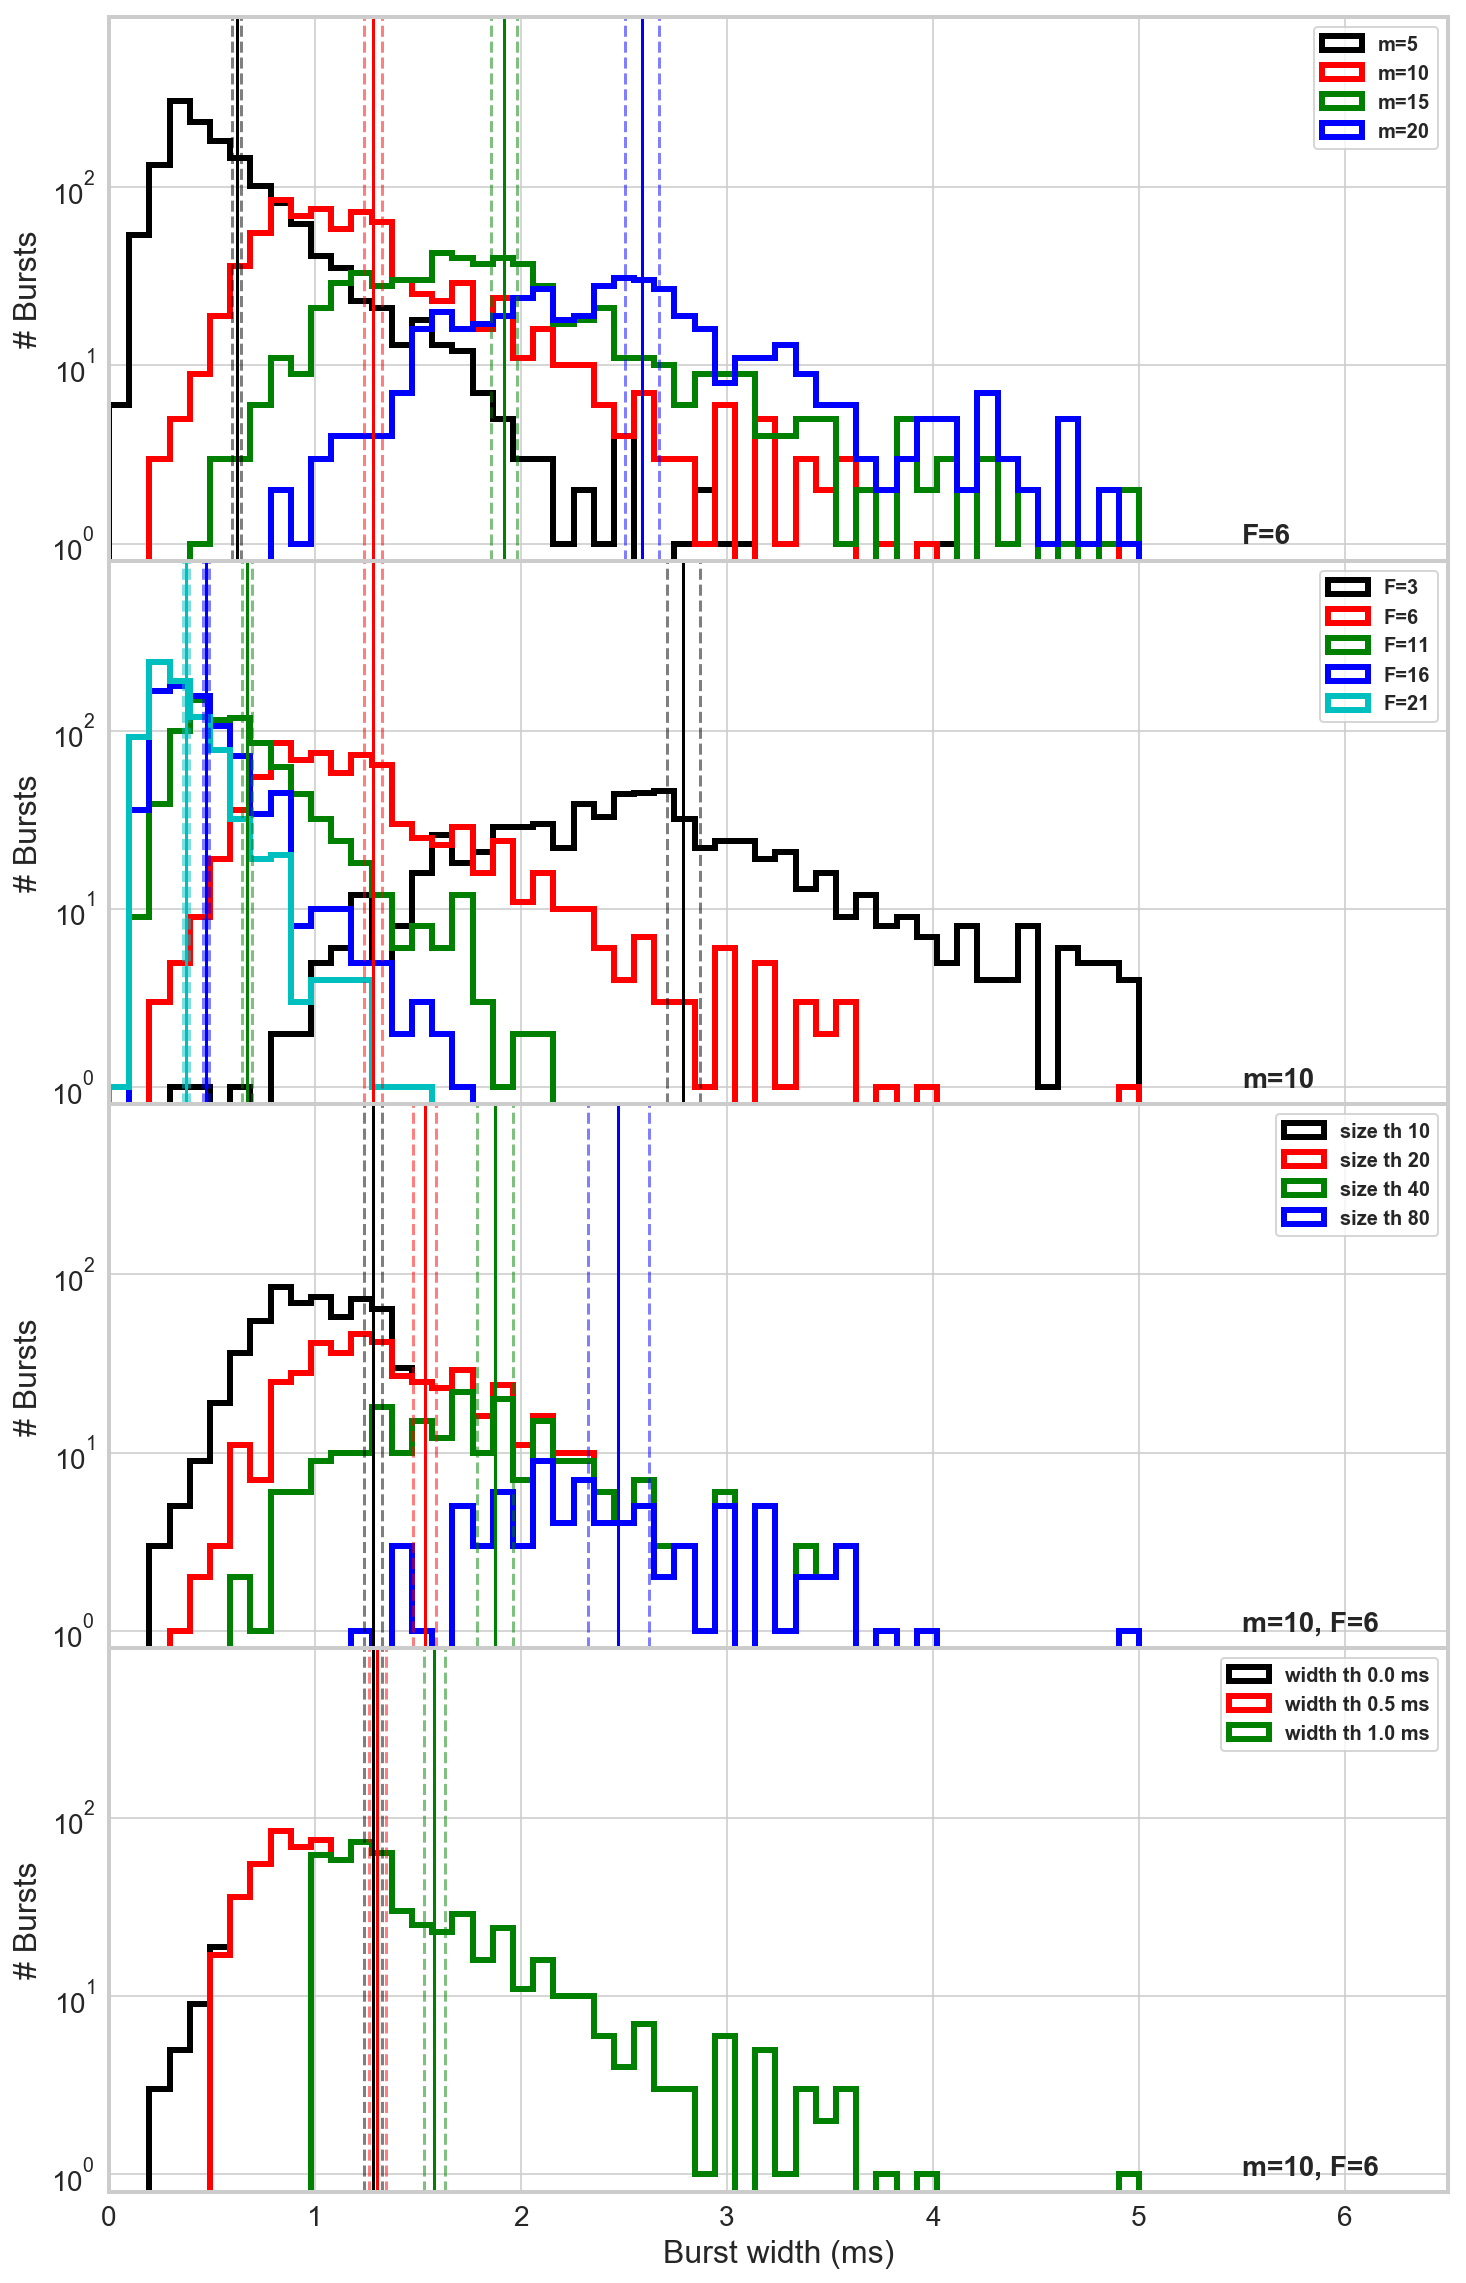

In [493]:
kwargs = dict(levels=[0.1, 0.5, 0.9], cmap='cividis', zorder=1)
legend_properties = {'weight':'bold'}

cols = 1
rows = 4

fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=False, sharey=False, figsize=(3 * rows, 20 * cols), tight_layout=False)

plt.subplots_adjust(wspace=0, hspace=0)

ax[0].hist(bursts_m5F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='m=5', linewidth=3, color='k');
ax[0].axvline(tmp_varying_m[0], color='k', alpha=1)
ax[0].axvline(tmp_varying_m[0] - tmperr_varying_m[0], color='k', alpha=0.5, linestyle='dashed')
ax[0].axvline(tmp_varying_m[0] + tmperr_varying_m[0], color='k', alpha=0.5, linestyle='dashed')
ax[0].hist(bursts_m10F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='m=10', linewidth=3, color='r');
ax[0].axvline(tmp_varying_m[1], color='r', alpha=1)
ax[0].axvline(tmp_varying_m[1] - tmperr_varying_m[1], color='r', alpha=0.5, linestyle='dashed')
ax[0].axvline(tmp_varying_m[1] + tmperr_varying_m[1], color='r', alpha=0.5, linestyle='dashed')
ax[0].hist(bursts_m15F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='m=15', linewidth=3, color='g');
ax[0].axvline(tmp_varying_m[2], color='g', alpha=1)
ax[0].axvline(tmp_varying_m[2] - tmperr_varying_m[2], color='g', alpha=0.5, linestyle='dashed')
ax[0].axvline(tmp_varying_m[2] + tmperr_varying_m[2], color='g', alpha=0.5, linestyle='dashed')
ax[0].hist(bursts_m20F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='m=20', linewidth=3, color='b');
ax[0].axvline(tmp_varying_m[3], color='b', alpha=1)
ax[0].axvline(tmp_varying_m[3] - tmperr_varying_m[3], color='b', alpha=0.5, linestyle='dashed')
ax[0].axvline(tmp_varying_m[3] + tmperr_varying_m[3], color='b', alpha=0.5, linestyle='dashed')
ax[0].set_ylabel('# Bursts', fontsize=16)
#ax[0].set_xlabel('Burst width (ms)', fontsize=16)
ax[0].set_xlim(0, 6.5)
ax[0].set_ylim(8e-1, 9e2);
ax[0].legend(fontsize=12, prop=legend_properties)
ax[0].text(5.5, 1, 'F=6', fontsize=14, fontweight='bold')
ax[0].tick_params(axis='both', which='both', labelsize=14)
ax[0].set_xticklabels([])

ax[1].hist(bursts_m10F3['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='F=3', linewidth=3, color='k');
ax[1].axvline(tmp_varying_F[0], color='k', alpha=1)
ax[1].axvline(tmp_varying_F[0] - tmperr_varying_F[0], color='k', alpha=0.5, linestyle='dashed')
ax[1].axvline(tmp_varying_F[0] + tmperr_varying_F[0], color='k', alpha=0.5, linestyle='dashed')
ax[1].hist(bursts_m10F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='F=6', linewidth=3, color='r');
ax[1].axvline(tmp_varying_F[1], color='r', alpha=1)
ax[1].axvline(tmp_varying_F[1] - tmperr_varying_F[1], color='r', alpha=0.5, linestyle='dashed')
ax[1].axvline(tmp_varying_F[1] + tmperr_varying_F[1], color='r', alpha=0.5, linestyle='dashed')
ax[1].hist(bursts_m10F11['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='F=11', linewidth=3, color='g');
ax[1].axvline(tmp_varying_F[2], color='g', alpha=1)
ax[1].axvline(tmp_varying_F[2] - tmperr_varying_F[2], color='g', alpha=0.5, linestyle='dashed')
ax[1].axvline(tmp_varying_F[2] + tmperr_varying_F[2], color='g', alpha=0.5, linestyle='dashed')
ax[1].hist(bursts_m10F16['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='F=16', linewidth=3, color='b');
ax[1].axvline(tmp_varying_F[3], color='b', alpha=1)
ax[1].axvline(tmp_varying_F[3] - tmperr_varying_F[3], color='b', alpha=0.5, linestyle='dashed')
ax[1].axvline(tmp_varying_F[3] + tmperr_varying_F[3], color='b', alpha=0.5, linestyle='dashed')
ax[1].hist(bursts_m10F21['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='F=21', linewidth=3, color='c');
ax[1].axvline(tmp_varying_F[4], color='c', alpha=1)
ax[1].axvline(tmp_varying_F[4] - tmperr_varying_F[4], color='c', alpha=0.5, linestyle='dashed')
ax[1].axvline(tmp_varying_F[4] + tmperr_varying_F[4], color='c', alpha=0.5, linestyle='dashed')
ax[1].set_ylabel('# Bursts', fontsize=16)
#ax[1].set_xlabel('Burst width (ms)', fontsize=16)
ax[1].set_xlim(0, 6.5)
ax[1].set_ylim(8e-1, 9e2);
ax[1].legend(fontsize=12, prop=legend_properties)
ax[1].text(5.5, 1, 'm=10', fontsize=14, fontweight='bold')
ax[1].tick_params(axis='both', which='both', labelsize=14)
ax[1].set_xticklabels([])

ax[2].hist(bursts_m10F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='size th 10', linewidth=3, color='k');
ax[2].axvline(tmp_varying_sz[0], color='k', alpha=1)
ax[2].axvline(tmp_varying_sz[0] - tmperr_varying_sz[0], color='k', alpha=0.5, linestyle='dashed')
ax[2].axvline(tmp_varying_sz[0] + tmperr_varying_sz[0], color='k', alpha=0.5, linestyle='dashed')
ax[2].hist(bursts_m10F6_sz20['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='size th 20', linewidth=3, color='r');
ax[2].axvline(tmp_varying_sz[1], color='r', alpha=1)
ax[2].axvline(tmp_varying_sz[1] - tmperr_varying_sz[1], color='r', alpha=0.5, linestyle='dashed')
ax[2].axvline(tmp_varying_sz[1] + tmperr_varying_sz[1], color='r', alpha=0.5, linestyle='dashed')
ax[2].hist(bursts_m10F6_sz40['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='size th 40', linewidth=3, color='g');
ax[2].axvline(tmp_varying_sz[2], color='g', alpha=1)
ax[2].axvline(tmp_varying_sz[2] - tmperr_varying_sz[2], color='g', alpha=0.5, linestyle='dashed')
ax[2].axvline(tmp_varying_sz[2] + tmperr_varying_sz[2], color='g', alpha=0.5, linestyle='dashed')
ax[2].hist(bursts_m10F6_sz80['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='size th 80', linewidth=3, color='b');
ax[2].axvline(tmp_varying_sz[3], color='b', alpha=1)
ax[2].axvline(tmp_varying_sz[3] - tmperr_varying_sz[3], color='b', alpha=0.5, linestyle='dashed')
ax[2].axvline(tmp_varying_sz[3] + tmperr_varying_sz[3], color='b', alpha=0.5, linestyle='dashed')
ax[2].set_ylabel('# Bursts', fontsize=16)
#ax[2].set_xlabel('Burst width (ms)', fontsize=16)
ax[2].set_xlim(0, 6.5)
ax[2].set_ylim(8e-1, 9e2);
ax[2].legend(fontsize=12, prop=legend_properties)
ax[2].text(5.5, 1, 'm=10, F=6', fontsize=14, fontweight='bold')
ax[2].tick_params(axis='both', which='both', labelsize=14)
ax[2].set_xticklabels([])


ax[3].hist(bursts_m10F6['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='width th 0.0 ms', linewidth=3, color='k');
ax[3].axvline(tmp_varying_w[0], color='k', alpha=1)
ax[3].axvline(tmp_varying_w[0] - tmperr_varying_w[0], color='k', alpha=0.5, linestyle='dashed')
ax[3].axvline(tmp_varying_w[0] + tmperr_varying_w[0], color='k', alpha=0.5, linestyle='dashed')
ax[3].hist(bursts_m10F6_w0_5['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='width th 0.5 ms', linewidth=3, color='r');
ax[3].axvline(tmp_varying_w[1], color='r', alpha=1)
ax[3].axvline(tmp_varying_w[1] - tmperr_varying_w[1], color='r', alpha=0.5, linestyle='dashed')
ax[3].axvline(tmp_varying_w[1] + tmperr_varying_w[1], color='r', alpha=0.5, linestyle='dashed')
ax[3].hist(bursts_m10F6_w1_0['width_ms'],bins=51, range=(0,5), histtype = 'step', density=False, log=True, label='width th 1.0 ms', linewidth=3, color='g');
ax[3].axvline(tmp_varying_w[2], color='g', alpha=1)
ax[3].axvline(tmp_varying_w[2] - tmperr_varying_w[2], color='g', alpha=0.5, linestyle='dashed')
ax[3].axvline(tmp_varying_w[2] + tmperr_varying_w[2], color='g', alpha=0.5, linestyle='dashed')
ax[3].set_ylabel('# Bursts', fontsize=16)
ax[3].set_xlabel('Burst width (ms)', fontsize=16)
ax[3].set_xlim(0, 6.5)
ax[3].set_ylim(8e-1, 9e2);
ax[3].legend(fontsize=12, prop=legend_properties)
ax[3].text(5.5, 1, 'm=10, F=6', fontsize=14, fontweight='bold')
ax[3].tick_params(axis='both', which='both', labelsize=14)
#ax[3].set_xticklabels([])

plt.rcParams['axes.linewidth'] = 2

#plt.savefig('burstWidthHistograms_m5F6_C31_D90_psfGauss.png', dpi=600, bbox_inches='tight')